# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.options.display.float_format = "{:.2f}".format

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Prepare data

Scrape 100 page với gần 6000 sản phẩm trong ngành điện thoại.
Trong đó chỉ có 2078 sản phẩm bàn được nên EDA 2078 sản phẩm này, drop phần còn lại

In [4]:
overall_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/Raw data/overall_shopee_phone.csv')
overall_data.shape

(5760, 16)

In [5]:
detailed_500 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/Raw data/detailed_data_500.csv')
detailed_1000 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/Raw data/detailed_data_1000.csv')
detailed_1500 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/Raw data/detailed_data_1500.csv')
detailed_2078 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/Raw data/detailed_data_2078.csv')

df_detailed = [detailed_500, detailed_1000, detailed_1500, detailed_2078]

In [6]:
# Union detailed data
detailed_data = pd.concat(df_detailed)
detailed_data.shape

(1697, 30)

Merge 2 table: overall and detailed through url
before that, we drop columns unnamed

In [7]:
overall_data.columns

Index(['Unnamed: 0', 'name', 'price_dis', 'price_nondis', 'freeship', 'rating',
       'rating_count', 'monthly_sold', 'store_location', 'monthly_event',
       'favorite_product', 'shopee_mall', 'discount_tag', 'product_url',
       'image', 'ShopDacBiet'],
      dtype='object')

In [8]:
detailed_data.columns

Index(['Unnamed: 0', 'product_url', 'name_product', 'rating_product',
       'rating_count_product', 'quantity_5_star', 'quantity_4_star',
       'quantity_3_star', 'quantity_2_star', 'quantity_1_star', 'count_cmt',
       'images_video', 'sold_out', 'low_price', 'hight_price', 'price',
       'inventory', 'return_7_days', 'authentic', 'freeship',
       'shopee_guaranteed', 'company', 'shop_name', 'shopee_mall',
       'shop_total_review', 'total_products', 'response_rate', 'time_response',
       'years_ex', 'follower'],
      dtype='object')

In [9]:
detailed_data.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
overall_data.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df = pd.merge(detailed_data, overall_data, how='inner', left_on= 'product_url', right_on='product_url')

In [12]:
df.shape

(1697, 43)

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693,1694,1695,1696
product_url,https://shopee.vn/Mi%E1%BA%BFng-d%C3%A1n-%C4%9...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/Apple-iPhone-11-64GB-i.88201...,https://shopee.vn/-H%C3%A0ng-Ch%C3%ADnh-H%C3%A...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/Tr%C3%A2u-th%E1%BA%A7n-t%C3%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/Nokia-e7-zin-ch%C3%ADnh-h%C3...,https://shopee.vn/Nokia-8600-zin-ch%C3%ADnh-h%...,https://shopee.vn/-CH%C3%8DNH-H%C3%83NG-Tai-Ng...,https://shopee.vn/(C%C3%B3-Pin-S%E1%BA%A1c)-%C...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/Nokia-3310-Zin-Ch%C3%ADnh-H%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/Apple-iPhone-12-Pro-Max-128G...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/m%C3%A1y-c%C5%A9-gi%C3%A1-r%...,https://shopee.vn/Gi%C3%A1-%C4%91%E1%BB%A1-%C4...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,...,https://shopee.vn/%C4%90I%E1%BB%86N-THO%E1%BA%...,https://shopee.vn/V%E1%BB%8E-NOKIA-206-M%C3%80...,https://shopee.vn/nokia-6310i-h%C3%A0ng-x%C3%A...,https://shopee.vn/c%E1%BB%A5m-6s-bybass-v%E1%B...,https://shopee.vn/V%E1%BB%8F-%C4%91i%E1%BB%87n...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/-Qu%E1%BB%91c-t%E1%BA%BF-5SE...,https://shopee.vn/Mi%E1%BA%BFng-che-camera-%C4...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%91i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%91i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%91i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/M%C3%A1y-kitty-n%E1%BA%AFp-g...,https://shopee.vn/-GIA%CC%81-S%C3%94%CC%81C-%C...,https://shopee.vn/C%E1%BB%A5m-l%C6%B0ng-iphone...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/-SALE-GI%C3%81-S%E1%BB%90C-%...,https://shopee.vn/-GIA%CC%81-S%C3%94%CC%81C-%C...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/N%C3%BAt-Home-iPhone-5-5s-6-...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/-GIA%CC%81-S%C3%94%CC%81C-No...,https://shopee.vn/''-R%E1%BA%BA-V%C3%94-%C4%90...,https://shopee.vn/(-%C4%90%E1%BB%99-11-B%C3%B3...,https://shopee.vn/-tr%E1%BB%A3-gi%C3%A1-m%C3%B...,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,https://shopee.vn/H

# Clean data

## Remove unwanted - columns

In [14]:
df.columns

Index(['product_url', 'name_product', 'rating_product', 'rating_count_product',
       'quantity_5_star', 'quantity_4_star', 'quantity_3_star',
       'quantity_2_star', 'quantity_1_star', 'count_cmt', 'images_video',
       'sold_out', 'low_price', 'hight_price', 'price', 'inventory',
       'return_7_days', 'authentic', 'freeship_x', 'shopee_guaranteed',
       'company', 'shop_name', 'shopee_mall_x', 'shop_total_review',
       'total_products', 'response_rate', 'time_response', 'years_ex',
       'follower', 'name', 'price_dis', 'price_nondis', 'freeship_y', 'rating',
       'rating_count', 'monthly_sold', 'store_location', 'monthly_event',
       'favorite_product', 'shopee_mall_y', 'discount_tag', 'image',
       'ShopDacBiet'],
      dtype='object')

In [15]:
df.drop(columns=['name_product', 'price_dis', 'price_nondis', 'freeship_y', 'rating', 'rating_count', 'shopee_mall_y', 'image', 'quantity_5_star', 'quantity_4_star', 'quantity_3_star', 'quantity_2_star', 'quantity_1_star', 'count_cmt', 'images_video'], inplace = True)

In [16]:
df.shape

(1697, 28)

## Work with missing values

In [17]:
df.fillna('unknown', inplace=True)

In [18]:
df.columns

Index(['product_url', 'rating_product', 'rating_count_product', 'sold_out',
       'low_price', 'hight_price', 'price', 'inventory', 'return_7_days',
       'authentic', 'freeship_x', 'shopee_guaranteed', 'company', 'shop_name',
       'shopee_mall_x', 'shop_total_review', 'total_products', 'response_rate',
       'time_response', 'years_ex', 'follower', 'name', 'monthly_sold',
       'store_location', 'monthly_event', 'favorite_product', 'discount_tag',
       'ShopDacBiet'],
      dtype='object')

In [19]:
df_test = df.copy()

Work with numerical columns:
1. inventory            - dtype
2. total_products        - dtype
3. response_rate        - dtype
4. years_ex             - calculate
5. monthly_sold         - calculate
6. discount_tag         - calculate
7. sold_out             - calculate
8. shop_total_review   - calculate

In [20]:
df[df['sold_out'].isna()]

,product_url,rating_product,rating_count_product,sold_out,low_price,hight_price,price,inventory,return_7_days,authentic,freeship_x,shopee_guaranteed,company,shop_name,shopee_mall_x,shop_total_review,total_products,response_rate,time_response,years_ex,follower,name,monthly_sold,store_location,monthly_event,favorite_product,discount_tag,ShopDacBiet


### Inventory

In [21]:
df_test[df_test['inventory'] == 'Số Lượng']

,product_url,rating_product,rating_count_product,sold_out,low_price,hight_price,price,inventory,return_7_days,authentic,freeship_x,shopee_guaranteed,company,shop_name,shopee_mall_x,shop_total_review,total_products,response_rate,time_response,years_ex,follower,name,monthly_sold,store_location,monthly_event,favorite_product,discount_tag,ShopDacBiet
1552,https://shopee.vn/Main-7plus-kh%C3%B4ng-%E1%BB...,unknown,unknown,1,unknown,unknown,199999.00,Số Lượng,unknown,unknown,unknown,3 Ngày Trả Hàng / Hoàn Tiền,MAIN XÁC IPHONE,kindhp93,False,1,8,89%,trong vài giờ,25 tháng trước,30,Main 7plus không ổ cứng cắm máy tính nhận,1/tháng,Tây Ninh,False,unknown,unknown,False


In [22]:
df_test.drop([1552], inplace=True)

In [23]:
def inventory(series):
    if series == 'unknown':
        return 0.0
    else:
        return float(series)

In [24]:
df_test['inventory'] = df_test['inventory'].apply(inventory)

In [25]:
df_test['inventory'] 

0      21699.00
1       1711.00
2          0.00
3      19190.00
4         42.00
         ...   
1692      37.00
1693      23.00
1694      47.00
1695     124.00
1696      43.00
Name: inventory, Length: 1696, dtype: float64

### Total_products

In [26]:
def total_products(series):
    
        # total_products
        i =  series
        if i == 'unknown':
                return 0.0
                
        if ',' in i or 'k' in i:
                i = i.replace(',', '.').strip('k')
                i = float(i)*1000
                return i
        else:
                i = float(i)
                return i

In [27]:
df_test['total_products'] = df_test['total_products'].apply(total_products)

In [28]:
df_test['total_products']

0        14.00
1        28.00
2       129.00
3        29.00
4       367.00
         ...  
1692    702.00
1693     84.00
1694   1100.00
1695    702.00
1696     71.00
Name: total_products, Length: 1696, dtype: float64

### Response_rate

In [29]:
df_test['response_rate'].unique()

array(['97%', '100%', '99%', '17%', '83%', '96%', '95%', '90%', '88%',
       '98%', '86%', '87%', '74%', '63%', '65%', '93%', '84%', '57%',
       '70%', '92%', '76%', '94%', '48%', '75%', '73%', '89%', '12%',
       '60%', '18%', '79%', '47%', '69%', '30%', '71%', '8%', '53%',
       '66%', '7%', '81%', '34%', '55%', '59%', '61%', '24%', '85%',
       '67%', '91%', '50%', '80%', '27%', '51%', '78%', '77%', '33%',
       '64%', '68%', '62%', '72%', '46%', '11%', '22%', '5%', '1%', '23%',
       '82%', '39%', '19%', '28%', '52%', '42%', '36%', '37%', '45%',
       '13%', '54%', '41%', '21%', '32%', '26%', '29%', '2%', '44%',
       '38%', '15%', '25%', '10%', '31%', '43%', '3%', '56%', '49%',
       '35%', '14%', '6%', '20%', '40%'], dtype=object)

In [30]:
def response_rate(series):
    j = series
    if j == 'unknown':
        return 0.0
    else:
        j = float(j.strip('%'))/100
        return j

In [31]:
df_test['response_rate'] = df_test['response_rate'].apply(response_rate)

In [32]:
df_test['response_rate']

0      0.97
1      1.00
2      0.99
3      0.17
4      0.99
       ... 
1692   0.69
1693   0.93
1694   0.57
1695   0.69
1696   0.10
Name: response_rate, Length: 1696, dtype: float64

### Years experience

In [33]:
df_test['years_ex'].unique()

array(['28 tháng trước', '3 năm trước', '18 tháng trước', '6 năm trước',
       '4 tháng trước', '24 tháng trước', '31 tháng trước', '4 năm trước',
       '19 tháng trước', '23 tháng trước', '25 tháng trước',
       '7 tháng trước', '11 tháng trước', '17 tháng trước',
       '5 tháng trước', '20 tháng trước', '2 tháng trước',
       '35 tháng trước', '34 tháng trước', '3 tháng trước',
       '15 tháng trước', '55 ngày trước', '22 tháng trước',
       '30 tháng trước', '5 năm trước', '8 tháng trước', '31 ngày trước',
       '6 tháng trước', '10 tháng trước', '29 tháng trước',
       '12 tháng trước', '44 ngày trước', '33 tháng trước',
       '16 tháng trước', '13 tháng trước', '21 tháng trước',
       '14 tháng trước', '58 ngày trước', '9 tháng trước',
       '32 tháng trước', '36 tháng trước', '26 tháng trước',
       '27 tháng trước', '17 ngày trước', '45 ngày trước',
       '39 ngày trước', '32 ngày trước', '56 ngày trước', '25 ngày trước'],
      dtype=object)

In [34]:
def years_ex(series):

# change year experience to month experince
    y = series
    if y == 'unknown':
        return 0.0
    elif "ngày trước" in y:
        y = round(float(y.strip(" ngày trước"))/30, 1)
        return y
    elif "tháng trước" in y:
        y = float(y.strip(" tháng trước"))
        return y
    else:
        y = float(y.strip(" năm trước"))*12
        return y

In [35]:
df_test['years_ex'] = df_test['years_ex'].apply(years_ex)

In [36]:
df_test['years_ex'].unique()

array([28. , 36. , 18. , 72. ,  4. , 24. , 31. , 48. , 19. , 23. , 25. ,
        7. , 11. , 17. ,  5. , 20. ,  2. , 35. , 34. ,  3. , 15. ,  1.8,
       22. , 30. , 60. ,  8. ,  1. ,  6. , 10. , 29. , 12. ,  1.5, 33. ,
       16. , 13. , 21. , 14. ,  1.9,  9. , 32. , 26. , 27. ,  0.6,  1.3,
        1.1,  0.8])

### Monthly sold

In [37]:
df_test['monthly_sold'].unique()

array(['5,4k/tháng', '1,8k/tháng', '1,1k/tháng', '763/tháng', '715/tháng',
       '677/tháng', '665/tháng', '599/tháng', '564/tháng', '534/tháng',
       '490/tháng', '324/tháng', '321/tháng', '281/tháng', '271/tháng',
       '270/tháng', '204/tháng', '199/tháng', '194/tháng', '186/tháng',
       '174/tháng', '164/tháng', '155/tháng', '153/tháng', '162/tháng',
       '152/tháng', '147/tháng', '140/tháng', '139/tháng', '129/tháng',
       '130/tháng', '124/tháng', '115/tháng', '159/tháng', '104/tháng',
       '103/tháng', '110/tháng', '101/tháng', '100/tháng', '99/tháng',
       '95/tháng', '89/tháng', '84/tháng', '82/tháng', '81/tháng',
       '79/tháng', '367/tháng', '71/tháng', '70/tháng', '67/tháng',
       '68/tháng', '63/tháng', '62/tháng', '60/tháng', '61/tháng',
       '59/tháng', '56/tháng', '1k/tháng', '828/tháng', '54/tháng',
       '53/tháng', '52/tháng', '50/tháng', '51/tháng', '108/tháng',
       '49/tháng', '48/tháng', '46/tháng', '45/tháng', '44/tháng',
       '43/tháng'

In [38]:
def monthly_sold(series):
    # monthly_sold
    s = series
    s = s.strip('/tháng')
    if 'k' in s:
        try:
            s = float(s.replace(',', '.').strip('k'))*1000
            return s
        except:
            s = float(s.trip('k'))*1000
            return s
    else:
        s = float(s)
        return s

In [39]:
df_test['monthly_sold'] = df_test['monthly_sold'].apply(monthly_sold)

In [40]:
df_test['monthly_sold']

0      5400.00
1      1800.00
2      1100.00
3       763.00
4       715.00
         ...  
1692      4.00
1693      1.00
1694      1.00
1695      1.00
1696      1.00
Name: monthly_sold, Length: 1696, dtype: float64

### Discount tag

In [41]:
df_test['discount_tag'].unique()

array(['unknown', '15%\nGIẢM', '36%\nGIẢM', '50%\nGIẢM', '47%\nGIẢM',
       '4%\nGIẢM', '24%\nGIẢM', '7%\nGIẢM', '20%\nGIẢM', '19%\nGIẢM',
       '48%\nGIẢM', '44%\nGIẢM', '43%\nGIẢM', '8%\nGIẢM', '17%\nGIẢM',
       '31%\nGIẢM', '25%\nGIẢM', '18%\nGIẢM', '49%\nGIẢM', '12%\nGIẢM',
       '32%\nGIẢM', '5%\nGIẢM', '13%\nGIẢM', '9%\nGIẢM', '6%\nGIẢM',
       '14%\nGIẢM', '29%\nGIẢM', '11%\nGIẢM', '3%\nGIẢM', '28%\nGIẢM',
       '41%\nGIẢM', '34%\nGIẢM', '33%\nGIẢM', '22%\nGIẢM', '16%\nGIẢM',
       '35%\nGIẢM', '38%\nGIẢM', '1%\nGIẢM', '23%\nGIẢM', '27%\nGIẢM',
       '2%\nGIẢM', '26%\nGIẢM', '45%\nGIẢM', '30%\nGIẢM', '10%\nGIẢM',
       '46%\nGIẢM', '40%\nGIẢM', '37%\nGIẢM', '42%\nGIẢM', '21%\nGIẢM',
       '39%\nGIẢM', '70%\nGIẢM'], dtype=object)

In [42]:
def discount_tag(series):    
    # discount_tag
    dis = series
    if dis != 'unknown':
        dis = float(str(dis).strip("%\nGIẢM"))/100
        return dis
    else:
        return 0.0

In [43]:
df_test['discount_tag'] = df_test['discount_tag'].apply(discount_tag)


In [44]:
df_test['discount_tag']

0      0.00
1      0.15
2      0.36
3      0.00
4      0.00
       ... 
1692   0.00
1693   0.00
1694   0.00
1695   0.00
1696   0.50
Name: discount_tag, Length: 1696, dtype: float64

### Sold out

In [45]:
df_test['sold_out'].unique()

array(['16,4k', '4,9k', '3,5k', '767', '2,6k', '5k', '9,2k', '1,1k',
       '4,2k', '965', '781', '10,5k', '701', '3,7k', '5,8k', '3,1k',
       '270', '212', '1,6k', '667', '650', '603', '392', '256', '1,2k',
       '335', '176', '2,5k', '227', '566', '1,7k', '167', '2,8k', '169',
       '495', '418', '217', '164', '778', '175', '100', '141', '2,2k',
       '791', '328', '2,4k', '239', '368', '1,8k', '647', '907', '126',
       '595', '745', '572', '60', '61', '133', '236', '115', '799', '293',
       '137', '53', '118', '259', '209', '211', '63', '830', '720', '441',
       '315', '128', '796', '65', '210', '99', '251', '260', '83', '114',
       '588', '76', '733', '411', '344', '159', '45', '417', '350', '434',
       '503', '323', '7,2k', '452', '59', '44', '57', '34', '284', '186',
       '69', '41', '33', '592', '204', '337', '94', '73', '292', '397',
       '1,5k', '30', '356', '29', '484', '506', '48', '709', '149', '191',
       '276', '111', '36', '26', '333', '113', '123', 

In [46]:
def sold_out(serise):
    # sold_out
    so = serise
    if so == 'unknown':
        return 0.0

    elif 'k' in so:
            try:
                so = float(so.replace(',', '').strip('k'))*1000
                return so
            except:
                so = float(so.strip('k'))*1000
                return so

    else:
            so = float(so)
            return so

In [47]:
df_test['sold_out'] = df_test['sold_out'].apply(sold_out)

In [48]:
df_test['sold_out']

0      164000.00
1       49000.00
2       35000.00
3         767.00
4       26000.00
          ...   
1692       21.00
1693        9.00
1694        3.00
1695       15.00
1696        7.00
Name: sold_out, Length: 1696, dtype: float64

### Total_reivew

In [49]:
df_test['shop_total_review'].unique()

array(['1,5k', '6,7k', '18,5k', '25', '39,7k', '3,6k', '22,5k', '547',
       '19,8k', '3,5k', '29k', '304', '3,8k', '7,2k', '1,3k', '22k',
       '2,9k', '1,1k', '2,5k', '616', '18,6k', '68', '6,9k', '36k', '871',
       '2,7k', '5,9k', '866', '37,6k', '10,1k', '1,4k', '3,2k', '5,2k',
       '718', '194', '2k', '724', '29', '250', '527', '22', '435', '220',
       '1,2k', '1,7k', '316', '281', '5,6k', '290', '265', '112', '75',
       '3,7k', '45', '3', '13', '3,1k', '4,8k', '164', '661', '6,8k',
       '459', '207,1k', '351', '28,5k', '593', '11', '231', '27,6k',
       '5,5k', '6,4k', '239', '576', '100', '266', '340', '457', '32,9k',
       '649', '897', '199', '122', '12', '706', '65', '156', '4,5k',
       '1,8k', '205', '1,6k', '90', '157', '3,3k', '19', '1,9k', '854',
       '14,3k', '197', '908', '4,7k', '2,8k', '131', '662', '274', '30',
       '9k', '90,6k', '7,3k', '471', '560', '539', '898', '568', '531',
       '407', '856', '2,3k', '402', '295', '405', '86', '74', '298',

In [50]:
def total_review(series):

    # shop_total_review
    views = series
    if views == 'unknown':
        return 0.0
    elif 'k' in views:
            try:
                views = float(views.replace(',', '').strip('k'))*1000
                return views
            except:
                views = float(views.strip('k'))*1000
                return views

    else:
            views = float(views)
            return views

In [51]:
df_test['shop_total_review'] = df_test['shop_total_review'].apply(total_review)

In [52]:
df_test['shop_total_review']

0       15000.00
1       67000.00
2      185000.00
3          25.00
4      397000.00
          ...   
1692      315.00
1693      724.00
1694       42.00
1695      315.00
1696        3.00
Name: shop_total_review, Length: 1696, dtype: float64

### Shopee mall, monthly event, special shop

Encoder True = 1 and false = 2

In [53]:
df_test['shopee_mall_x'].unique()

array([False,  True])

In [54]:
def auto_encode(series):
    if series  == True:
            series = 1
            return series
    elif series == False:
            series = 0
            return series
    else:  
            return 0.0



In [55]:
df_test['shopee_mall_x'] = df_test['shopee_mall_x'].apply(auto_encode)
df_test['monthly_event'] = df_test['monthly_event'].apply(auto_encode)
df_test['ShopDacBiet'] = df_test['ShopDacBiet'].apply(auto_encode)

In [56]:
df_test['shopee_mall_x']

0       0
1       1
2       1
3       0
4       1
       ..
1692    0
1693    0
1694    0
1695    0
1696    0
Name: shopee_mall_x, Length: 1696, dtype: int64

In [57]:
df_test['monthly_event']

0       0
1       1
2       1
3       0
4       1
       ..
1692    1
1693    1
1694    1
1695    1
1696    1
Name: monthly_event, Length: 1696, dtype: int64

In [58]:
df_test['ShopDacBiet']

0       0
1       0
2       0
3       0
4       0
       ..
1692    1
1693    1
1694    0
1695    1
1696    0
Name: ShopDacBiet, Length: 1696, dtype: int64

### Price

Fill low price, high price  unknown equal 0
Calculate price NaN = mean(low+high)/2

In [59]:
def low_high_price(series):
    if series == 'unknown':
        return 0.0
    else:
        return float(series)

In [60]:
df_test['low_price'] = df_test['low_price'].apply(low_high_price)
df_test['high_price'] = df_test['hight_price'].apply(low_high_price)

In [61]:
def price_calculate(row):
    if row['price'] == 'unknown':
        row['price'] = (float(row['low_price']) + float(row['high_price']))/2
        return row['price']
    else:
        return float(row['price'])


In [62]:
df_test['price'] = df_test.apply(price_calculate, axis=1)


In [63]:
df_test['price']

0          4050.00
1       3990000.00
2      17990000.00
3        239000.00
4       3490000.00
           ...    
1692   29990000.00
1693    3990000.00
1694      19000.00
1695    9600000.00
1696      35000.00
Name: price, Length: 1696, dtype: float64

### Final price work with discount tag

In [64]:
df_test['discount_tag'].unique()

array([0.  , 0.15, 0.36, 0.5 , 0.47, 0.04, 0.24, 0.07, 0.2 , 0.19, 0.48,
       0.44, 0.43, 0.08, 0.17, 0.31, 0.25, 0.18, 0.49, 0.12, 0.32, 0.05,
       0.13, 0.09, 0.06, 0.14, 0.29, 0.11, 0.03, 0.28, 0.41, 0.34, 0.33,
       0.22, 0.16, 0.35, 0.38, 0.01, 0.23, 0.27, 0.02, 0.26, 0.45, 0.3 ,
       0.1 , 0.46, 0.4 , 0.37, 0.42, 0.21, 0.39, 0.7 ])

In [65]:
def final_price(row):
    if row['discount_tag'] != 0.00:
        row['price'] = row['price'] * (1 - float(row['discount_tag']))
        return row['price']
    else:
        return row['price']

In [66]:
df_test['price'] = df_test.apply(final_price, axis=1)


In [67]:
df_test['price']

0          4050.00
1       3391500.00
2      11513600.00
3        239000.00
4       3490000.00
           ...    
1692   29990000.00
1693    3990000.00
1694      19000.00
1695    9600000.00
1696      17500.00
Name: price, Length: 1696, dtype: float64

### Favorite product

Change favorite_product:
Yêu thích - 1
NaN - 0

In [68]:
df_test['favorite_product'].unique()

array(['Yêu thích', 'unknown'], dtype=object)

In [69]:
def favorite_product(series):
    if series != 'unknown':
        series = 1
        return series
    else:
        series = 0
        return series

In [70]:
df_test['favorite_product'] = df_test['favorite_product'].apply(favorite_product)

In [71]:
df_test['favorite_product'].unique()

array([1, 0])

### time_response:

Change time_response:
+ unknown -         -1
+ trong vài giờ -    0
+ trong vài phút -   1

In [72]:
df_test['time_response'].unique()

array(['trong vài giờ', 'trong vài phút'], dtype=object)

In [73]:
def time_response(series):
    if series == 'unknown':
        return -1
    elif series == 'trong vài giờ':
        return 0
    elif series == 'trong vài phút':
        return 1

In [74]:
df_test['time_response'] = df_test['time_response'].apply(time_response)

In [75]:
df_test['time_response'].apply(time_response)

0       None
1       None
2       None
3       None
4       None
        ... 
1692    None
1693    None
1694    None
1695    None
1696    None
Name: time_response, Length: 1696, dtype: object

### follower

In [76]:
df_test['follower'].unique()

array(['3,3k', '170,5k', '311,3k', '2,6k', '342,2k', '43k', '141,1k',
       '125,6k', '4,5k', '30,6k', '194', '2,8k', '246,6k', '5,1k',
       '26,4k', '91,8k', '4,6k', '3,7k', '481', '17,6k', '621', '66',
       '11,3k', '79,7k', '1,8k', '20,8k', '60,1k', '44,5k', '1,2k',
       '44,6k', '22,1k', '63,1k', '10k', '3,1k', '118', '4,8k', '1,6k',
       '5,6k', '1,3k', '192', '2,9k', '34', '474', '9,4k', '7,2k',
       '60,9k', '15,4k', '399,4k', '3,5k', '2,7k', '12,2k', '4,2k', '52',
       '246,7k', '50k', '3,6k', '24,5k', '482', '14k', '44', '21', '3,8k',
       '15,1k', '22k', '13,9k', '18', '278', '6,1k', '4,7k', '24,2k',
       '1,1k', '9,7k', '67k', '8,9k', '20', '15', '25,2k', '9,6k', '5,2k',
       '50,1k', '5k', '10,9k', '4,1k', '20,3k', '380', '577', '2,2k',
       '25', '322', '769', '342k', '111', '2,3k', '12,4k', '2k', '73',
       '177', '414', '2,5k', '11,4k', '15,5k', '673', '12,7k', '311,4k',
       '895', '483', '415', '435', '11,9k', '24,1k', '8,5k', '11,1k',
       '

In [77]:
def follower(series):
    if series == 'unknown':
        return 0
    elif 'k' in series:
        series = float(series.replace(',', '.').strip('k'))*1000
        return series
    else:
        series = float(series)
        return series

In [78]:
df_test['follower'] = df_test['follower'].apply(follower)

### shopee_guaranteed

In [79]:
df_test['shopee_guaranteed'].unique()

array(['3 Ngày Trả Hàng / Hoàn Tiền', 'unknown'], dtype=object)

In [80]:
def shopee_guaranteed(series):
    if series == 'unknown':
        return 0
    else:
        return 1


In [81]:
df_test['shopee_guaranteed'] = df_test['shopee_guaranteed'].apply(shopee_guaranteed)

### Clear name and define where is phone

In [82]:
def lower_name(series):
    series = series.lower()
    return series

In [83]:
df_test_2 = df_test.copy()

In [84]:
df_test_2['name'] = df_test_2['name'].apply(lower_name)

In [85]:
name_remove_1 = ['miếng', 'tài', 'tai', 'jack', 
                'vỏ', 'ốp', 'khăn', 'đồng', 'main', 
                'phím', 'đỡ', 'nút', 'mic', 'nắp',
                'loa', 'móc', 'quả',
                'quạt']

In [86]:
df_test_2[df_test_2['name'].str.contains('ốp', regex=True)]['name']

14      trâu thần tài - mèo thần tài mạ vàng 24k để ví...
51      mèo thần tài - trâu thần tài mạ vàng 24k để ví...
127     ốp iphone mèo thần tài - trâu vàng iphone 6 đế...
140     lá vàng mèo, trâu thần tài để trong ốp điện th...
188     điện thoại oppo a7x (oppo f9 ) ram 4/128g hàng...
190     điện thoại oppo a1k ram 3gb-32 gb tặng kèm ốp ...
196     💥 free ship💥điện thoại vivo y53 ram 2gb, rom 1...
279     lá vàng mèo thần tài, trâu thần tài mạ 18k rướ...
353     điện thoại google pixel 2 - snap 835 , tặng ốp...
368                  trâu vàng, mèo vàng để ốp điện thoại
378         điện thoại mini kiểu dáng s8 tặng kèm ốp lưng
386     miếng dán mèo thần tài và trâu vàng hút tài lộ...
462     freeship đơn 99k_ốp silicon xiaomi redmi note ...
486     điện thoại oneplus 8t - ram 8/128gb fullbox li...
556     điện thoại xiaomi redmi k40 pro - ram 6-128gb ...
610     giá cực hót điện thoại xiaomi redmi 4x 2 sim p...
636     ốp lưng nokia 8.1(nokia x7),nokia 5.1 plus(nok...
702     điện t

In [87]:
import numpy as np
for i in name_remove_1:
    a = df_test_2['name'].str.contains(i, regex=True)
    df_test_2['name'] = np.where(a, 'unknown', df_test_2['name'])
    print(df_test_2['name'])
    


0                                                 unknown
1       điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...
2                                    apple iphone 11 64gb
3       [hàng chính hãng 100%] nokia 1280, điện thoại ...
4       điện thoại samsung galaxy m12 (3gb/32gb) - hãn...
                              ...                        
1692    điện thoại samsung galaxy note 20 ultra [chính...
1693    lg v50 thinq 5g (6gb|128gb) ,hàn quốc,snap 855...
1694                                       mic nokia 6300
1695    điện thoại xiaomi mi 11 lite 5g ram 8g/128g - ...
1696    tai nghe iphone, tai phone chính hãng cho điện...
Name: name, Length: 1696, dtype: object
0                                                 unknown
1       điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...
2                                    apple iphone 11 64gb
3       [hàng chính hãng 100%] nokia 1280, điện thoại ...
4       điện thoại samsung galaxy m12 (3gb/32gb) - hãn...
                              ..

### Check and drop columns

In [88]:
df_test_3 = df_test_2.copy()

In [89]:
df_test_3.columns

Index(['product_url', 'rating_product', 'rating_count_product', 'sold_out',
       'low_price', 'hight_price', 'price', 'inventory', 'return_7_days',
       'authentic', 'freeship_x', 'shopee_guaranteed', 'company', 'shop_name',
       'shopee_mall_x', 'shop_total_review', 'total_products', 'response_rate',
       'time_response', 'years_ex', 'follower', 'name', 'monthly_sold',
       'store_location', 'monthly_event', 'favorite_product', 'discount_tag',
       'ShopDacBiet', 'high_price'],
      dtype='object')

In [90]:
df_test_3.drop(columns=['low_price', 'hight_price', 'return_7_days', 'authentic', 'freeship_x', 'high_price', ], inplace=True)

Reset index, columns

In [91]:
df_test_3.columns

Index(['product_url', 'rating_product', 'rating_count_product', 'sold_out',
       'price', 'inventory', 'shopee_guaranteed', 'company', 'shop_name',
       'shopee_mall_x', 'shop_total_review', 'total_products', 'response_rate',
       'time_response', 'years_ex', 'follower', 'name', 'monthly_sold',
       'store_location', 'monthly_event', 'favorite_product', 'discount_tag',
       'ShopDacBiet'],
      dtype='object')

In [92]:
columns_order = ['name', 'price', 'sold_out', 'monthly_sold', 'monthly_revenue', 'total_revenue', 'rating_product',         # product
                'rating_count_product', 'inventory', 'monthly_event', 'favorite_product', 'discount_tag',                   # product
                'company', 'shop_name', 'shopee_mall_x', 'shopee_guaranteed', 'shop_total_review', 'total_products',        # shop
                 'response_rate', 'time_response', 'years_ex', 'follower', 'store_location', 'ShopDacBiet', 'product_url']  # shop

In [93]:
df_test_3 = df_test_3.reindex(columns=columns_order)

### rating_product and rating_count_product

In [94]:
df_test_3['rating_product'].unique

<bound method Series.unique of 0          4.83
1          4.95
2          4.83
3          4.83
4          4.92
         ...   
1692    unknown
1693       4.33
1694       5.00
1695    unknown
1696       2.00
Name: rating_product, Length: 1696, dtype: object>

In [95]:
df_test_3['rating_count_product'].unique

<bound method Series.unique of 0        673.00
1        978.00
2       1184.00
3          6.00
4        763.00
         ...   
1692    unknown
1693       3.00
1694       2.00
1695    unknown
1696       1.00
Name: rating_count_product, Length: 1696, dtype: object>

In [96]:
def rating(series):
    if series == 'unknown':
        return 0.0
    else:
        return float(series)

In [97]:
df_test_3['rating_product'] = df_test_3['rating_product'].apply(rating)
df_test_3['rating_count_product'] = df_test_3['rating_count_product'].apply(rating)

## Check duplication

In [98]:
df_test_3.duplicated().sum()

0

In [99]:
# Remove name unknown
df_test_3 = df_test_3.drop(df_test_3[df_test_3['name'] == 'unknown'].index)

In [100]:
# Remove shop and company unknown
df_test_3['shop_name'].value_counts()

smartphone_baochau         91
ljnh1993                   23
thelinhstore               23
thuythuy889                22
longhung_mobile            21
                           ..
shop.uy.tin                 1
vienthong_tinhoc            1
linhkiendienthoaididong     1
thuyduyen.watch             1
tunghhk6                    1
Name: shop_name, Length: 503, dtype: int64

In [101]:
df_test_3['company'].value_counts()

smartphone_baochau       91
Thế Linh Store           23
ATU MOBILE               23
hà bắc Store             22
Long Hưng Mobile Mall    21
                         ..
LinhkienPDT               1
qdrbke8yz7                1
express.vina.vn           1
thanhtt109                1
quanlammobile123          1
Name: company, Length: 503, dtype: int64

In [102]:
df_test_3 = df_test_3.drop(df_test_3[df_test_3['company'] == 'unknown'].index)

In [103]:
# store location
df_test_3.shape

(1342, 25)

## Check data type

In [104]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 1 to 1695
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1342 non-null   object 
 1   price                 1342 non-null   float64
 2   sold_out              1342 non-null   float64
 3   monthly_sold          1342 non-null   float64
 4   monthly_revenue       0 non-null      float64
 5   total_revenue         0 non-null      float64
 6   rating_product        1342 non-null   float64
 7   rating_count_product  1342 non-null   float64
 8   inventory             1342 non-null   float64
 9   monthly_event         1342 non-null   int64  
 10  favorite_product      1342 non-null   int64  
 11  discount_tag          1342 non-null   float64
 12  company               1342 non-null   object 
 13  shop_name             1342 non-null   object 
 14  shopee_mall_x         1342 non-null   int64  
 15  shopee_guaranteed    

In [105]:
df_test_3.head()

,name,price,sold_out,monthly_sold,monthly_revenue,total_revenue,rating_product,rating_count_product,inventory,monthly_event,favorite_product,discount_tag,company,shop_name,shopee_mall_x,shopee_guaranteed,shop_total_review,total_products,response_rate,time_response,years_ex,follower,store_location,ShopDacBiet,product_url
1,điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...,3391500.00,49000.00,1800.00,nan,nan,4.95,978.00,1711.00,1,0,0.15,VIVO OFFICIAL STORE,vivo_official_store_vn,1,0,67000.00,28.00,1.00,0,36.00,170500.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...
2,apple iphone 11 64gb,11513600.00,35000.00,1100.00,nan,nan,4.83,1184.00,0.00,1,0,0.36,Apple Flagship Store,apple_flagship_store,1,0,185000.00,129.00,0.99,0,36.00,311300.00,TP. Hồ Chí Minh,0,https://shopee.vn/Apple-iPhone-11-64GB-i.88201...
3,"[hàng chính hãng 100%] nokia 1280, điện thoại ...",239000.00,767.00,763.00,nan,nan,4.83,6.00,19190.00,0,0,0.00,dienthoaicodocla,nokiae72zinchinhhang,0,1,25.00,29.00,0.17,0,18.00,2600.00,Hưng Yên,0,https://shopee.vn/-H%C3%A0ng-Ch%C3%ADnh-H%C3%A...
4,điện thoại samsung galaxy m12 (3gb/32gb) - hãn...,3490000.00,26000.00,715.00,nan,nan,4.92,763.00,42.00,1,0,0.00,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,0,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...
5,điện thoại mini - l8star bm10 - ( nokia 3310 )...,52500.00,5000.00,677.00,nan,nan,4.81,700.00,47327.00,1,1,0.50,Tomeno Store Công nghệ 4.0,tomeno.store,0,1,36000.00,270.00,0.83,0,36.00,2600.00,Nam Định,1,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...


## Handel mislabeled and corrupted data

In [106]:
df_test_3.columns

Index(['name', 'price', 'sold_out', 'monthly_sold', 'monthly_revenue',
       'total_revenue', 'rating_product', 'rating_count_product', 'inventory',
       'monthly_event', 'favorite_product', 'discount_tag', 'company',
       'shop_name', 'shopee_mall_x', 'shopee_guaranteed', 'shop_total_review',
       'total_products', 'response_rate', 'time_response', 'years_ex',
       'follower', 'store_location', 'ShopDacBiet', 'product_url'],
      dtype='object')

In [107]:
df_test_3.describe()

,price,sold_out,monthly_sold,monthly_revenue,total_revenue,rating_product,rating_count_product,inventory,monthly_event,favorite_product,discount_tag,shopee_mall_x,shopee_guaranteed,shop_total_review,total_products,response_rate,time_response,years_ex,follower,ShopDacBiet
count,1342.00,1342.00,1342.00,0.00,0.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00,1342.00
mean,2221302.42,2192.82,17.17,nan,nan,4.16,45.17,9681.61,0.71,0.39,0.09,0.09,0.91,41877.25,317.83,0.79,0.07,31.31,20504.99,0.43
std,3742618.28,9364.58,86.27,nan,nan,1.64,203.86,88667.19,0.45,0.49,0.15,0.28,0.28,112580.43,494.89,0.22,0.25,17.60,56250.97,0.49
min,1000.00,0.00,1.00,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.02,0.00,0.60,0.00,0.00
25%,250000.00,4.00,1.00,nan,nan,4.53,1.00,8.00,0.00,0.00,0.00,0.00,1.00,177.00,40.00,0.71,0.00,18.00,482.25,0.00
50%,775255.00,22.00,2.00,nan,nan,4.90,6.00,62.50,1.00,0.00,0.00,0.00,1.00,726.00,119.00,0.86,0.00,33.00,4200.00,0.00
75%,2971765.00,120.00,8.00,nan,nan,5.00,24.00,448.00,1.00,1.00,0.15,0.00,1.00,36000.00,409.00,0.94,0.00,48.00,12700.00,1.00
max,44990000.00,105000.00,1800.00,nan,nan,5.00,4863.00,2006989.00,1.00,1.00,0.50,1.00,1.00,2071000.00,5000.00,1.00,1.00,72.00,399400.00,1.00


# Features engineering

### Total revenue, monthly revenue

In [108]:
df_test_3['monthly_revenue'] = df_test_3['price'] * df_test_3['monthly_sold']
df_test_3['total_revenue'] = df_test_3['price'] * df_test_3['sold_out']

## Rating rate

In [109]:
df_test_3['rating_rate'] = df_test_3['rating_count_product']/df_test_3['sold_out']

## Segmentation

In [110]:
def segmentation(series):
    if series < 2000000:
        return 'Ultra_Low_end'

    elif 2000000 <= series < 4000000: 
        return 'Low_end'

    elif 4000000 <= series < 7000000: 
        return 'Mid_end'

    elif 7000000 <= series < 13000000: 
        return 'Mid_to_High_end'

    elif 13000000 <= series: 
        return 'High_end'

In [111]:
df_test_3['segmentation'] = df_test_3['price'].apply(segmentation)

- According to International data corporation split smartphone to 7 segments:
https://www.idc.com/getdoc.jsp?containerId=prUS46865120
-  The biggest retail smartphone in VN is thegioididong split 6 segments:
https://www.thegioididong.com/dtdd

- Combine 2 paper and overview data set, I decide to split data set 6 segments because segment 6th and 7th very little in data set and get both of them is one

# Final clean data

In [112]:
df_test_3.head()

,name,price,sold_out,monthly_sold,monthly_revenue,total_revenue,rating_product,rating_count_product,inventory,monthly_event,favorite_product,discount_tag,company,shop_name,shopee_mall_x,shopee_guaranteed,shop_total_review,total_products,response_rate,time_response,years_ex,follower,store_location,ShopDacBiet,product_url,rating_rate,segmentation
1,điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...,3391500.00,49000.00,1800.00,6104700000.00,166183500000.00,4.95,978.00,1711.00,1,0,0.15,VIVO OFFICIAL STORE,vivo_official_store_vn,1,0,67000.00,28.00,1.00,0,36.00,170500.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.02,Low_end
2,apple iphone 11 64gb,11513600.00,35000.00,1100.00,12664960000.00,402976000000.00,4.83,1184.00,0.00,1,0,0.36,Apple Flagship Store,apple_flagship_store,1,0,185000.00,129.00,0.99,0,36.00,311300.00,TP. Hồ Chí Minh,0,https://shopee.vn/Apple-iPhone-11-64GB-i.88201...,0.03,Mid_to_High_end
3,"[hàng chính hãng 100%] nokia 1280, điện thoại ...",239000.00,767.00,763.00,182357000.00,183313000.00,4.83,6.00,19190.00,0,0,0.00,dienthoaicodocla,nokiae72zinchinhhang,0,1,25.00,29.00,0.17,0,18.00,2600.00,Hưng Yên,0,https://shopee.vn/-H%C3%A0ng-Ch%C3%ADnh-H%C3%A...,0.01,Ultra_Low_end
4,điện thoại samsung galaxy m12 (3gb/32gb) - hãn...,3490000.00,26000.00,715.00,2495350000.00,90740000000.00,4.92,763.00,42.00,1,0,0.00,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,0,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.03,Low_end
5,điện thoại mini - l8star bm10 - ( nokia 3310 )...,52500.00,5000.00,677.00,35542500.00,262500000.00,4.81,700.00,47327.00,1,1,0.50,Tomeno Store Công nghệ 4.0,tomeno.store,0,1,36000.00,270.00,0.83,0,36.00,2600.00,Nam Định,1,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.14,Ultra_Low_end


In [113]:
df_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 1 to 1695
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1342 non-null   object 
 1   price                 1342 non-null   float64
 2   sold_out              1342 non-null   float64
 3   monthly_sold          1342 non-null   float64
 4   monthly_revenue       1342 non-null   float64
 5   total_revenue         1342 non-null   float64
 6   rating_product        1342 non-null   float64
 7   rating_count_product  1342 non-null   float64
 8   inventory             1342 non-null   float64
 9   monthly_event         1342 non-null   int64  
 10  favorite_product      1342 non-null   int64  
 11  discount_tag          1342 non-null   float64
 12  company               1342 non-null   object 
 13  shop_name             1342 non-null   object 
 14  shopee_mall_x         1342 non-null   int64  
 15  shopee_guaranteed    

In [114]:
df_test_3 = df_test_3.rename(columns={'sold_out'              : 'total_sales_volume',
                                      'monthly_sold'          : 'month_sales_volume',
                                      'monthly_revenue'       : 'month_revenue',
                                      'rating_count_product'  : 'total_rating_product',
                                      'discount_tag'          : 'discount', 
                                      'shopee_mall_x'         : 'shopee_mall',
                                      'shopee_guaranteed'     : 'guaranteed_shopee',
                                      'years_ex'              : 'experience(unit: month)',
                                      'ShopDacBiet'           : 'special_shop',
                                      })

In [115]:
df_test_3.drop(columns='guaranteed_shopee', inplace=True)

In [116]:
df = df_test_3

In [117]:
df_test_3['segmentation'].unique()

array(['Low_end', 'Mid_to_High_end', 'Ultra_Low_end', 'Mid_end',
       'High_end'], dtype=object)

In [118]:
df.columns

Index(['name', 'price', 'total_sales_volume', 'month_sales_volume',
       'month_revenue', 'total_revenue', 'rating_product',
       'total_rating_product', 'inventory', 'monthly_event',
       'favorite_product', 'discount', 'company', 'shop_name', 'shopee_mall',
       'shop_total_review', 'total_products', 'response_rate', 'time_response',
       'experience(unit: month)', 'follower', 'store_location', 'special_shop',
       'product_url', 'rating_rate', 'segmentation'],
      dtype='object')

In [119]:
df['segmentation'].unique()

array(['Low_end', 'Mid_to_High_end', 'Ultra_Low_end', 'Mid_end',
       'High_end'], dtype=object)

In [120]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/df_Shopee_EDA_5_seg.csv')

In [121]:
df.shape

(1342, 26)

# Load data

In [133]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/df_Shopee_EDA_5_seg.csv')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342 entries, 0 to 1341
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1342 non-null   int64  
 1   name                     1342 non-null   object 
 2   price                    1342 non-null   float64
 3   total_sales_volume       1342 non-null   float64
 4   month_sales_volume       1342 non-null   float64
 5   month_revenue            1342 non-null   float64
 6   total_revenue            1342 non-null   float64
 7   rating_product           1342 non-null   float64
 8   total_rating_product     1342 non-null   float64
 9   inventory                1342 non-null   float64
 10  monthly_event            1342 non-null   int64  
 11  favorite_product         1342 non-null   int64  
 12  discount                 1342 non-null   float64
 13  company                  1342 non-null   object 
 14  shop_name               

# Final EDA

## Filter segmentation


In [135]:
df['segmentation'].value_counts()

Ultra_Low_end      884
Low_end            247
Mid_end            134
Mid_to_High_end     54
High_end            23
Name: segmentation, dtype: int64

In [148]:
ultra_low_end = df[df['segmentation'] == 'Ultra_Low_end']
ultra_low_end.head()

,Unnamed: 0,name,price,total_sales_volume,month_sales_volume,month_revenue,total_revenue,rating_product,total_rating_product,inventory,monthly_event,favorite_product,discount,company,shop_name,shopee_mall,shop_total_review,total_products,response_rate,time_response,experience(unit: month),follower,store_location,special_shop,product_url,rating_rate,segmentation
2,3,"[hàng chính hãng 100%] nokia 1280, điện thoại ...",239000.00,767.00,763.00,182357000.00,183313000.00,4.83,6.00,19190.00,0,0,0.00,dienthoaicodocla,nokiae72zinchinhhang,0,25.00,29.00,0.17,0,18.00,2600.00,Hưng Yên,0,https://shopee.vn/-H%C3%A0ng-Ch%C3%ADnh-H%C3%A...,0.01,Ultra_Low_end
4,5,điện thoại mini - l8star bm10 - ( nokia 3310 )...,52500.00,5000.00,677.00,35542500.00,262500000.00,4.81,700.00,47327.00,1,1,0.50,Tomeno Store Công nghệ 4.0,tomeno.store,0,36000.00,270.00,0.83,0,36.00,2600.00,Nam Định,1,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.14,Ultra_Low_end
5,6,"điện thoại nokia 101,nokia 100, nokia 105 zin ...",70755.00,92000.00,665.00,47052075.00,6509460000.00,4.65,3078.00,68.00,1,1,0.47,hà bắc Store,thuythuy889,0,225000.00,250.00,0.96,1,72.00,43000.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.03,Ultra_Low_end
7,8,điện thoại nghe gọi nokia 105 zin chính hãng b...,76380.00,42000.00,564.00,43078320.00,3207960000.00,4.64,1399.00,1046.00,1,1,0.24,hà bắc Store,thuythuy889,0,225000.00,250.00,0.96,1,72.00,43000.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.03,Ultra_Low_end
13,15,"điện thoại nokia 101, nokia 105 - máy 2 sim 2 ...",128640.00,31000.00,281.00,36147840.00,3987840000.00,4.59,866.00,109.00,1,1,0.04,hà bắc Store,thuythuy889,0,225000.00,250.00,0.96,1,72.00,43000.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.03,Ultra_Low_end


In [137]:
low_end = df[df['segmentation'] == 'Low_end']
low_end.head()

,Unnamed: 0,name,price,total_sales_volume,month_sales_volume,month_revenue,total_revenue,rating_product,total_rating_product,inventory,monthly_event,favorite_product,discount,company,shop_name,shopee_mall,shop_total_review,total_products,response_rate,time_response,experience(unit: month),follower,store_location,special_shop,product_url,rating_rate,segmentation
0,1,điện thoại vivo y20 (2021) 4gb + 64gb - hàng c...,3391500.00,49000.00,1800.00,6104700000.00,166183500000.00,4.95,978.00,1711.00,1,0,0.15,VIVO OFFICIAL STORE,vivo_official_store_vn,1,67000.00,28.00,1.00,0,36.00,170500.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.02,Low_end
3,4,điện thoại samsung galaxy m12 (3gb/32gb) - hãn...,3490000.00,26000.00,715.00,2495350000.00,90740000000.00,4.92,763.00,42.00,1,0,0.00,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.03,Low_end
6,7,điện thoại oppo a16 4gb - hàng chính hãng,3696000.00,11000.00,599.00,2213904000.00,40656000000.00,4.96,334.00,223.00,1,0,0.04,oppo_authorized_store_vn,oppo_authorized_store_vn,1,547.00,28.00,1.00,0,4.00,141100.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.03,Low_end
8,9,điện thoại samsung galaxy a12 (4gb/128gb) - hà...,3431700.00,965.00,534.00,1832527800.00,3311590500.00,4.89,353.00,51.00,1,0,0.07,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.37,Low_end
12,13,điện thoại vivo y1s 2gb + 32gb - hàng chính hãng,2315700.00,37000.00,281.00,650711700.00,85680900000.00,4.98,603.00,54.00,1,0,0.07,VIVO OFFICIAL STORE,vivo_official_store_vn,1,67000.00,28.00,1.00,0,36.00,170500.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.02,Low_end


In [138]:
mid_end = df[df['segmentation'] == 'Mid_end']
mid_end.head()

,Unnamed: 0,name,price,total_sales_volume,month_sales_volume,month_revenue,total_revenue,rating_product,total_rating_product,inventory,monthly_event,favorite_product,discount,company,shop_name,shopee_mall,shop_total_review,total_products,response_rate,time_response,experience(unit: month),follower,store_location,special_shop,product_url,rating_rate,segmentation
10,11,điện thoại xiaomi poco x3 pro - 6gb/128gb,5592000.00,105000.00,324.00,1811808000.00,587160000000.00,4.84,4863.00,3.00,1,0,0.20,xiaomivn_official_store,xiaomivn_official_store,1,198000.00,125.00,0.95,0,24.00,125600.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.05,Mid_end
11,12,điện thoại xiaomi redmi k40 gaming edition - h...,6763500.00,701.00,321.00,2171083500.00,4741213500.00,4.79,376.00,118.00,1,1,0.19,Digiphone,digiphone_hn,0,35000.00,248.00,0.90,0,31.00,4500.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.54,Mid_end
17,23,"điện thoại realme q3 pro 6/128, 8/128gb khang ...",5187500.00,256.00,164.00,850750000.00,1328000000.00,4.95,96.00,121.00,1,1,0.17,Kim Nhung Mobile,kimnhungmobile,0,22000.00,581.00,0.86,0,48.00,26400.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.38,Mid_end
18,24,điện thoại samsung galaxy a71 8gb/128gb - hàng...,6099600.00,12000.00,155.00,945438000.00,73195200000.00,4.89,443.00,0.00,1,0,0.31,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.04,Mid_end
23,29,điện thoại samsung galaxy note 10+ 256gb,6749500.00,566.00,140.00,944930000.00,3820217000.00,4.86,228.00,227.00,1,0,0.50,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.40,Mid_end


In [139]:
mid_high = df[df['segmentation'] == 'Mid_to_High_end']
mid_high.head()

,Unnamed: 0,name,price,total_sales_volume,month_sales_volume,month_revenue,total_revenue,rating_product,total_rating_product,inventory,monthly_event,favorite_product,discount,company,shop_name,shopee_mall,shop_total_review,total_products,response_rate,time_response,experience(unit: month),follower,store_location,special_shop,product_url,rating_rate,segmentation
1,2,apple iphone 11 64gb,11513600.00,35000.00,1100.00,12664960000.00,402976000000.00,4.83,1184.00,0.00,1,0,0.36,Apple Flagship Store,apple_flagship_store,1,185000.00,129.00,0.99,0,36.00,311300.00,TP. Hồ Chí Minh,0,https://shopee.vn/Apple-iPhone-11-64GB-i.88201...,0.03,Mid_to_High_end
9,10,điện thoại samsung galaxy a32 (128gb/8gb) - hà...,7990000.00,781.00,490.00,3915100000.00,6240190000.00,4.87,332.00,30.00,1,0,0.00,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.43,Mid_to_High_end
22,28,điện thoại samsung galaxy s20 fe (8gb/256gb) -...,11290000.00,227.00,147.00,1659630000.00,2562830000.00,4.90,115.00,0.00,1,0,0.00,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.51,Mid_to_High_end
33,41,"điện thoại xiaomi redmi k40 gaming, enhanced e...",8202360.00,141.00,99.00,812033640.00,1156532760.00,4.96,86.00,96.00,1,1,0.13,shopnamkhanhhanoi,shopnamkhanhhanoi,0,69000.00,584.00,0.65,0,48.00,11300.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.61,Mid_to_High_end
37,45,điện thoại poco f3 (6gb+128gb),7948800.00,328.00,84.00,667699200.00,2607206400.00,4.89,177.00,393.00,1,0,0.08,xiaomivn_official_store,xiaomivn_official_store,1,198000.00,125.00,0.95,0,24.00,125600.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.54,Mid_to_High_end


In [140]:
high_end = df[df['segmentation'] == 'High_end']
high_end.head()

,Unnamed: 0,name,price,total_sales_volume,month_sales_volume,month_revenue,total_revenue,rating_product,total_rating_product,inventory,monthly_event,favorite_product,discount,company,shop_name,shopee_mall,shop_total_review,total_products,response_rate,time_response,experience(unit: month),follower,store_location,special_shop,product_url,rating_rate,segmentation
26,32,apple iphone 12 pro max 128gb,27871800.00,28000.00,130.00,3623334000.00,780410400000.00,4.88,1033.00,75.00,1,0,0.18,Apple Flagship Store,apple_flagship_store,1,185000.00,129.00,0.99,0,36.00,311300.00,TP. Hồ Chí Minh,0,https://shopee.vn/Apple-iPhone-12-Pro-Max-128G...,0.04,High_end
40,48,điện thoại samsung galaxy s21 ultra 5g (12gb/1...,20290000.00,239.00,81.00,1643490000.00,4849310000.00,4.80,105.00,26.00,1,0,0.00,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.44,High_end
112,130,apple iphone 12 pro max 128gb,21748600.00,356.00,29.00,630709400.00,7742501600.00,4.90,122.00,269.00,1,0,0.26,Shopdunk Official Store,shopdunk_official_store,1,15000.00,105.00,0.98,0,15.00,50000.00,TP. Hồ Chí Minh,0,https://shopee.vn/Apple-iPhone-12-Pro-Max-128G...,0.34,High_end
137,163,apple iphone 12 128gb,19513600.00,123.00,22.00,429299200.00,2400172800.00,4.98,55.00,0.00,1,0,0.36,Shopdunk Official Store,shopdunk_official_store,1,15000.00,105.00,0.98,0,15.00,50100.00,TP. Hồ Chí Minh,0,https://shopee.vn/Apple-iPhone-12-128GB-i.2882...,0.45,High_end
188,223,apple iphone 12 pro 128gb,19676600.00,123.00,17.00,334502200.00,2420221800.00,4.98,47.00,45.00,1,0,0.26,Shopdunk Official Store,shopdunk_official_store,1,15000.00,105.00,0.98,0,15.00,50100.00,TP. Hồ Chí Minh,0,https://shopee.vn/Apple-iPhone-12-Pro-128GB-i....,0.38,High_end


## Function support

In [149]:
# Get name data frame
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [150]:
def top_10_sales_revenue(data):
  plt.figure(figsize=(35,10))

  plt.subplot(121)
  sns.barplot(data = data.groupby('company')['total_sales_volume'].sum().sort_values(ascending=False).reset_index()[:10],
            y = 'company',
            x = 'total_sales_volume')
  plt.title(get_df_name(data))

  plt.subplot(122)
  sns.barplot(data = data.groupby('company')['total_revenue'].sum().sort_values(ascending=False).reset_index()[:10],
            y = 'company',
            x = 'total_revenue')
  plt.title(get_df_name(data))


  plt.axis('tight')
  plt.show()

def top_10_month(data):
  plt.figure(figsize=(35,10))

  plt.subplot(121)
  sns.barplot(data = data.groupby('company')['month_sales_volume'].sum().sort_values(ascending=False).reset_index()[:10],
              y = 'company',
              x = 'month_sales_volume')
  plt.title(get_df_name(data))

  plt.subplot(122)
  sns.barplot(data = data.groupby('company')['month_revenue'].sum().sort_values(ascending=False).reset_index()[:10],
              y = 'company',
              x = 'month_revenue')
  plt.title(get_df_name(data))


  plt.axis('tight')
  plt.show()



In [151]:
# 1.Correlation
def correlation(data):
  plt.figure(figsize=(20,15))
  sns.heatmap(data.corr(), annot=True)
  plt.show()

# 2. rating_product
def plot_rating_product(data):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data,
                    x = 'rating_product',
                    y = 'total_sales_volume')
    plt.show()

# 3. monthly event
def plot_monthly_event(data):
    x = data.groupby(['monthly_event'])['name','total_sales_volume'].agg({'name': 'count',
                                                                 'total_sales_volume': 'sum'}).reset_index()

    plt.figure(figsize=(15,10))
    sns.barplot(data=x,
                    x = 'monthly_event',
                    y = 'total_sales_volume',
                hue = 'monthly_event')
    
    print(f"Yes: {x['name'][1]}")
    print(f"No: {x['name'][0]}")
    print(f"Rate yes/no: {x['name'][1] / x['name'][0]}")
    print(f"Rate total sales volume: {x['total_sales_volume'][1] / x['total_sales_volume'][0]}")

    plt.show()

# 4.Favorite product
def plot_favorite_product(data):

    x = data.groupby(['favorite_product'])['name','total_sales_volume'].agg({'name': 'count',
                                                                 'total_sales_volume': 'sum'}).reset_index()
    plt.figure(figsize=(15,10))
    sns.barplot(data=x,
                    x = 'favorite_product',
                    y = 'total_sales_volume',
                hue = 'favorite_product')
    
    print(f"Yes: {x['name'][1]}")
    print(f"No: {x['name'][0]}")
    print(f"Rate yes/no: {x['name'][1] / x['name'][0]}")
    print(f"Rate total sales volume: {x['total_sales_volume'][1] / x['total_sales_volume'][0]}")

    plt.show()

# 5. discount
def plot_discount(data):
  plt.figure(figsize=(15,10))
  sns.scatterplot(data=data,
                    x = 'discount',
                    y = 'total_sales_volume')
  plt.show()

# 6. Shopee mall
def plot_shopee_mall(data):

    x = data.groupby(['shopee_mall'])['name','total_sales_volume'].agg({'name': 'count',
                                                                 'total_sales_volume': 'sum'}).reset_index()

    plt.figure(figsize=(15,10))
    sns.barplot(data=x,
                    x = 'shopee_mall',
                    y = 'total_sales_volume',
                hue = 'shopee_mall')
    
    print(f"Yes: {x['name'][1]}")
    print(f"No: {x['name'][0]}")
    print(f"Rate yes/no: {x['name'][1] / x['name'][0]}")
    print(f"Rate total sales volume: {x['total_sales_volume'][1] / x['total_sales_volume'][0]}")

    plt.show()

# 7. Response rate
def plot_response_rate(data):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data,
                    x = 'response_rate',
                    y = 'total_sales_volume')
    plt.show()

# 8. Time response
def plot_time_response(data):

    x = data.groupby(['time_response'])['name','total_sales_volume'].agg({'name': 'count',
                                                                 'total_sales_volume': 'sum'}).reset_index()

    plt.figure(figsize=(15,10))
    sns.barplot(data=x,
                    x = 'time_response',
                    y = 'total_sales_volume',
                hue = 'time_response')
    
    print(f"Yes: {x['name'][1]}")
    print(f"No: {x['name'][0]}")
    print(f"Rate yes/no: {x['name'][1] / x['name'][0]}")
    print(f"Rate total sales volume: {x['total_sales_volume'][1] / x['total_sales_volume'][0]}")

    plt.show()

# 9. Follower
def plot_follower(data):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data,
                    x = 'follower',
                    y = 'total_sales_volume')
    plt.show()

# 10. special shop
def plot_special_shop(data):

    x = data.groupby(['special_shop'])['name','total_sales_volume'].agg({'name': 'count',
                                                                 'total_sales_volume': 'sum'}).reset_index()

    plt.figure(figsize=(15,10))
    sns.barplot(data= x,
                        x = 'special_shop',
                        y = 'total_sales_volume',
                    hue = 'special_shop')
    

    print(f"Yes: {x['name'][1]}")
    print(f"No: {x['name'][0]}")
    print(f"Rate yes/no: {x['name'][1] / x['name'][0]}")
    print(f"Rate total sales volume: {x['total_sales_volume'][1] / x['total_sales_volume'][0]}")

    plt.show()

# 11. total rating product
def plot_total_rating_product(data):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data,
                    x = 'total_rating_product',
                    y = 'total_sales_volume')
    plt.show()

# 12. experience
def plot_experience(data):
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=data,
                    x = 'experience(unit: month)',
                    y = 'total_sales_volume')
    plt.show()

### Ultra_low_end

- All of them is retail shop, no big brand in ultra low end segment.
- In chart total revenue we notice keyword "e72" twice, I want to remind e72 is a classical model big sucessful from Nokia, why shop owner use that for shop's name?


In [152]:
ultra_low_end

,Unnamed: 0,name,price,total_sales_volume,month_sales_volume,month_revenue,total_revenue,rating_product,total_rating_product,inventory,monthly_event,favorite_product,discount,company,shop_name,shopee_mall,shop_total_review,total_products,response_rate,time_response,experience(unit: month),follower,store_location,special_shop,product_url,rating_rate,segmentation
2,3,"[hàng chính hãng 100%] nokia 1280, điện thoại ...",239000.00,767.00,763.00,182357000.00,183313000.00,4.83,6.00,19190.00,0,0,0.00,dienthoaicodocla,nokiae72zinchinhhang,0,25.00,29.00,0.17,0,18.00,2600.00,Hưng Yên,0,https://shopee.vn/-H%C3%A0ng-Ch%C3%ADnh-H%C3%A...,0.01,Ultra_Low_end
4,5,điện thoại mini - l8star bm10 - ( nokia 3310 )...,52500.00,5000.00,677.00,35542500.00,262500000.00,4.81,700.00,47327.00,1,1,0.50,Tomeno Store Công nghệ 4.0,tomeno.store,0,36000.00,270.00,0.83,0,36.00,2600.00,Nam Định,1,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.14,Ultra_Low_end
5,6,"điện thoại nokia 101,nokia 100, nokia 105 zin ...",70755.00,92000.00,665.00,47052075.00,6509460000.00,4.65,3078.00,68.00,1,1,0.47,hà bắc Store,thuythuy889,0,225000.00,250.00,0.96,1,72.00,43000.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.03,Ultra_Low_end
7,8,điện thoại nghe gọi nokia 105 zin chính hãng b...,76380.00,42000.00,564.00,43078320.00,3207960000.00,4.64,1399.00,1046.00,1,1,0.24,hà bắc Store,thuythuy889,0,225000.00,250.00,0.96,1,72.00,43000.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.03,Ultra_Low_end
13,15,"điện thoại nokia 101, nokia 105 - máy 2 sim 2 ...",128640.00,31000.00,281.00,36147840.00,3987840000.00,4.59,866.00,109.00,1,1,0.04,hà bắc Store,thuythuy889,0,225000.00,250.00,0.96,1,72.00,43000.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.03,Ultra_Low_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1686,( độ 11 bóng) điện thoại nokia 1280 độ led 10 ...,295000.00,14.00,1.00,295000.00,4130000.00,5.00,5.00,177.00,1,1,0.00,hà bắc Store,thuythuy889,0,225000.00,250.00,0.96,1,72.00,43000.00,Hà Nội,1,https://shopee.vn/(-%C4%90%E1%BB%99-11-B%C3%B3...,0.36,Ultra_Low_end
1334,1687,[ trợ giá mùa dịch giá rẻ kịch ] điện thoại ch...,750000.00,5.00,1.00,750000.00,3750000.00,5.00,2.00,976.00,1,1,0.50,An tâm mua sắm cskh 24/7,smartchoice247,0,897.00,44.00,0.83,0,12.00,577.00,Hà Nội,0,https://shopee.vn/-tr%E1%BB%A3-gi%C3%A1-m%C3%B...,0.40,Ultra_Low_end
1336,1689,điện thoại độc lạ mini w3 kết nối nghe gọi và ...,319200.00,15.00,1.00,319200.00,4788000.00,5.00,3.00,8.00,1,1,0.20,ALOFONE VIỆT NAM,alofonevietnam,0,213000.00,347.00,0.98,0,36.00,16900.00,TP. Hồ Chí Minh,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.20,Ultra_Low_end
1337,1690,hàng siêu cấp_điện thoại nokia 6700 gold_nokia...,1850000.00,106.00,1.00,1850000.00,196100000.00,5.00,2.00,9996.00,0,1,0.00,Hệ Thống TUÂN HƯNG YÊN CHÍNH,dien_thoai_nokia_pho_thong,0,281.00,39.00,0.76,0,34.00,15500.00,Hưng Yên,1,https://shopee.vn/H%C3%A0ng-Si%C3%AAu-C%E1%BA%...,0.02,Ultra_Low_end


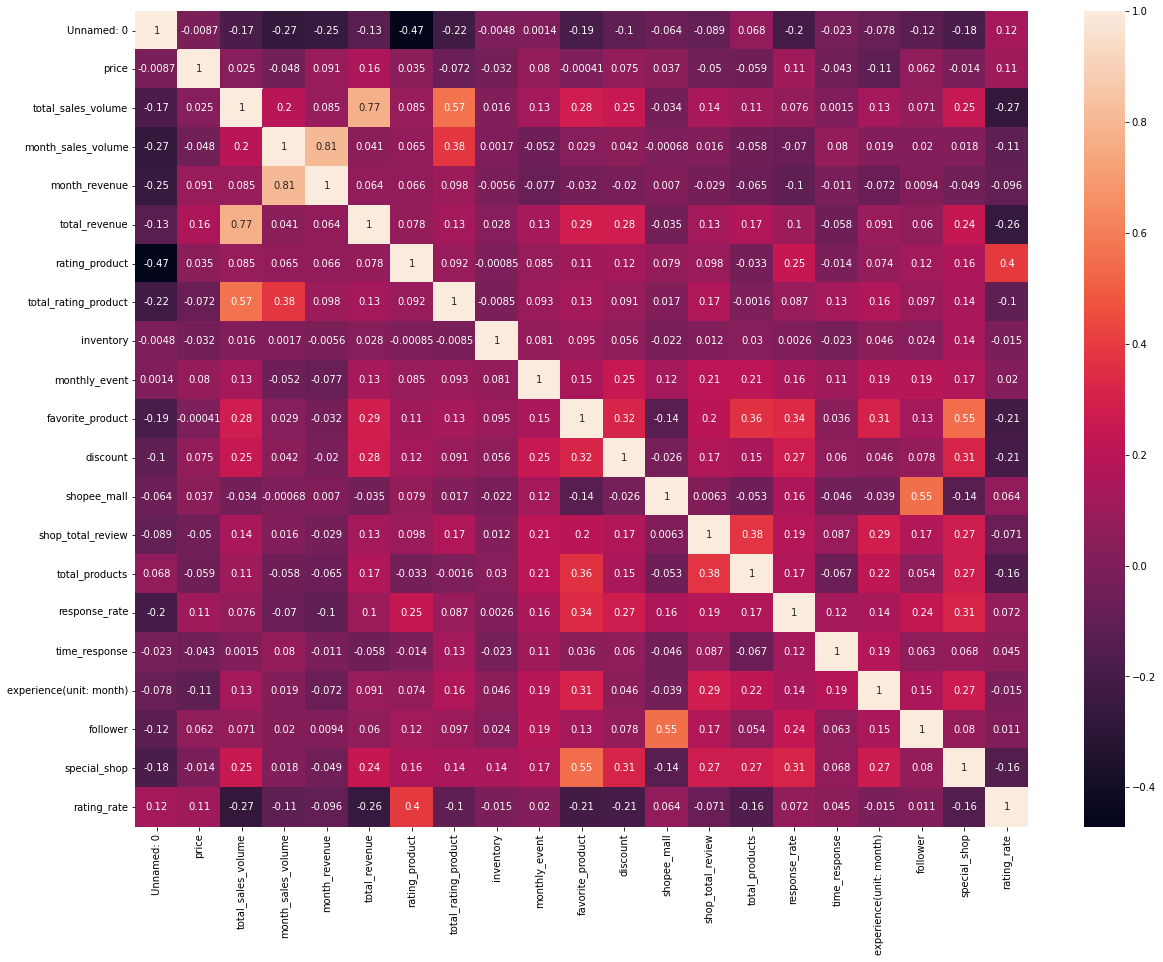

In [153]:
correlation(ultra_low_end)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 356
No: 528
Rate yes/no: 0.6742424242424242
Rate total sales volume: 6.833516508981124


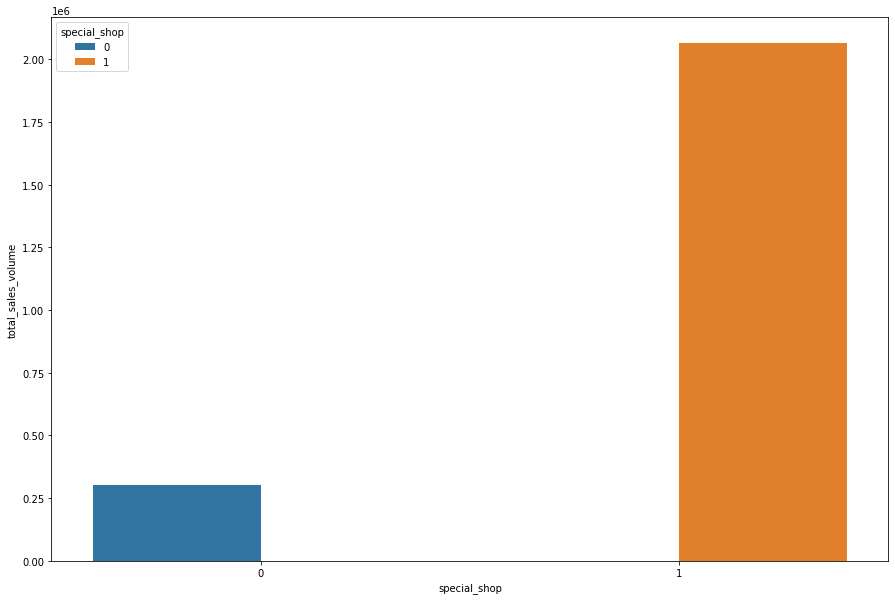

In [154]:
plot_special_shop(ultra_low_end)

Special shop 

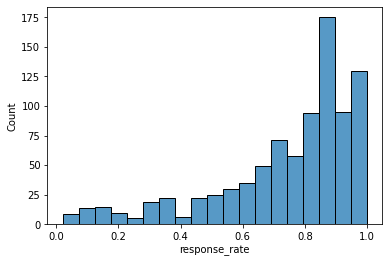

In [155]:
# Hist response rate
sns.histplot(ultra_low_end['response_rate'])

Sustain response rate in high level

In [156]:
ultra_low_end.groupby(['monthly_event'])['total_sales_volume'].sum().reset_index()

,monthly_event,total_sales_volume
0,0,298755.00
1,1,2067578.00


In [157]:
2067578.00/298755.00

6.920647353182374

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 568
No: 316
Rate yes/no: 1.7974683544303798
Rate total sales volume: 6.920647353182374


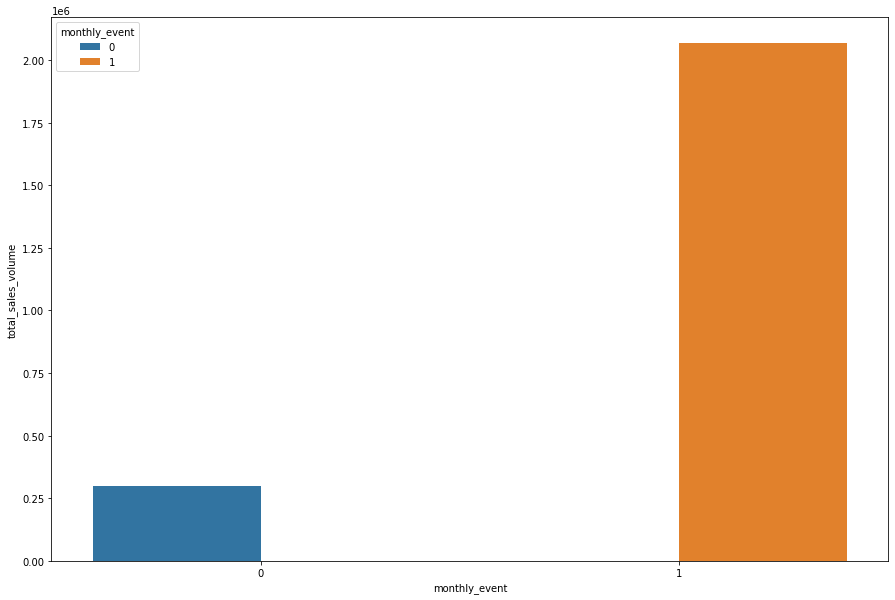

In [158]:
  # Monthly event
plot_monthly_event(ultra_low_end)

Total sales volume higher than when shop join monthly event with Shopee, almost 7 times more

In [159]:
ultra_low_end.groupby(['favorite_product'])['total_sales_volume'].sum().reset_index()

,favorite_product,total_sales_volume
0,0,182323.00
1,1,2184010.00


In [160]:
2184010.00/182323.00

11.9787958732579

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 351
No: 533
Rate yes/no: 0.6585365853658537
Rate total sales volume: 11.9787958732579


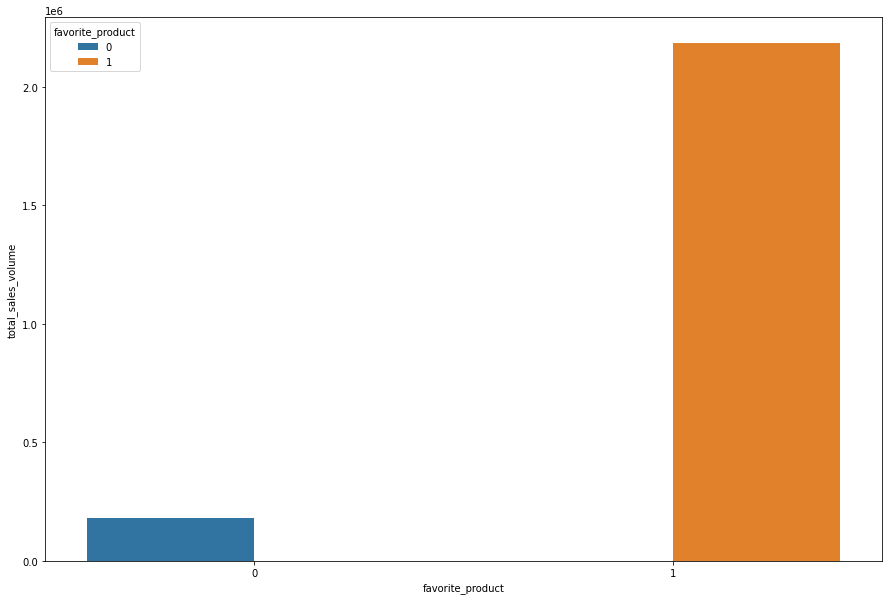

In [161]:
  # favorite product
plot_favorite_product(ultra_low_end)

Effectiveness with favorite shop and product, help shop raise 12 time sales volume

In [162]:
ultra_low_end.groupby(['monthly_event'])['total_sales_volume'].sum().reset_index()

,monthly_event,total_sales_volume
0,0,298755.00
1,1,2067578.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 24
No: 860
Rate yes/no: 0.027906976744186046
Rate total sales volume: 0.006088829478761163


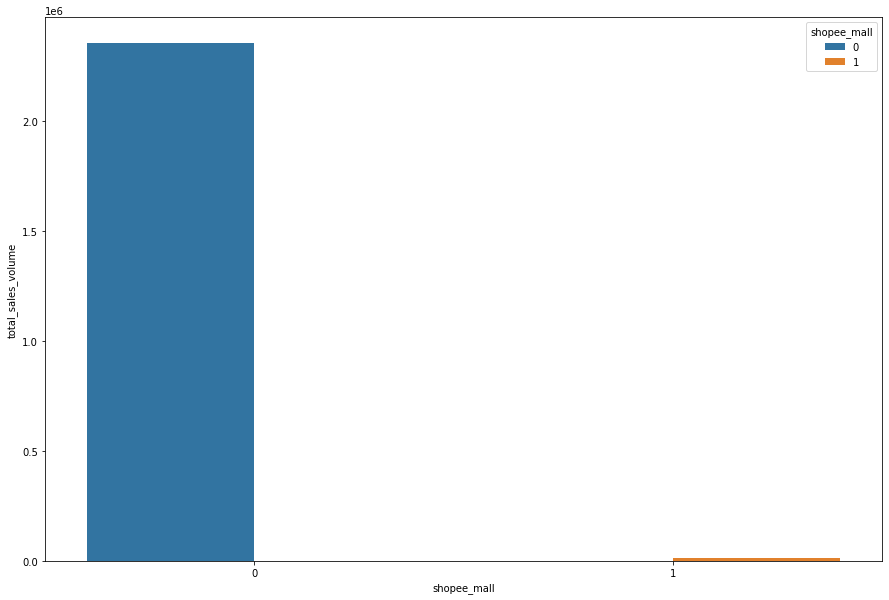

In [163]:
 # Shopee mall
plot_shopee_mall(ultra_low_end)

- Almost shop in this segment doesn't participate in Shopee mall

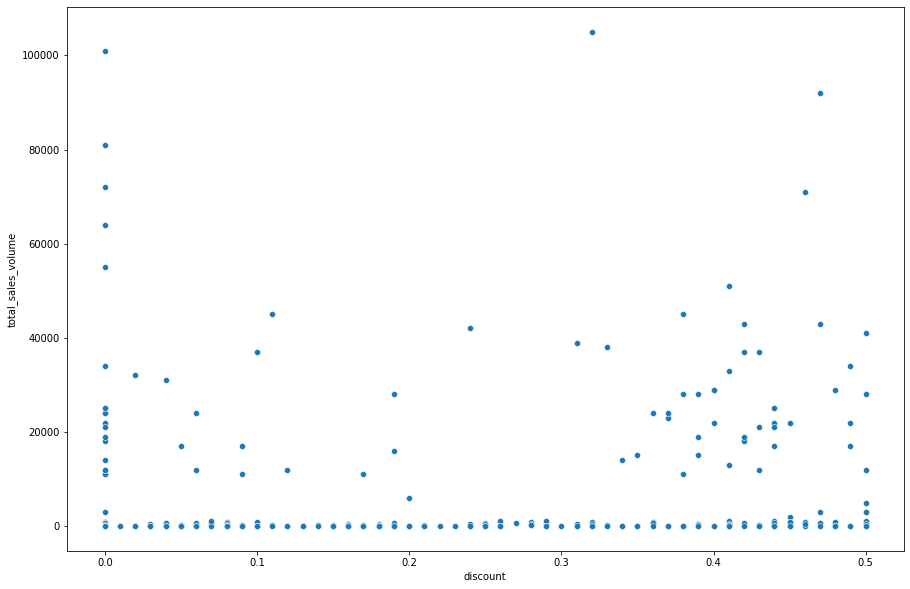

In [164]:
  # Discount
plot_discount(ultra_low_end)

Discount no correlation with total sales volume, it's mean no effect

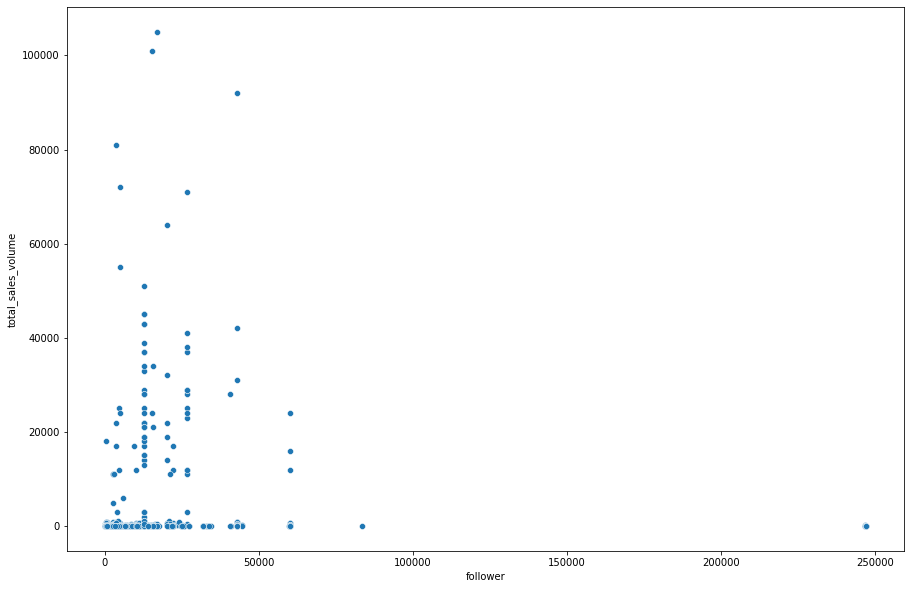

In [165]:
plot_follower(ultra_low_end)

Shop more follower no meaning more sales volume, because them no correlation. Follower on shopee don't same facebook or instagram

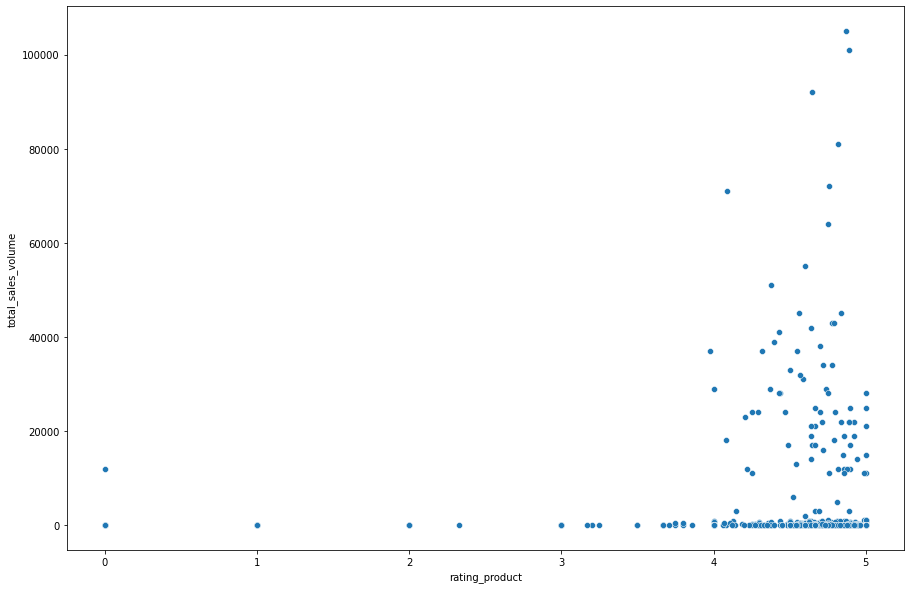

In [166]:
plot_rating_product(ultra_low_end)

Rating of products are clustered 4 star above, this is evident who customer always choose product with high rating

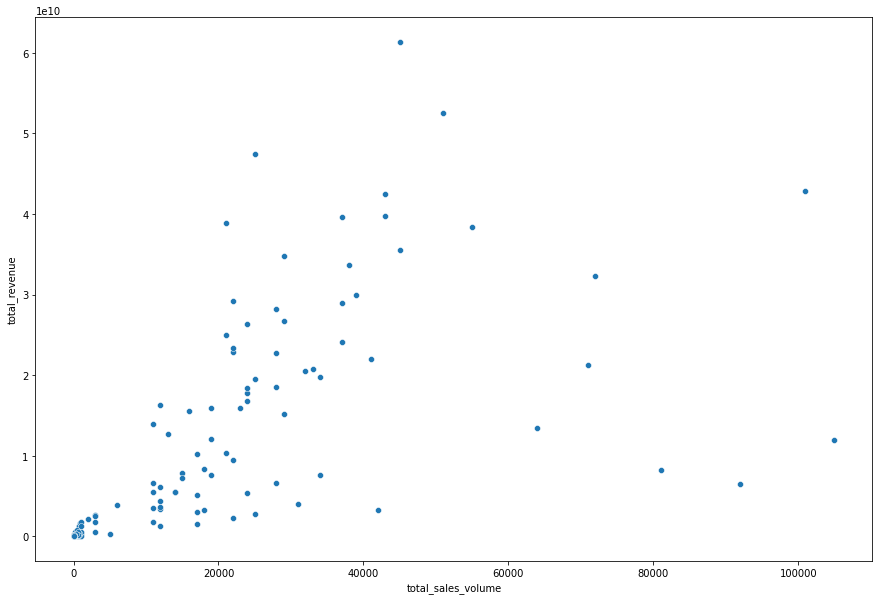

In [167]:
  # Total sales volume and total revenue
  plt.figure(figsize=(15,10))
  sns.scatterplot(data=ultra_low_end,
                  x = 'total_sales_volume',
                  y = 'total_revenue')
  plt.show()

Total revenue and sales volume correlation highest 0.77 because products under 2 milion, you wanna more revenue you have to more sales volume

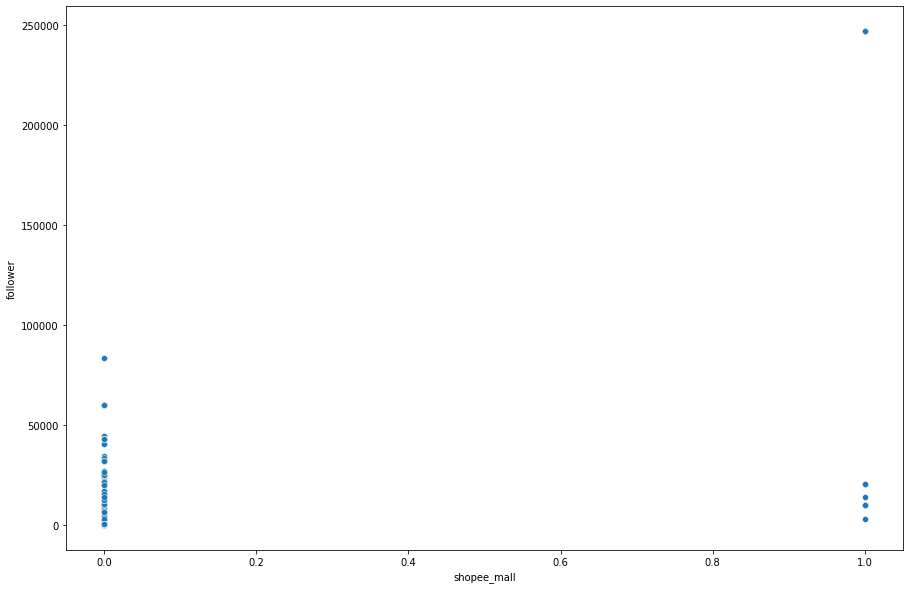

In [168]:
  plt.figure(figsize=(15,10))
  sns.scatterplot(data=ultra_low_end,
                  x = 'shopee_mall',
                  y = 'follower')
  plt.show()

In [169]:
# Top 10 product according to revenue
list(ultra_low_end.sort_values(by='total_sales_volume', ascending=False)[:10]['product_url'])

['https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%A1i-Si%C3%AAu-D%E1%BB%85-Th%C6%B0%C6%A1ng-Mini-BM10-i.70094786.6602136609?position=2326',
 'https://shopee.vn/Nokia-6300-%E2%98%85Ch%C3%ADnh-h%C3%A3ng-100-%E2%98%85-%C4%90i%E1%BB%87n-Tho%E1%BA%A1i-Ph%E1%BB%95-Th%C3%B4ng-%C4%90i%E1%BB%87n-Tho%E1%BA%A1i-Nokia-6300-Zin-B%E1%BA%A3o-H%C3%A0nh-12-Th%C3%A1ng-TU%C3%82N-H%C6%AFNG-Y%C3%8AN-i.116554044.8958237106?position=176',
 'https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%A1i-Nokia-101-Nokia-100-Nokia-105-Zin-Ch%C3%ADnh-H%C3%A3ng-K%C3%A8m-Pin-S%E1%BA%A1c-i.1657913.1236186398?position=6',
 'https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%A1i-Mini-2-Sim-Cute-i.130503882.2144758053?position=366',
 'https://shopee.vn/-R%E1%BA%BB-V%C3%B4-%C4%90%E1%BB%8Bch-_-Nokia-6300_%C4%90i%E1%BB%87n-Tho%E1%BA%A1i-Nokia-6300-M%E1%BB%9Bi-Ch%C3%ADnh-H%C3%A3ng-%C4%90%E1%BB%A7-M%C3%A0u-B%E1%BA%A3o-H%C3%A0nh-12-Th%C3%A1ng-Chu%E1%BA%A9n-Uy-T%C3%ADn-TU%C3%82N-H%C6%AFNG-Y%C3%8AN-i.434360904.3387888379?position=125',
 'https:/

### Low_end

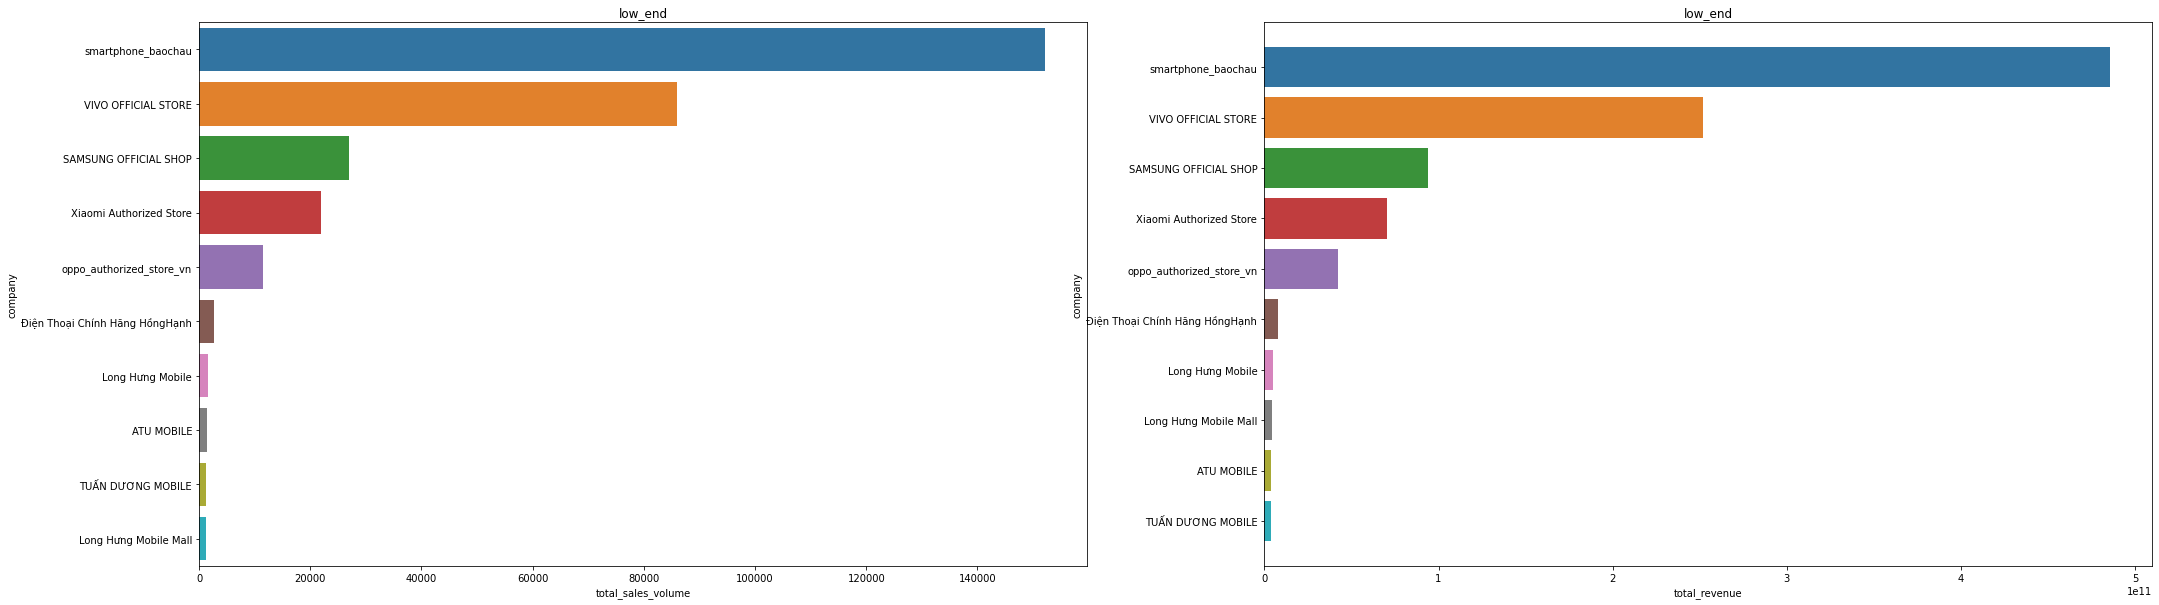

In [170]:
top_10_sales_revenue(low_end)

- In low end segment we can see big brand jump in here: SS, Xiaomi, Vivo, OPPO.
- Event samrtphone Bao Chau still is biggest

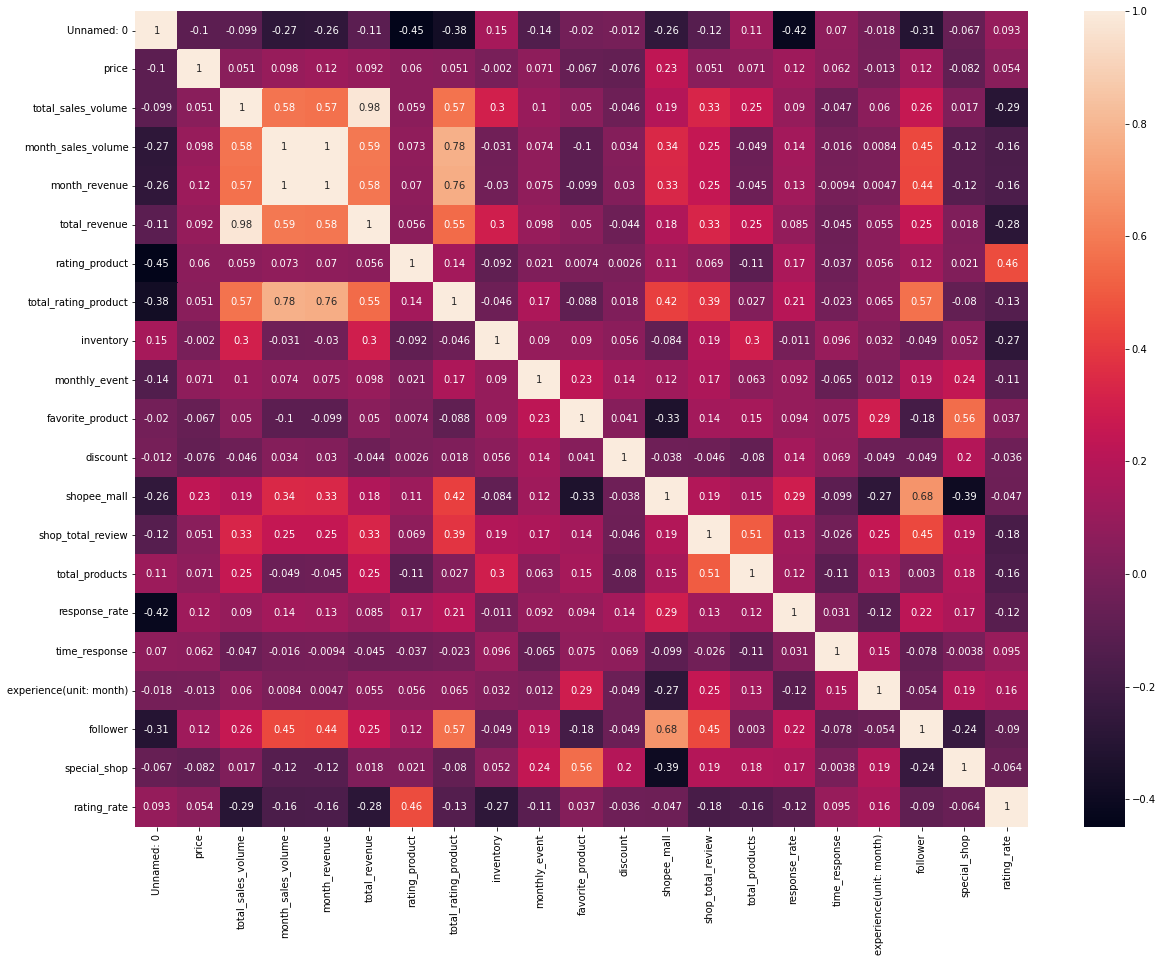

In [171]:
correlation(low_end)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 13
No: 234
Rate yes/no: 0.05555555555555555
Rate total sales volume: 0.0024637423484290466


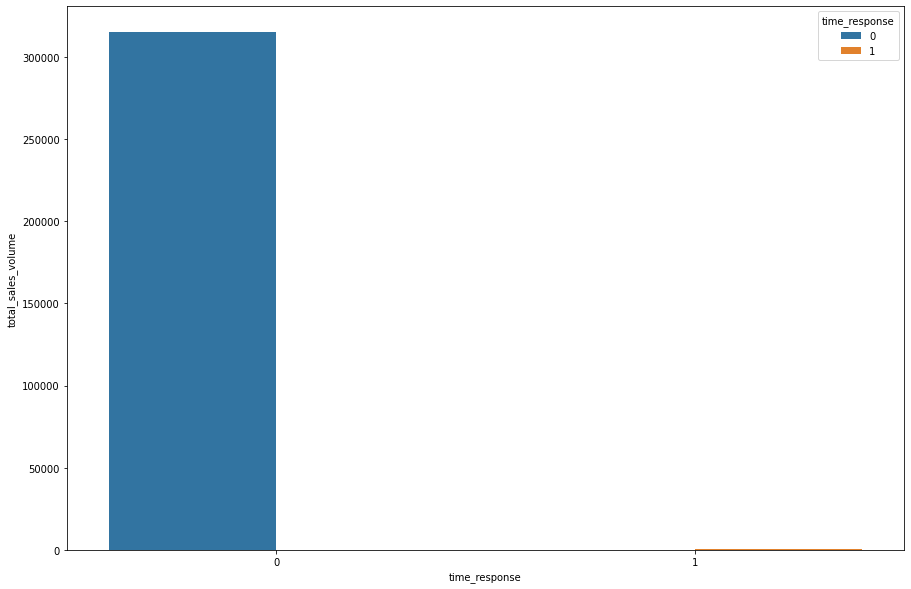

In [172]:
plot_time_response(low_end)

Time response don't important

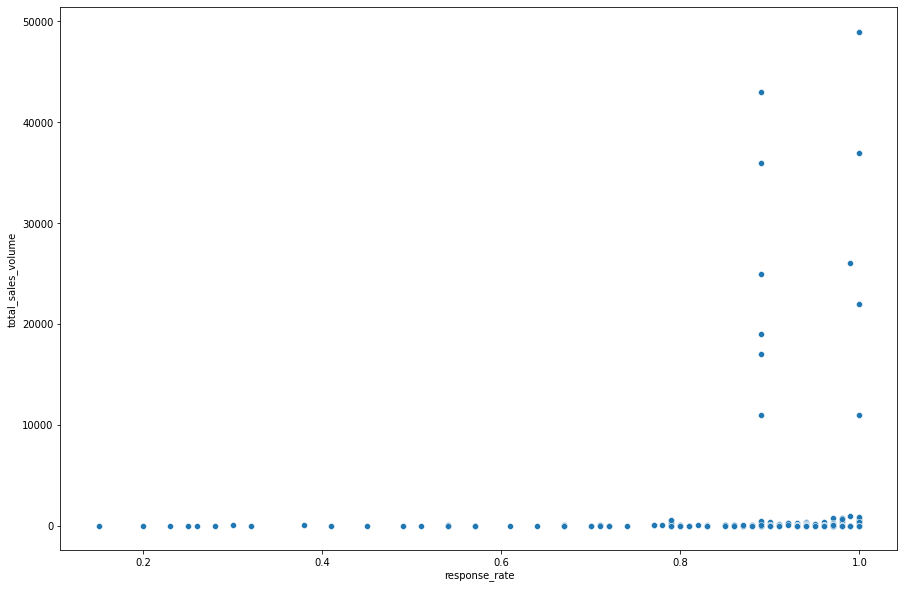

In [173]:
plot_response_rate(low_end)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 37
No: 210
Rate yes/no: 0.1761904761904762
Rate total sales volume: 0.921285140562249


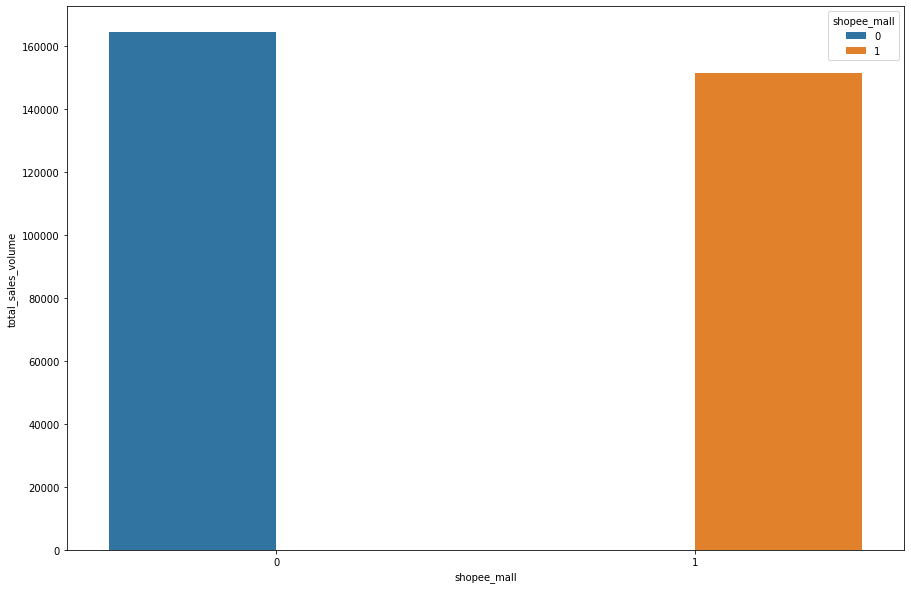

In [174]:
plot_shopee_mall(low_end)

Shopee mall close to 50% normal shop



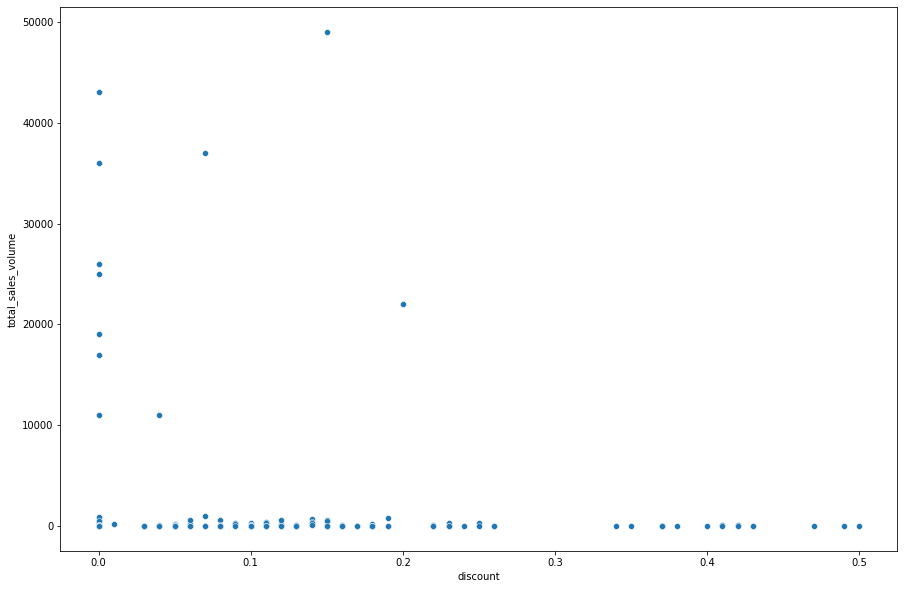

In [175]:
plot_discount(low_end)

discount no correaltion

In [176]:
low_end.groupby('favorite_product')['name', 'total_sales_volume'].agg({'name': 'count',
                                                                        'total_sales_volume' : 'sum'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,name,total_sales_volume
favorite_product,,
0,152,157417.00
1,95,158327.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 95
No: 152
Rate yes/no: 0.625
Rate total sales volume: 1.0057808241803616


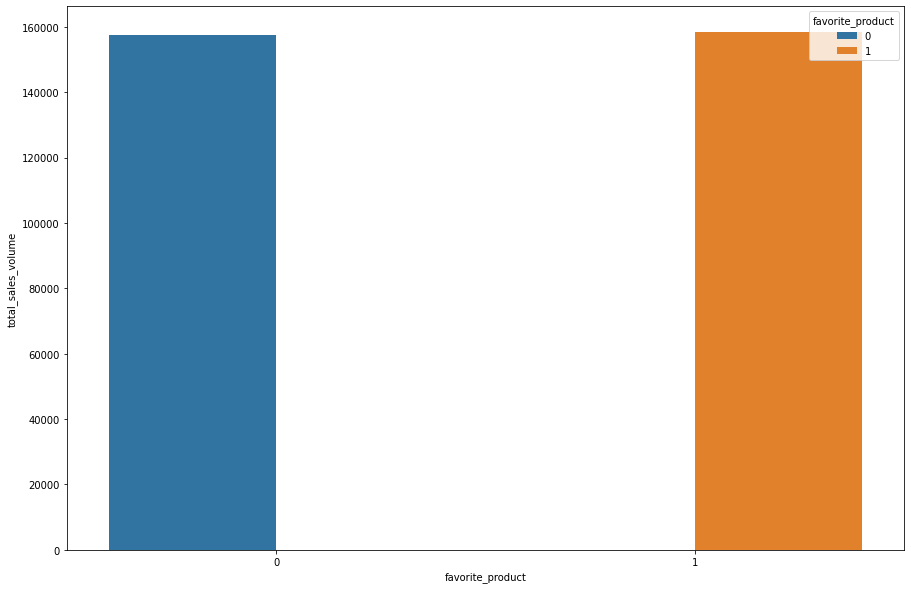

In [177]:
plot_favorite_product(low_end)

50/50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 198
No: 49
Rate yes/no: 4.040816326530612
Rate total sales volume: 236.93820648078372


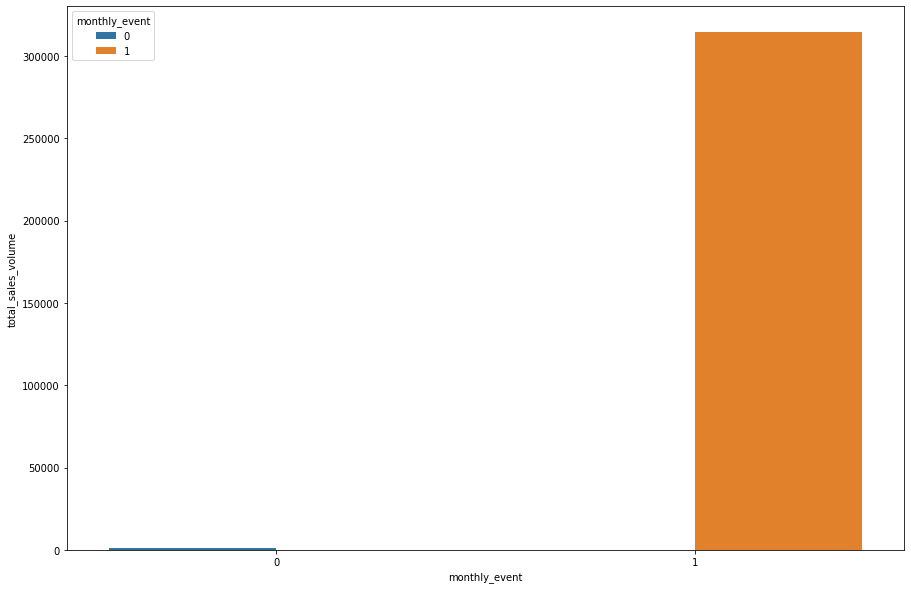

In [178]:
plot_monthly_event(low_end)

In [179]:
low_end.groupby('monthly_event')['name'].count()

monthly_event
0     49
1    198
Name: name, dtype: int64

81% product in this segment participate monthly event

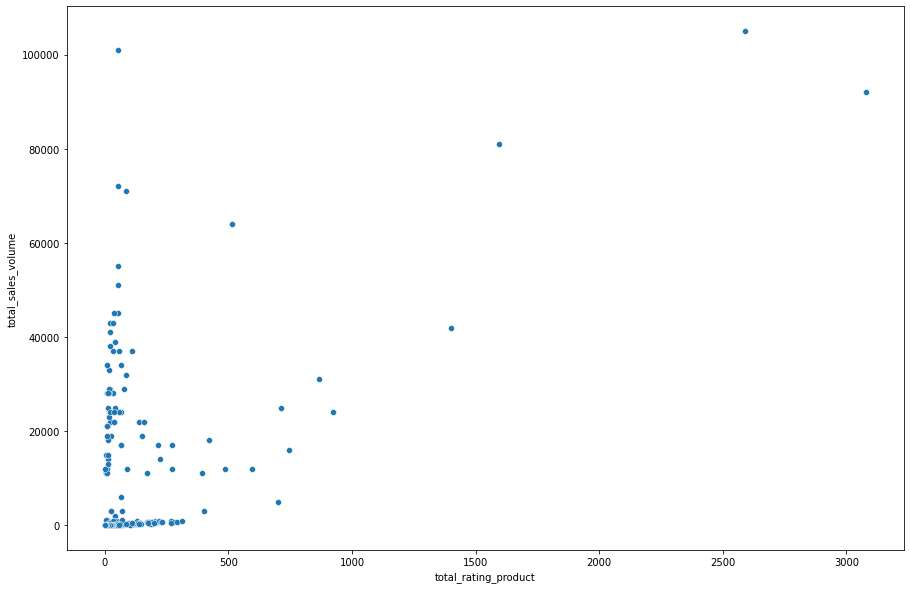

In [180]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=ultra_low_end,
                  x = 'total_rating_product',
                  y = 'total_sales_volume')
plt.show()

Total rating product with total sale volume no correlation

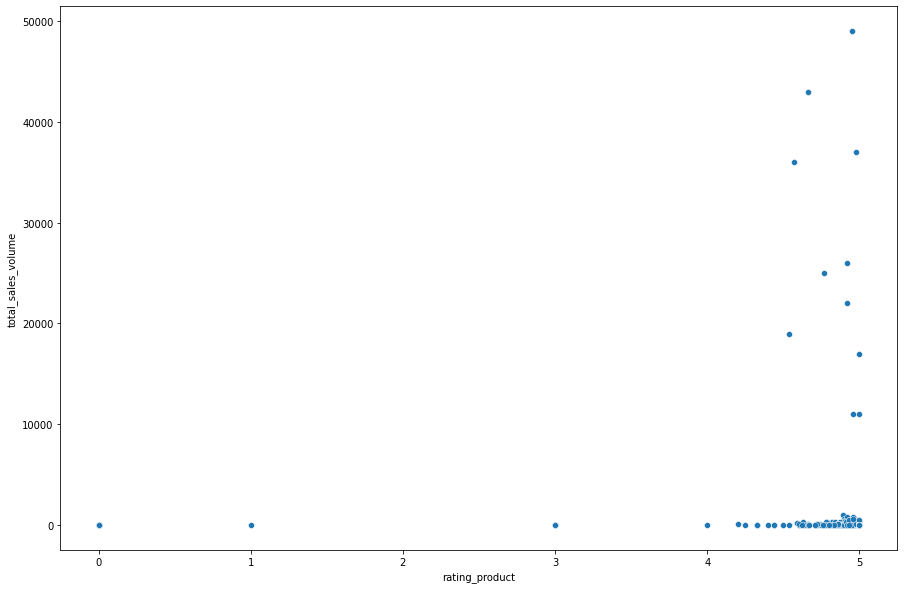

In [181]:
plot_rating_product(low_end)

The same with ultra low emd

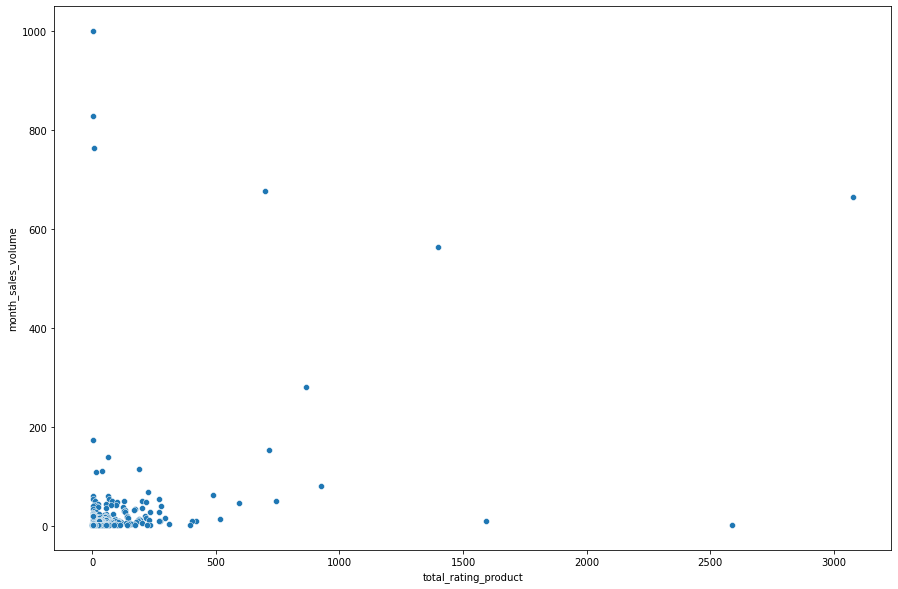

In [182]:
# Total raitng product and monthly sales volume
plt.figure(figsize=(15,10))
sns.scatterplot(data=ultra_low_end,
                  x = 'total_rating_product',
                  y = 'month_sales_volume')
plt.show()

In [183]:
low_end.groupby('shop_name')['month_sales_volume'].sum().sum()

7258.0

In [184]:
low_end.groupby('shop_name')['month_sales_volume'].sum().sort_values(ascending=False)

shop_name
vivo_official_store_vn       2081.00
samsung_official_store       1249.00
oppo_authorized_store_vn      930.00
dienthoaichinhhanghonghanh    303.00
realme_official_storevn       193.00
                               ...  
hoanganmobile                   1.00
sanhangngoai.com                1.00
happyphone2021                  1.00
thanhsonfptshop                 1.00
nguyenkhanhtung_3.              1.00
Name: month_sales_volume, Length: 109, dtype: float64

Last month, Vivo run big campaign so that effected on monthly sales volume

In [185]:
low_end.columns

Index(['Unnamed: 0', 'name', 'price', 'total_sales_volume',
       'month_sales_volume', 'month_revenue', 'total_revenue',
       'rating_product', 'total_rating_product', 'inventory', 'monthly_event',
       'favorite_product', 'discount', 'company', 'shop_name', 'shopee_mall',
       'shop_total_review', 'total_products', 'response_rate', 'time_response',
       'experience(unit: month)', 'follower', 'store_location', 'special_shop',
       'product_url', 'rating_rate', 'segmentation'],
      dtype='object')

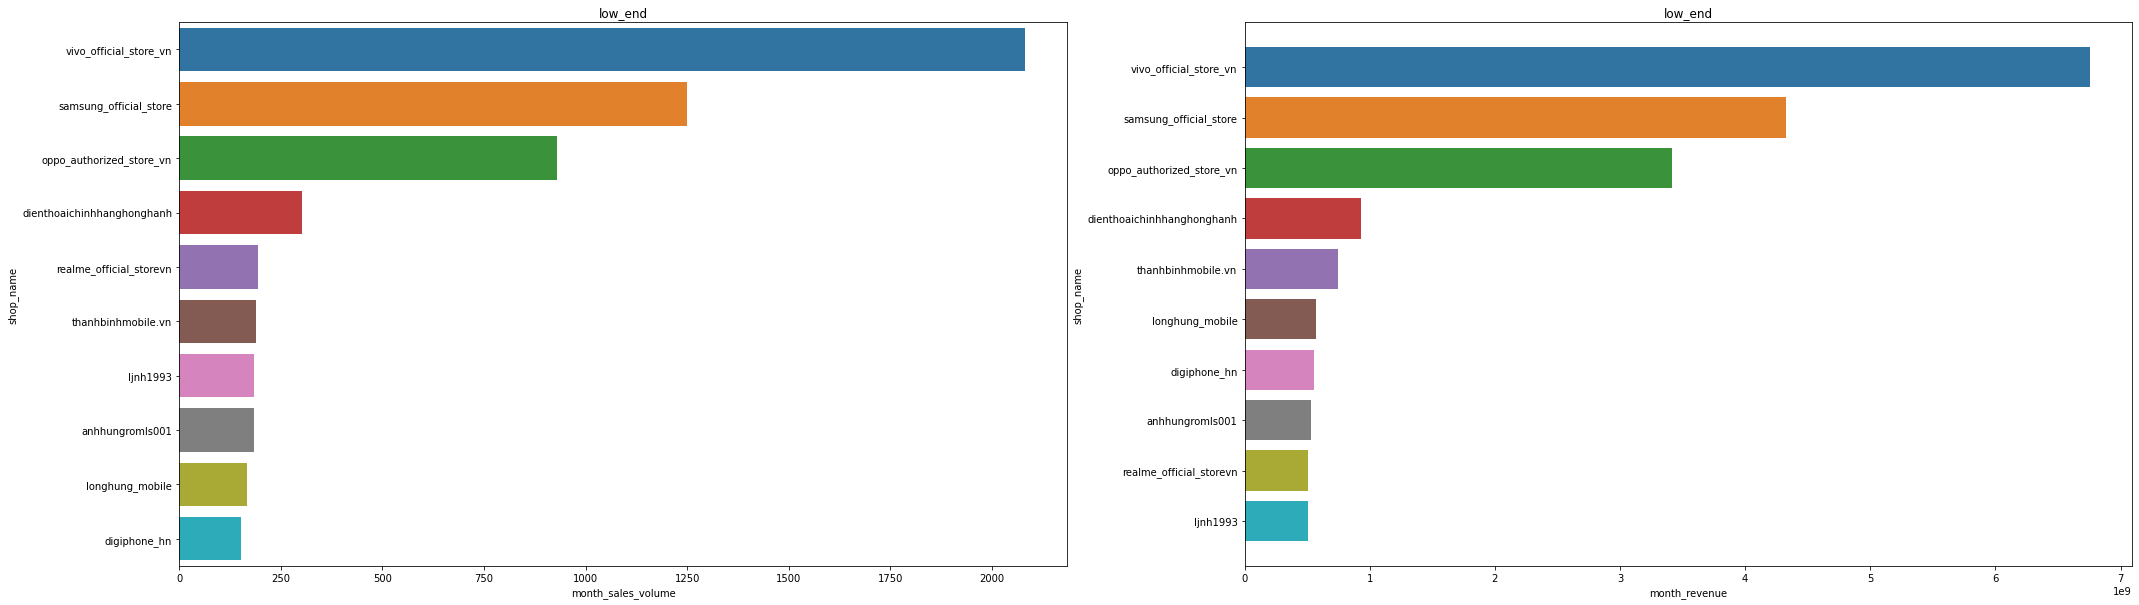

In [186]:
# Month low end
plt.figure(figsize=(35,10))
data = low_end
plt.subplot(121)
sns.barplot(data = data.groupby('shop_name')['month_sales_volume'].sum().sort_values(ascending=False).reset_index()[:10],
            y = 'shop_name',
            x = 'month_sales_volume')
plt.title(get_df_name(data))

plt.subplot(122)
sns.barplot(data = data.groupby('shop_name')['month_revenue'].sum().sort_values(ascending=False).reset_index()[:10],
            y = 'shop_name',
            x = 'month_revenue')
plt.title(get_df_name(data))


plt.axis('tight')
plt.show()


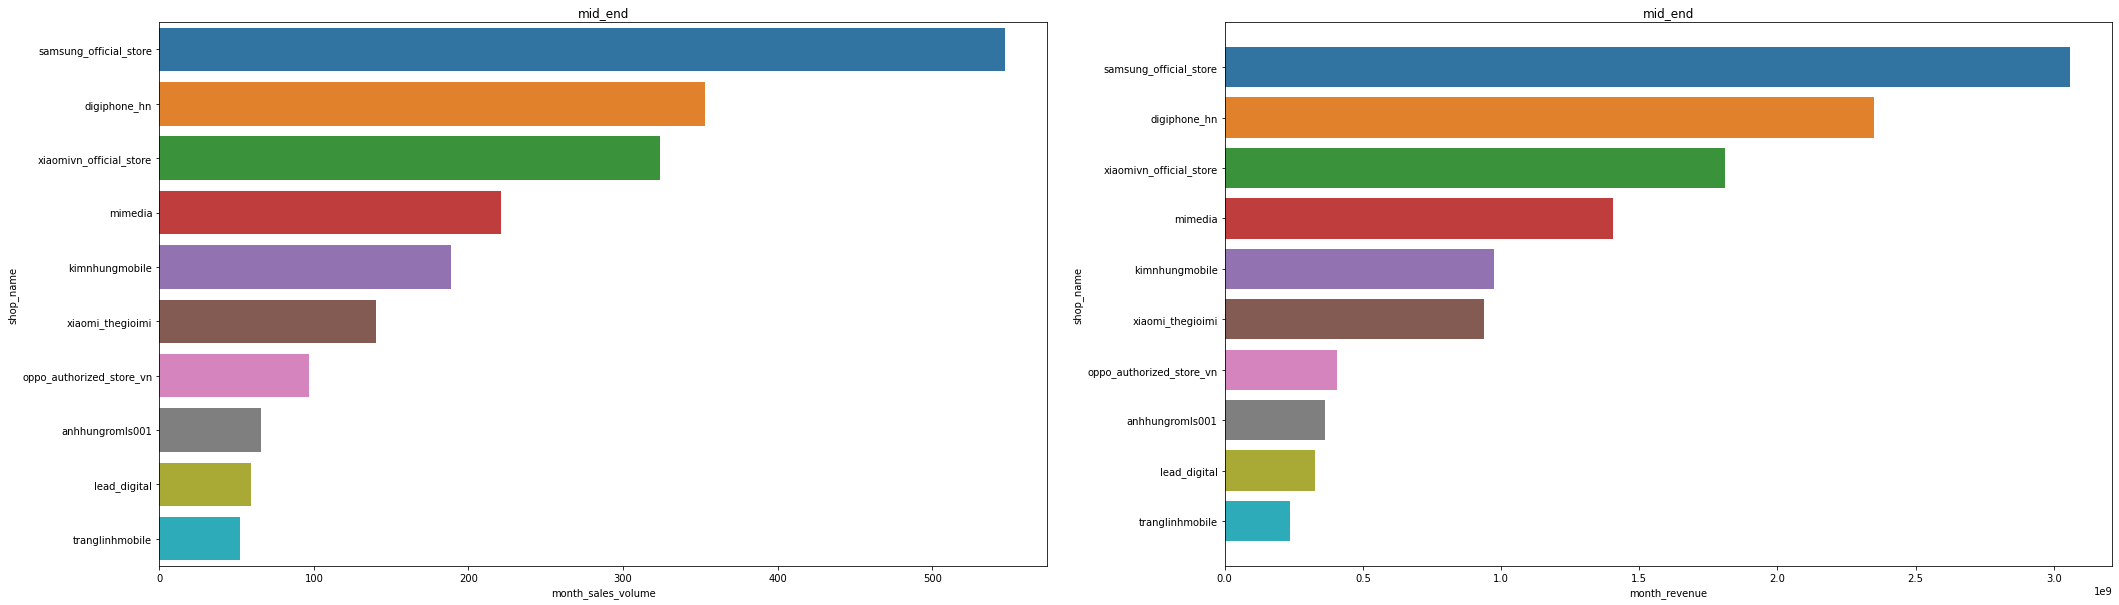

In [187]:
# Month low end
plt.figure(figsize=(35,10))
data = mid_end
plt.subplot(121)
sns.barplot(data = data.groupby('shop_name')['month_sales_volume'].sum().sort_values(ascending=False).reset_index()[:10],
            y = 'shop_name',
            x = 'month_sales_volume')
plt.title(get_df_name(data))

plt.subplot(122)
sns.barplot(data = data.groupby('shop_name')['month_revenue'].sum().sort_values(ascending=False).reset_index()[:10],
            y = 'shop_name',
            x = 'month_revenue')
plt.title(get_df_name(data))


plt.axis('tight')
plt.show()


### Mid end

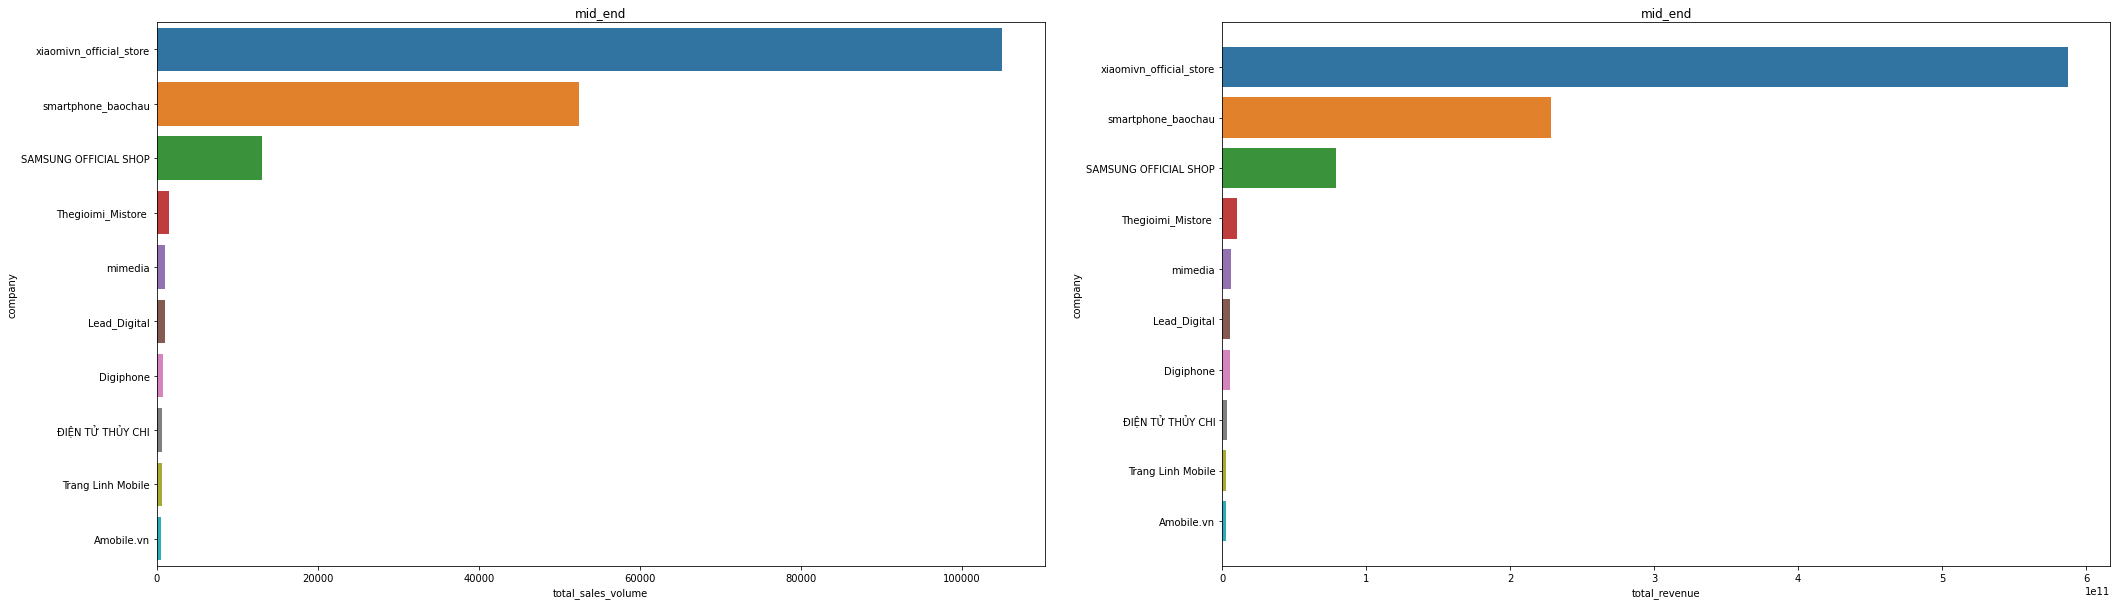

In [188]:
top_10_sales_revenue(mid_end)

- Here is segmentation for Xiaomi
- Smartphone still ranked 2


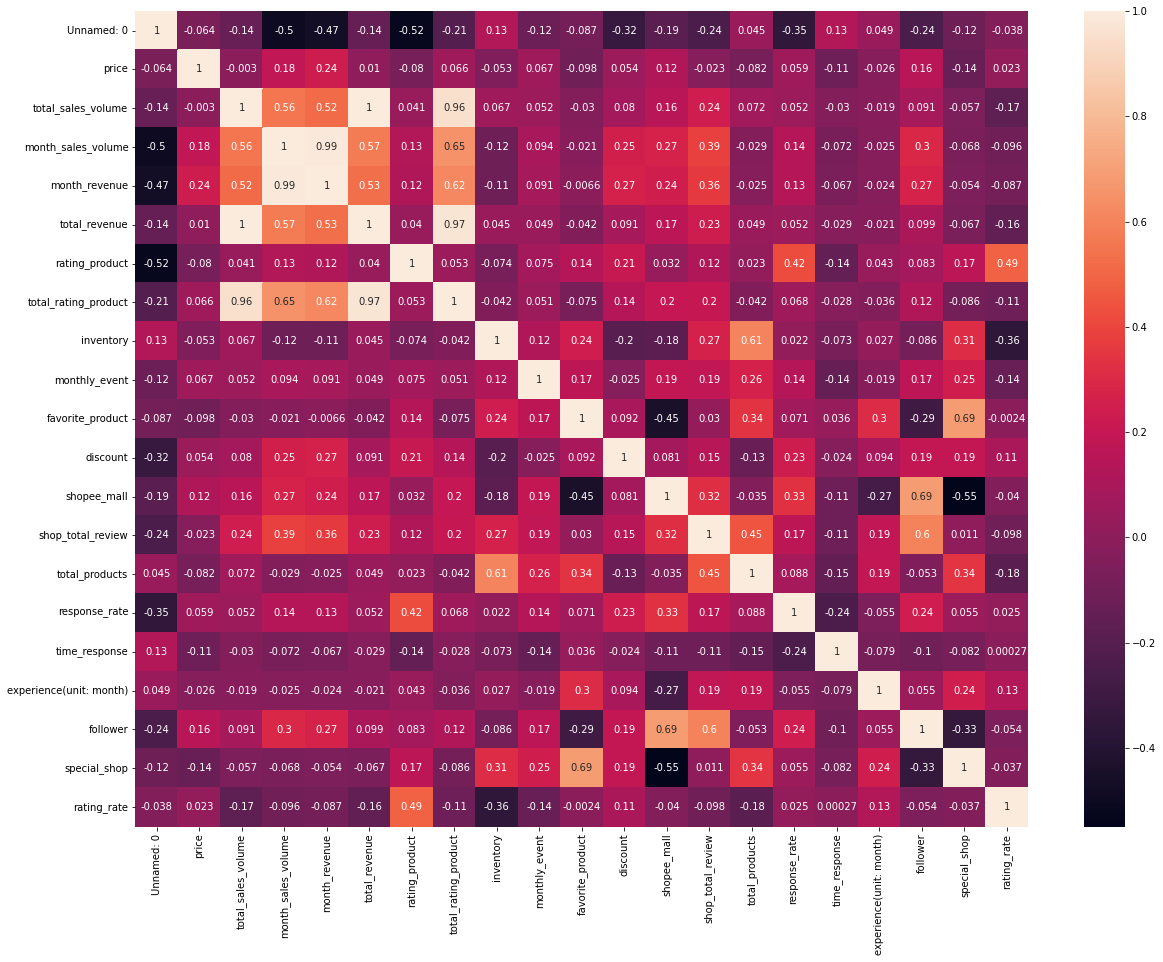

In [189]:
correlation(mid_end)

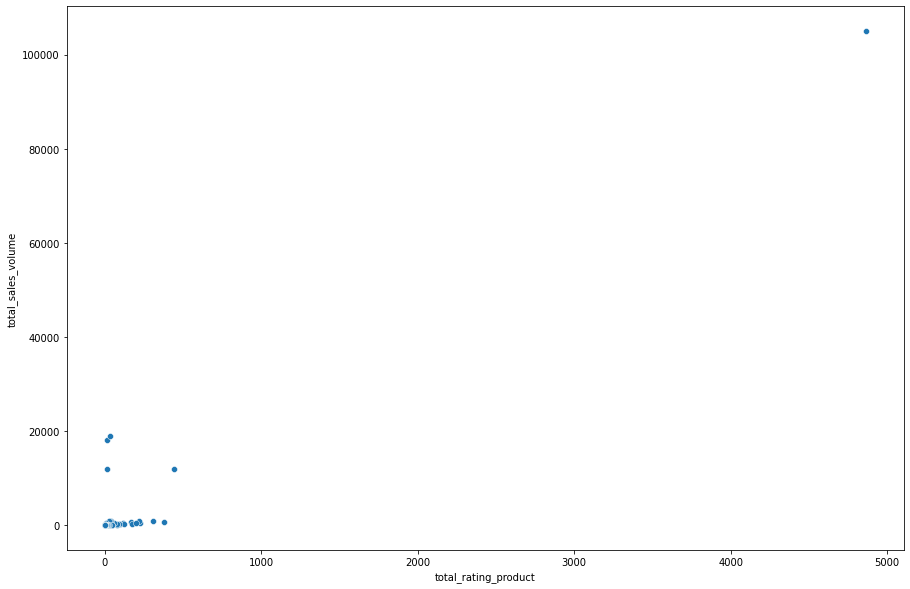

In [190]:
plot_total_rating_product(mid_end)

An outlier effect on total rating product

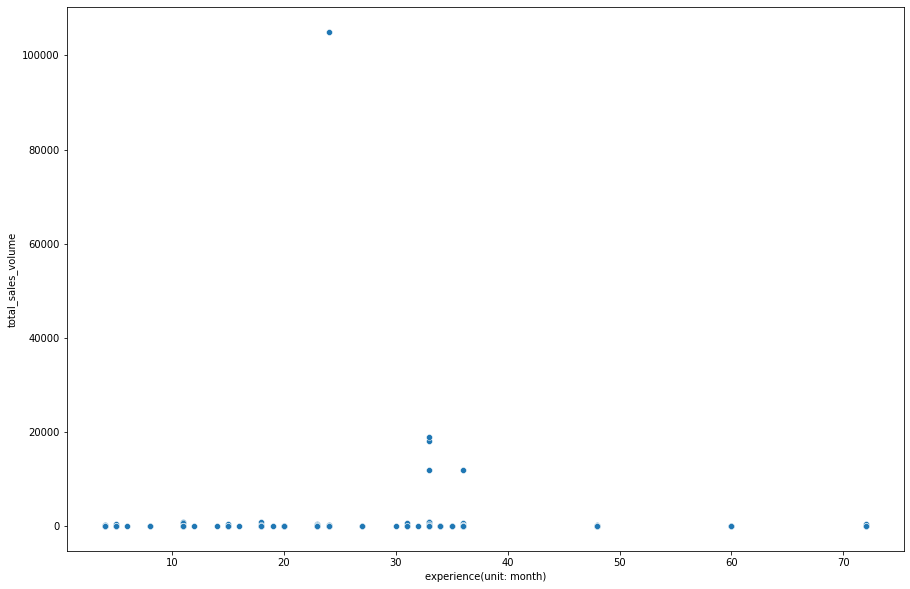

In [191]:
plot_experience(mid_end)

No correlation sales volume with experience

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 6
No: 128
Rate yes/no: 0.046875
Rate total sales volume: 0.0010349245064528942


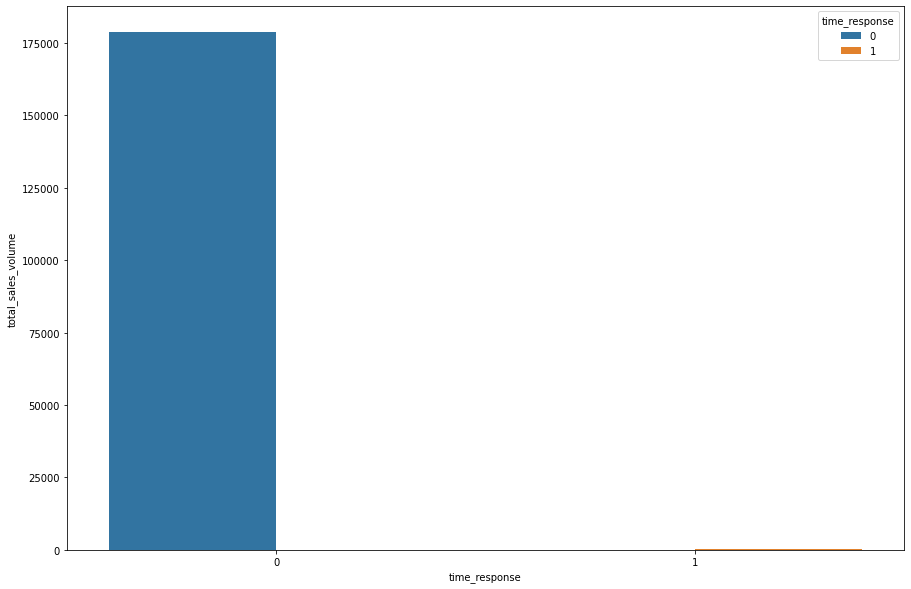

In [192]:
plot_time_response(mid_end)

Keep response rate is high but no need to rush reply

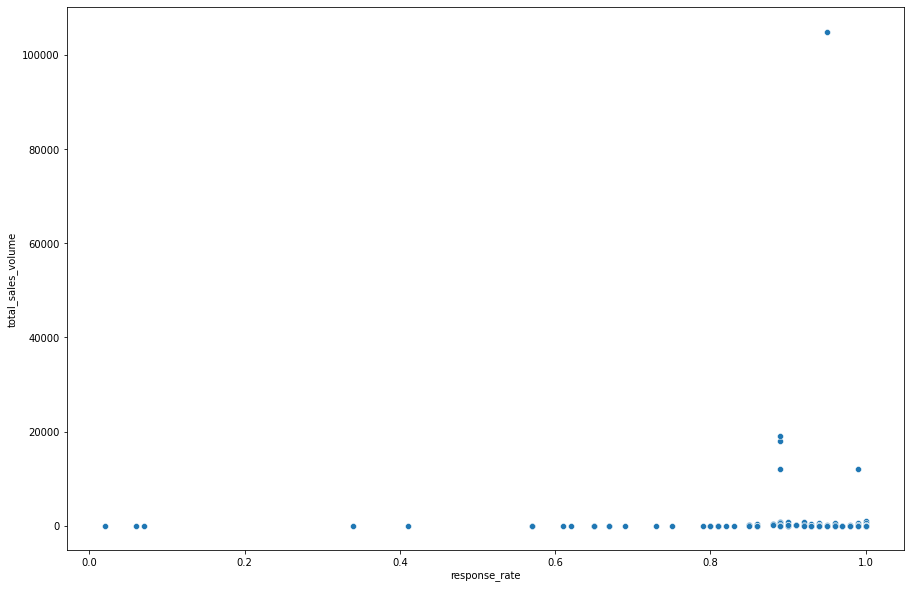

In [193]:
plot_response_rate(mid_end)

Same pattern, keep response rate as high as possible

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 29
No: 105
Rate yes/no: 0.2761904761904762
Rate total sales volume: 2.0669637501071216


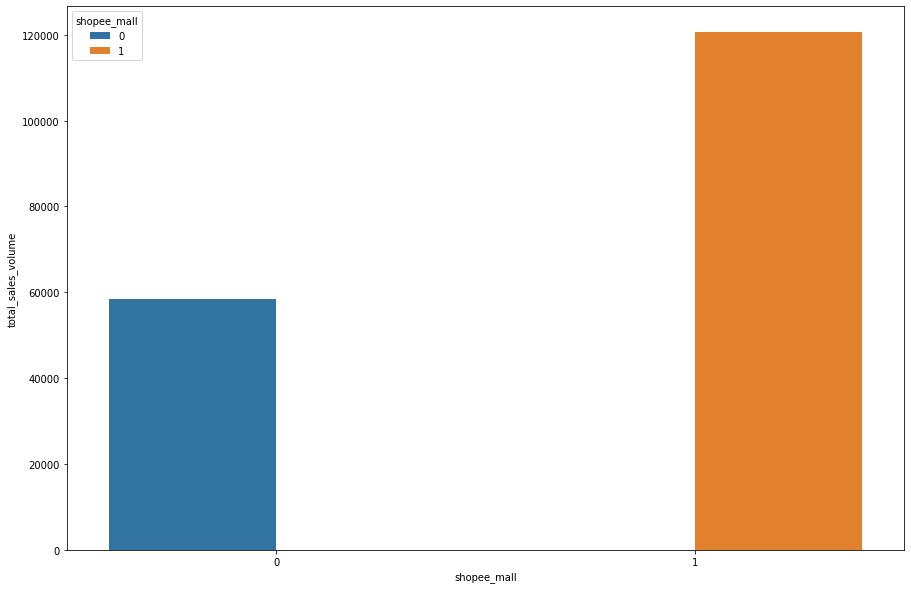

In [194]:
plot_shopee_mall(mid_end)

Shopee mall bring sales volume double normal shop

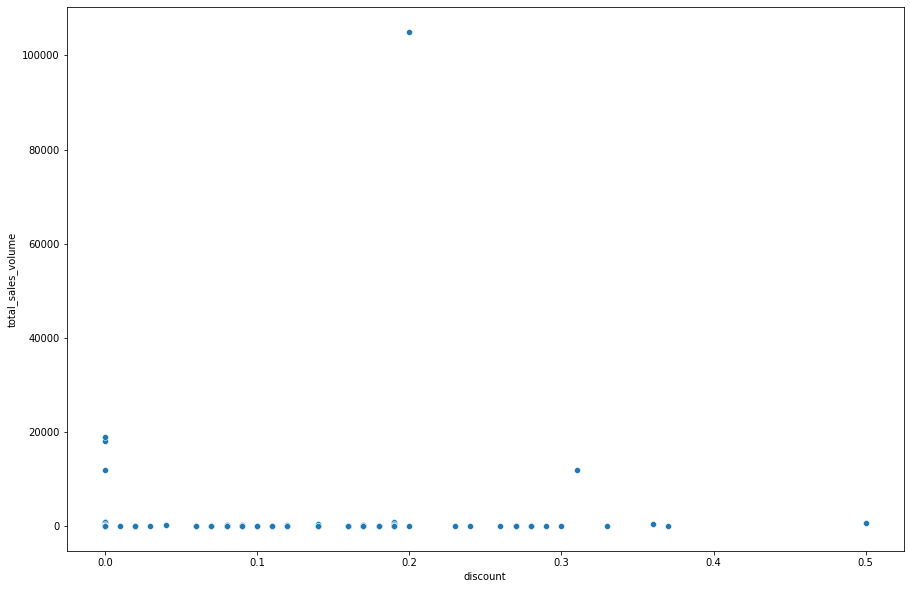

In [195]:
plot_discount(mid_end)

Discount no correlation in this segment 

Yes: 56
No: 78
Rate yes/no: 0.717948717948718
Rate total sales volume: 0.45879801734820325


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


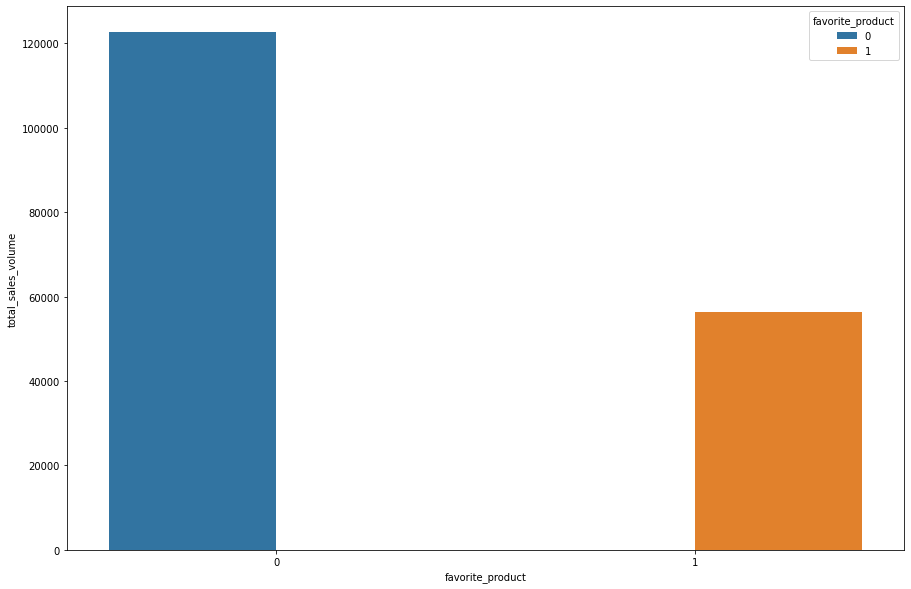

In [196]:
plot_favorite_product(mid_end)

Don't need to care favorite product

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 118
No: 16
Rate yes/no: 7.375
Rate total sales volume: 591.523178807947


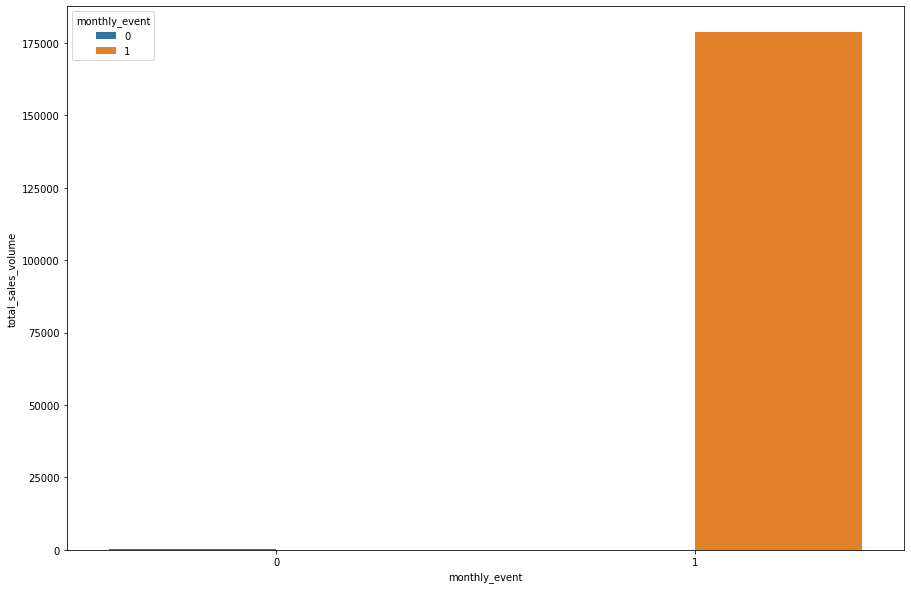

In [197]:
plot_monthly_event(mid_end)

Monthly event is important in this segment. 
- Sales volume shop participate monthly event more than 591 times

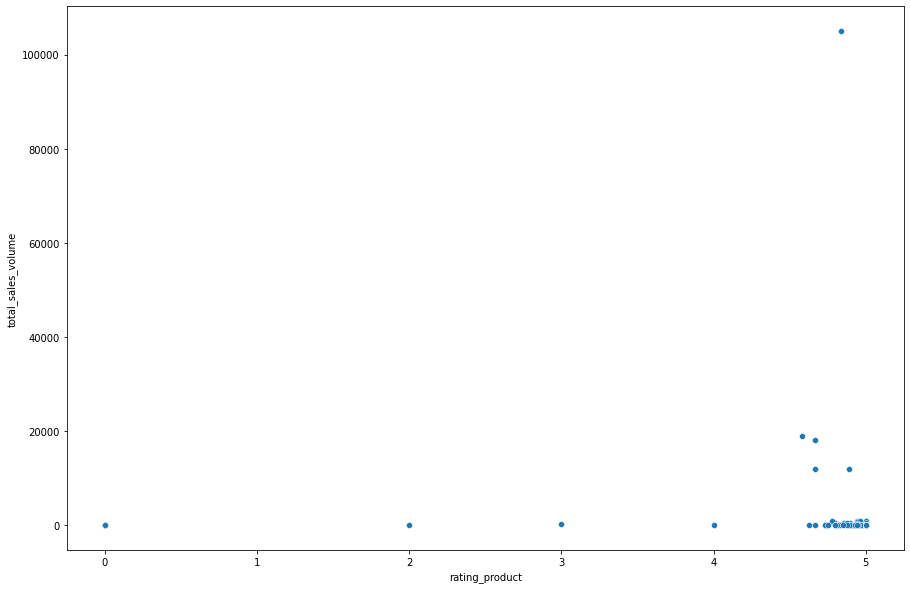

In [198]:
plot_rating_product(mid_end)

Same pattern before

### Mid to high end

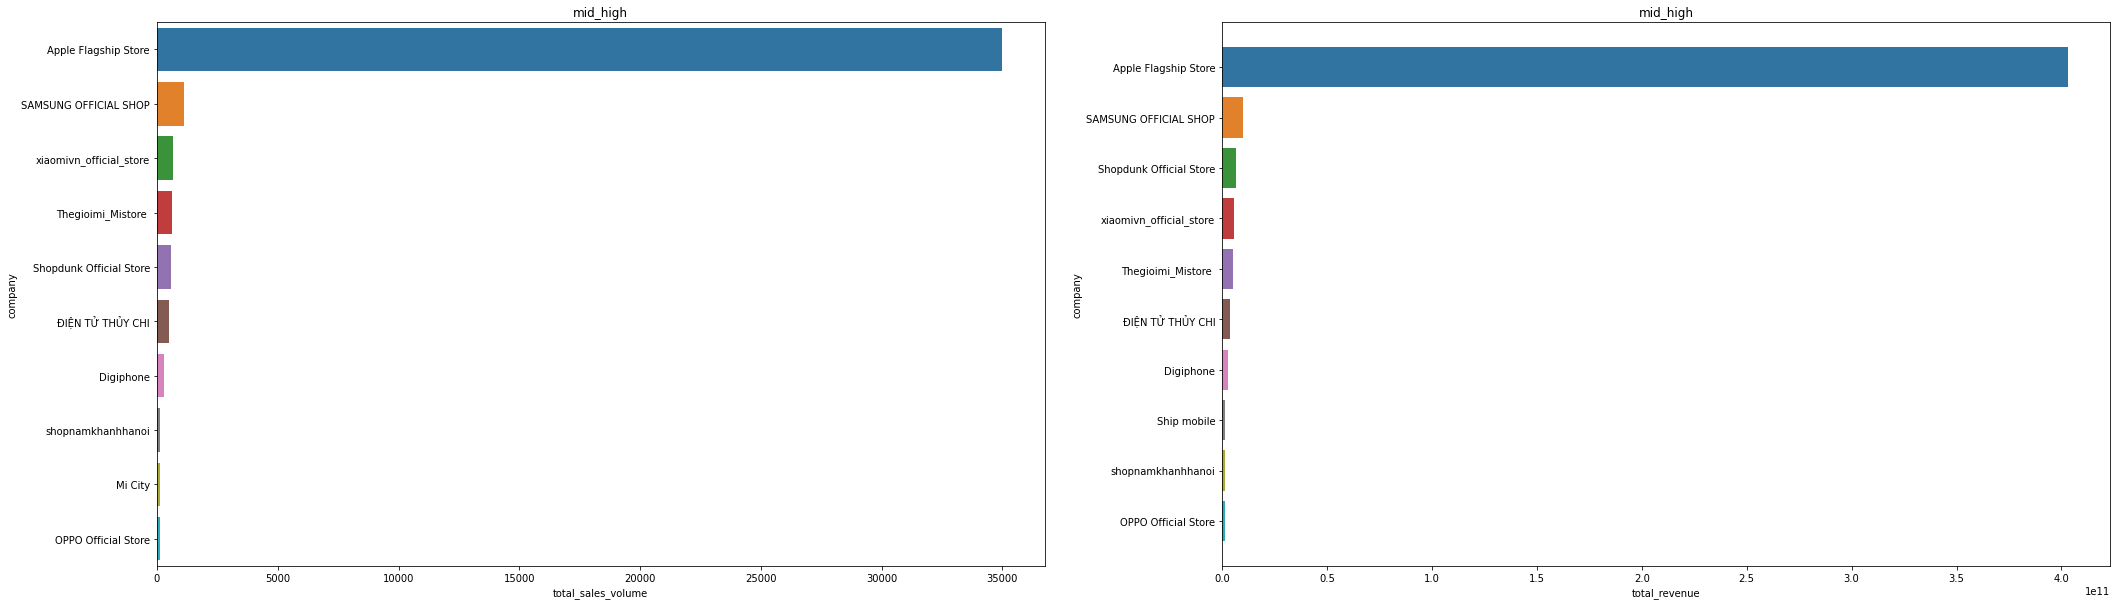

In [199]:
top_10_sales_revenue(mid_high)

Mid to high only for apple flagship store

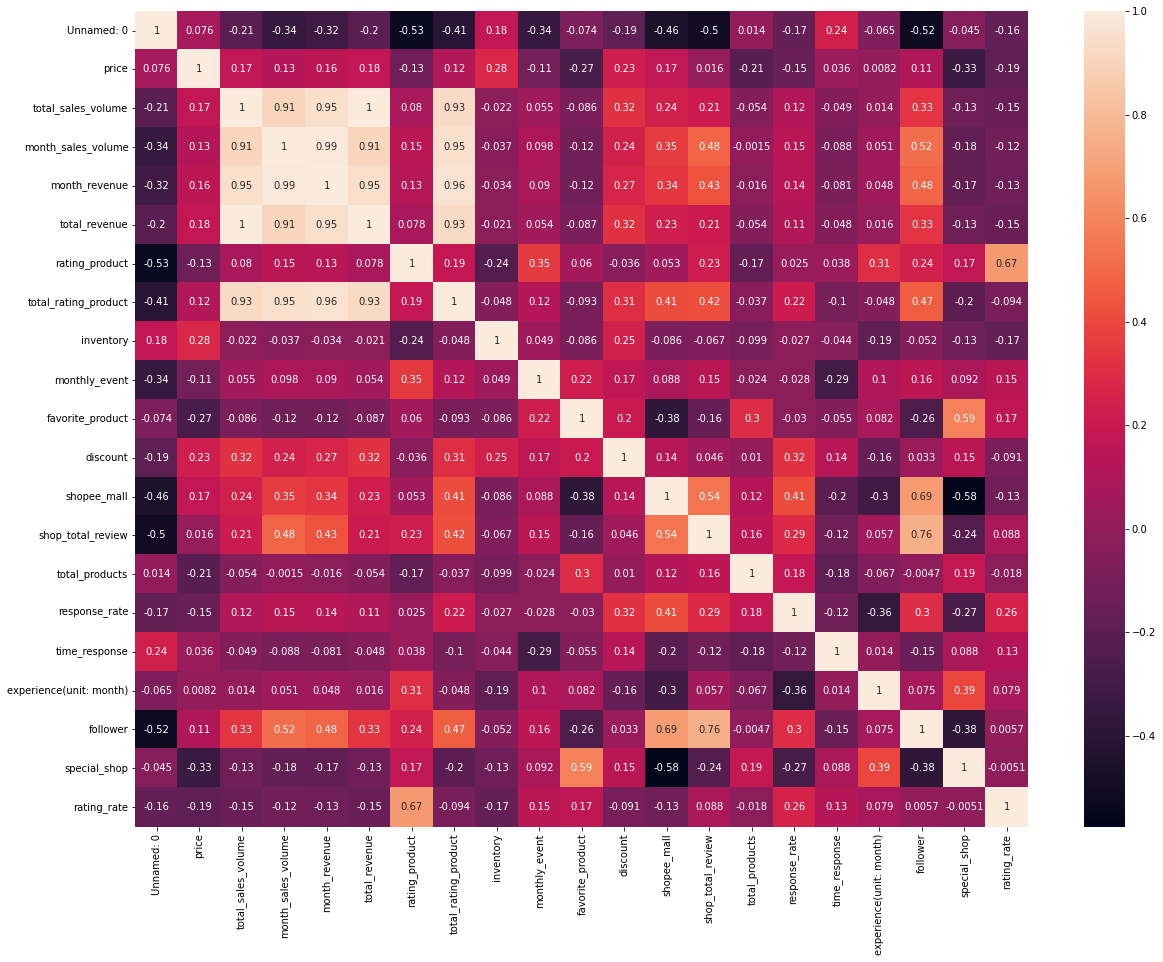

In [200]:
correlation(mid_high)

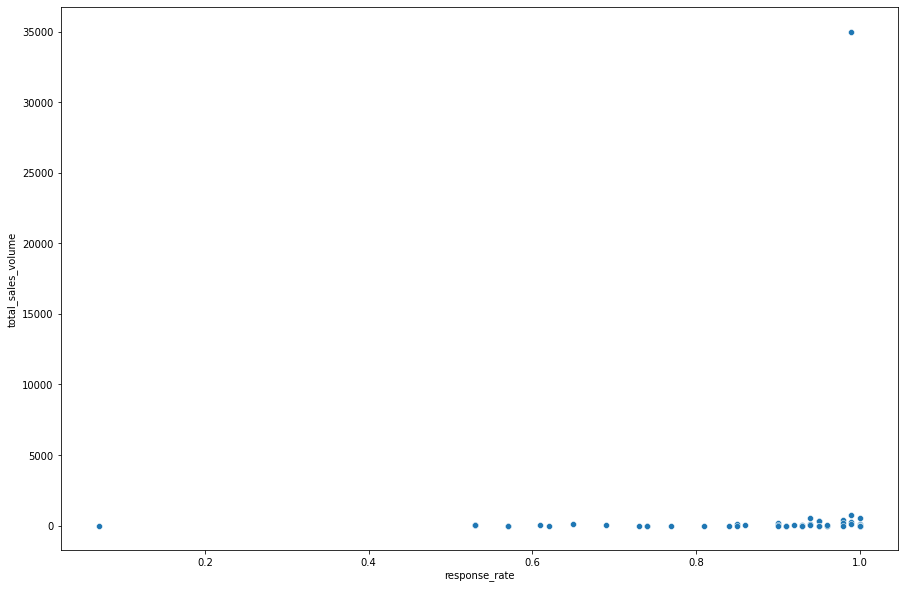

In [201]:
plot_response_rate(mid_high)

Like pattern before, keep response rate high possible

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 15
No: 39
Rate yes/no: 0.38461538461538464
Rate total sales volume: 24.45926876202694


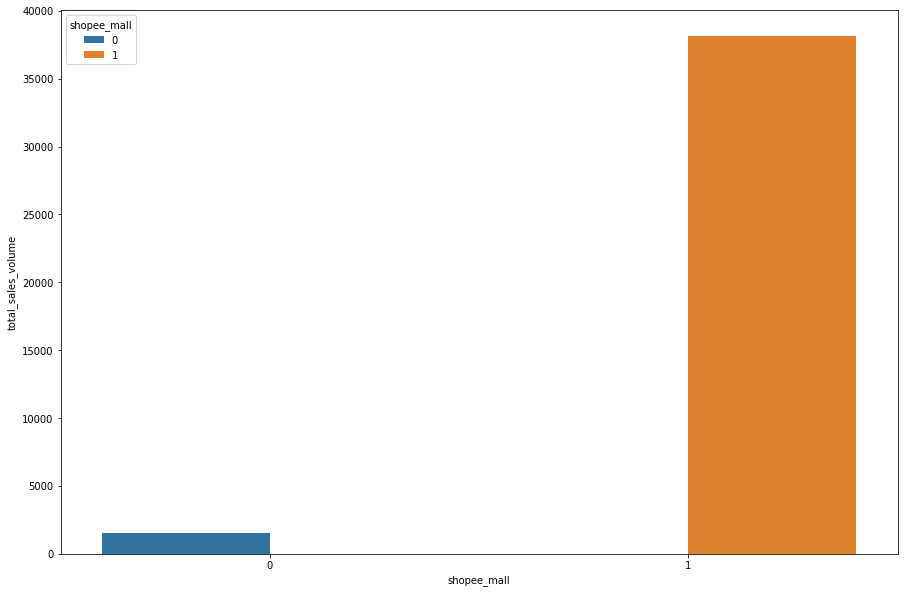

In [202]:
plot_shopee_mall(mid_high)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 15
No: 39
Rate yes/no: 0.38461538461538464
Rate total sales volume: 0.030881512648693574


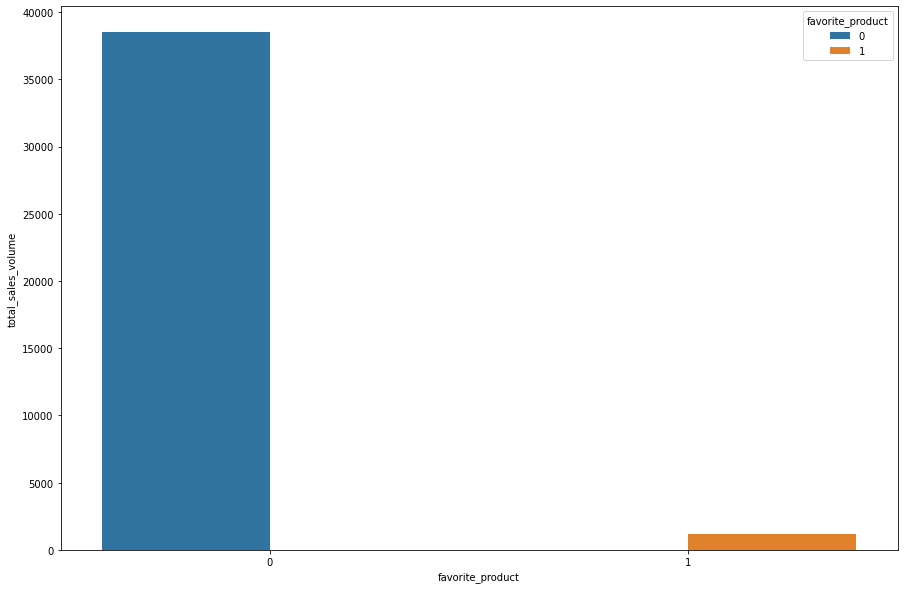

In [203]:
plot_favorite_product(mid_high)

Both of chart, Shopee mall give revenue more than favorite product

Yes: 48
No: 6
Rate yes/no: 8.0
Rate total sales volume: 4960.375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


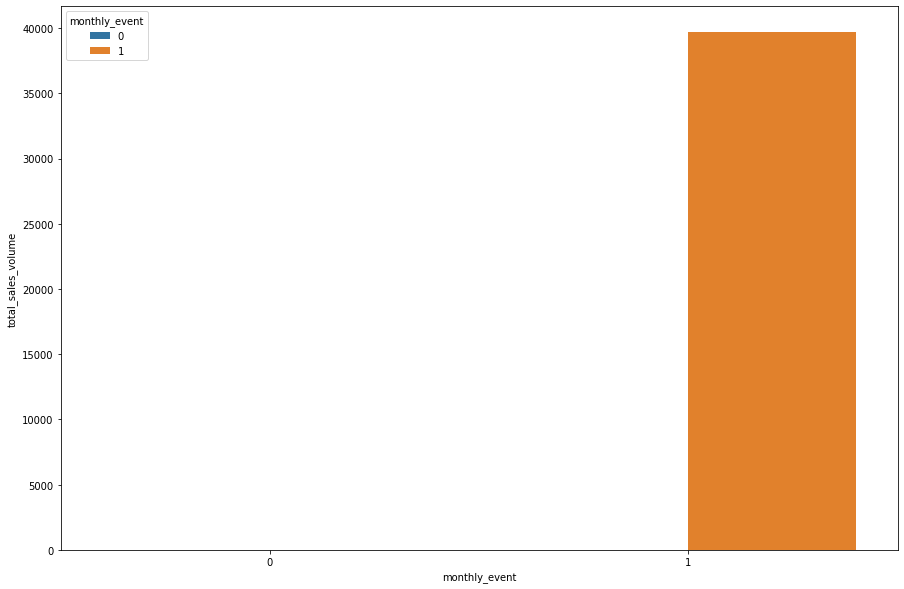

In [204]:
plot_monthly_event(mid_high)

As close as shop participate monthly event, because they know importance

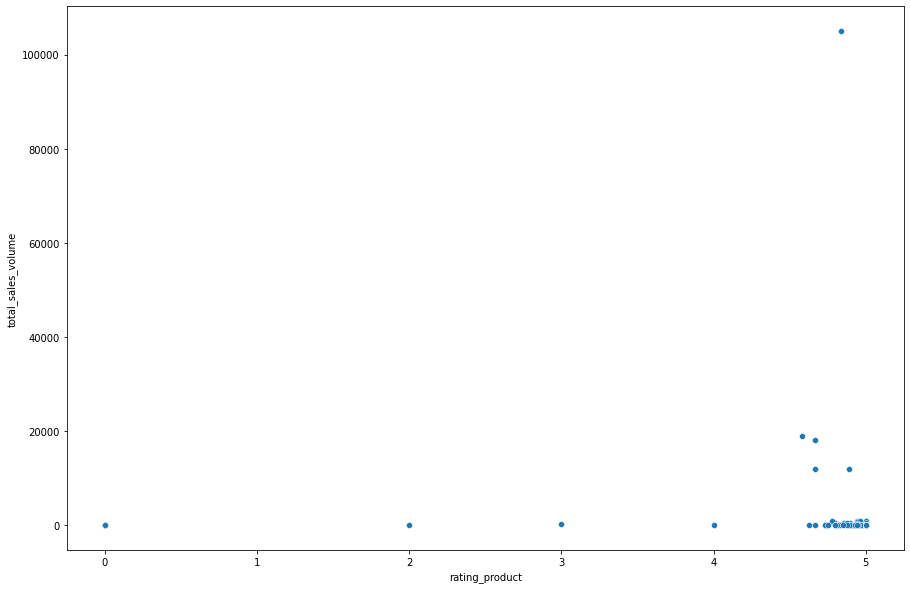

In [205]:
plot_rating_product(mid_end)

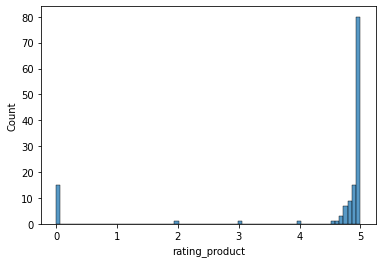

In [206]:
sns.histplot(mid_end['rating_product'])

Rating product in this segment so high, above 4,5 star

### High end

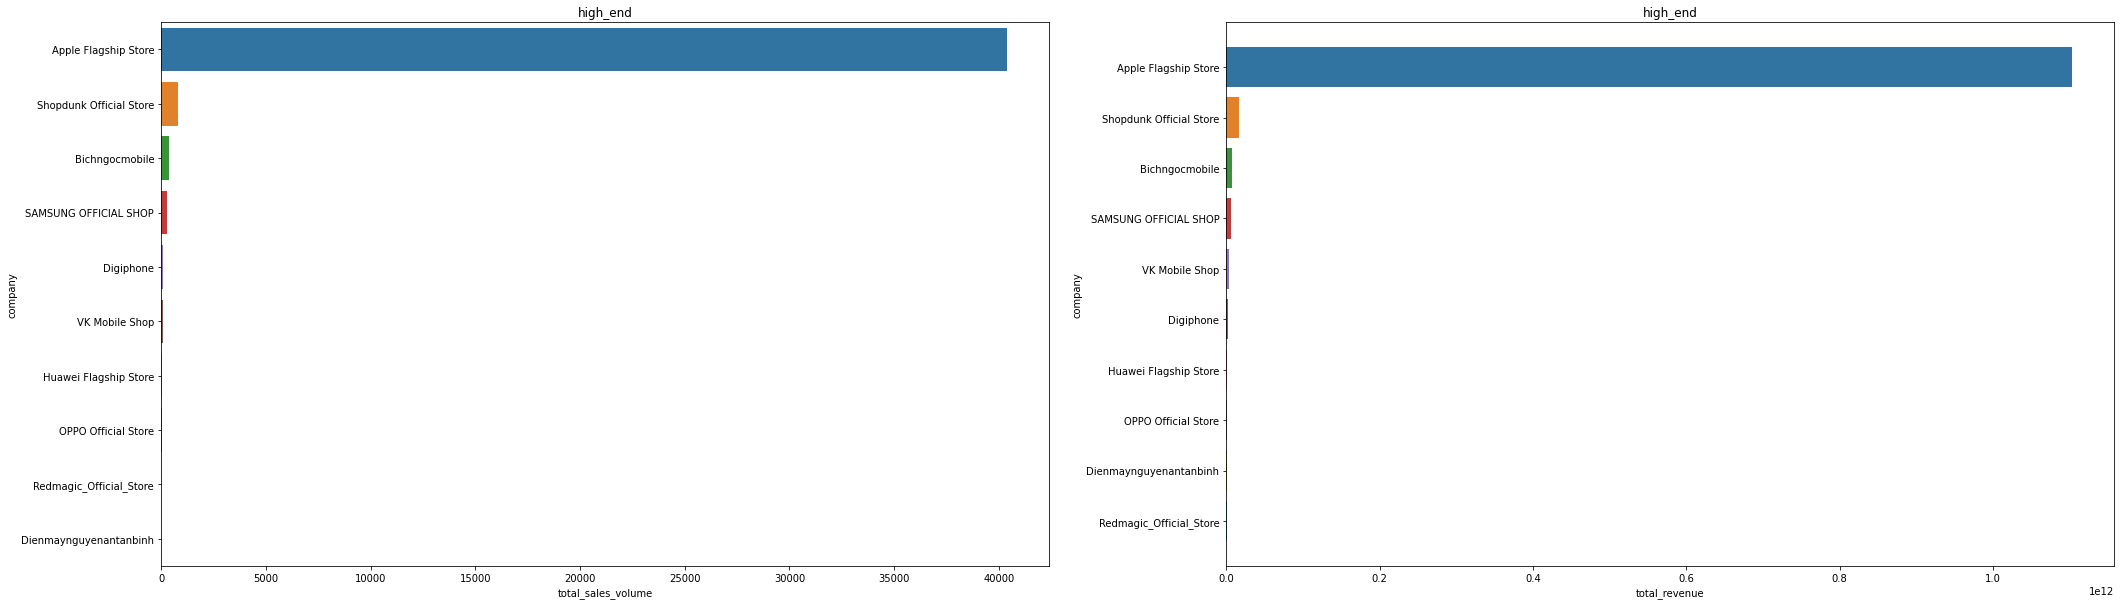

In [207]:
top_10_sales_revenue(high_end)

- Shopdunk is Apple authorized dealer in VN
- Bich Ngoc Mobile is portable mobile phone retail
- Digiphone_hn is portabel Xiaomi phone with good price
- Huawei_flagship_store is a store of Huawei VN

In this segment, portable phone or authorized phone

In [208]:
high_end.groupby('monthly_event').count()

,Unnamed: 0,name,price,total_sales_volume,month_sales_volume,month_revenue,total_revenue,rating_product,total_rating_product,inventory,favorite_product,discount,company,shop_name,shopee_mall,shop_total_review,total_products,response_rate,time_response,experience(unit: month),follower,store_location,special_shop,product_url,rating_rate,segmentation
monthly_event,,,,,,,,,,,,,,,,,,,,,,,,,,
1,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23


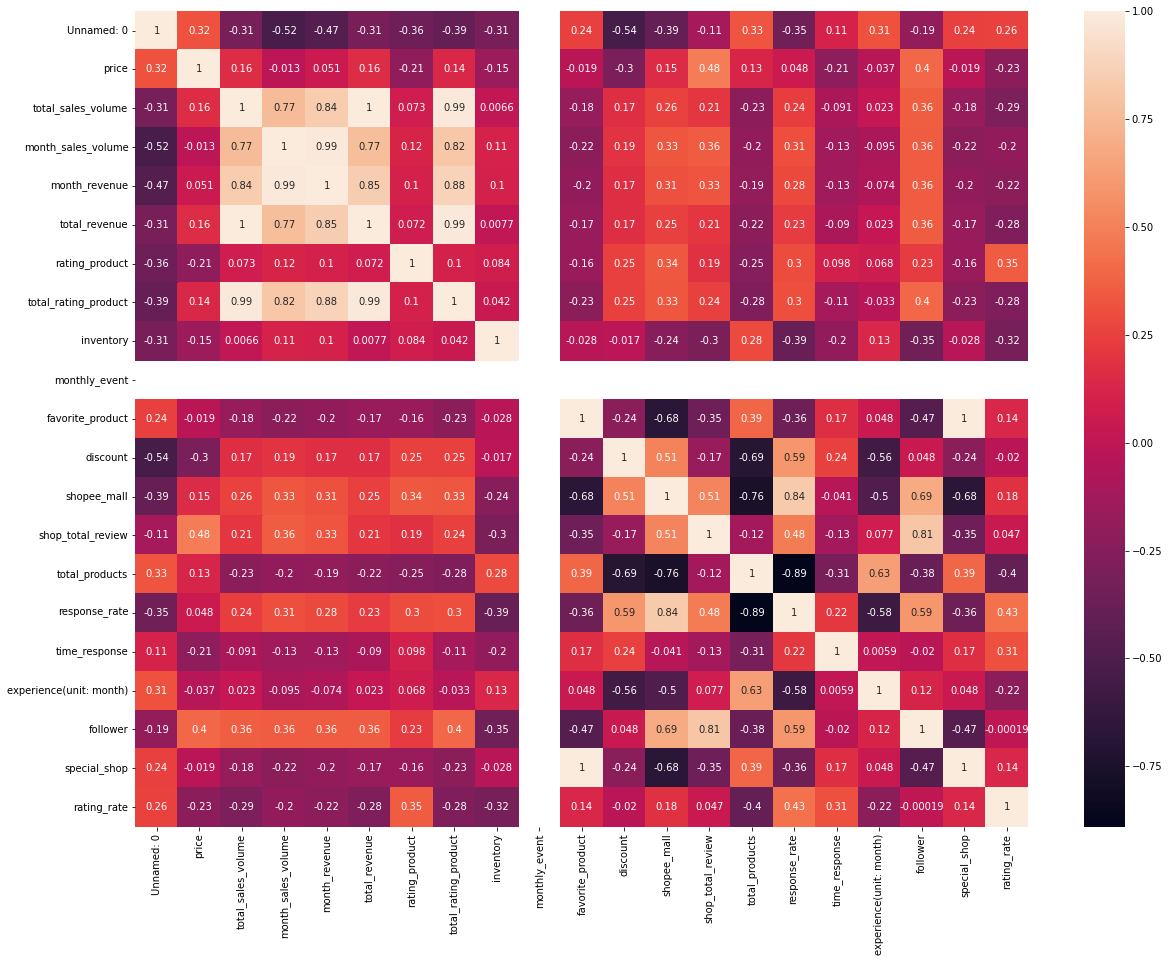

In [209]:
correlation(high_end)

100% participate monthly event

In [210]:
high_end.columns

Index(['Unnamed: 0', 'name', 'price', 'total_sales_volume',
       'month_sales_volume', 'month_revenue', 'total_revenue',
       'rating_product', 'total_rating_product', 'inventory', 'monthly_event',
       'favorite_product', 'discount', 'company', 'shop_name', 'shopee_mall',
       'shop_total_review', 'total_products', 'response_rate', 'time_response',
       'experience(unit: month)', 'follower', 'store_location', 'special_shop',
       'product_url', 'rating_rate', 'segmentation'],
      dtype='object')

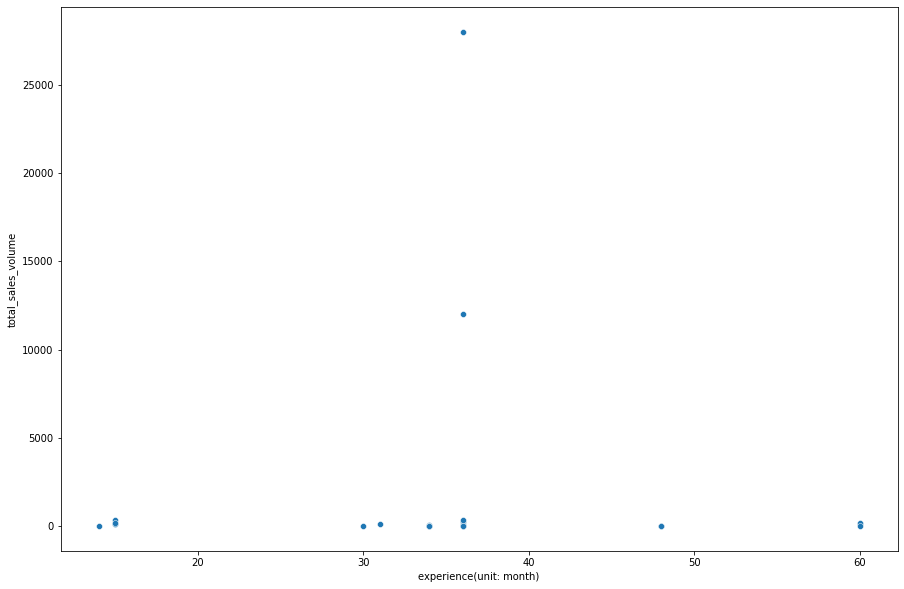

In [211]:
plot_experience(high_end)

Actualy, shops are in this segment more than 12 months

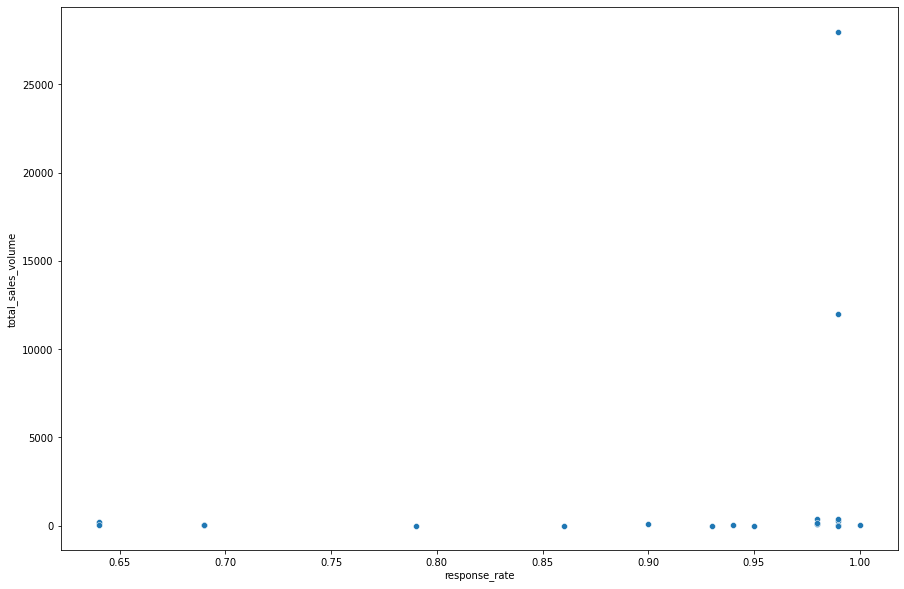

In [212]:
plot_response_rate(high_end)

- At least, response rate more than 50%.
- Keep more than 80% to safe

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Yes: 13
No: 10
Rate yes/no: 1.3
Rate total sales volume: 74.22719141323792


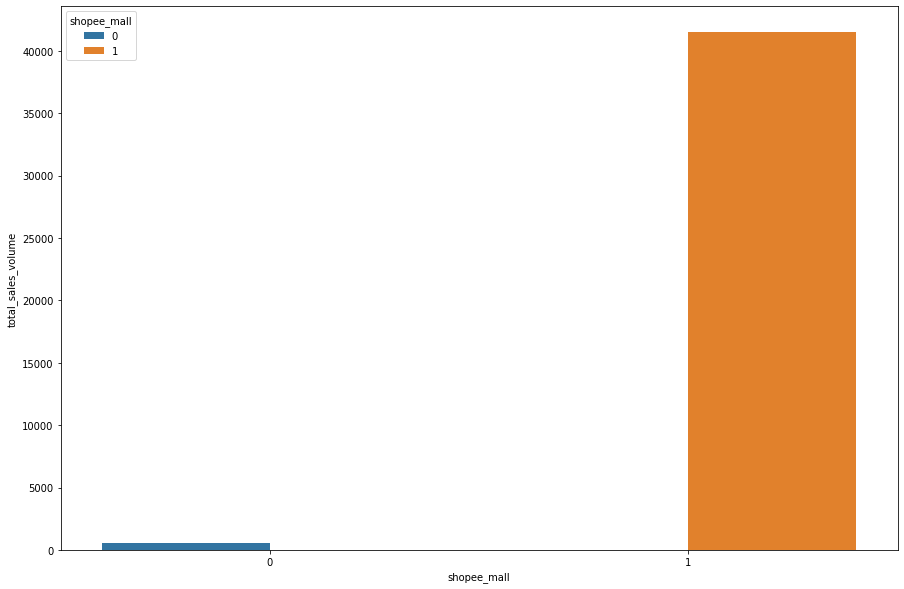

In [213]:
plot_shopee_mall(high_end)

- Shopee mall and normal 50/50
- Digiphone, bichngoc don't shopee mall

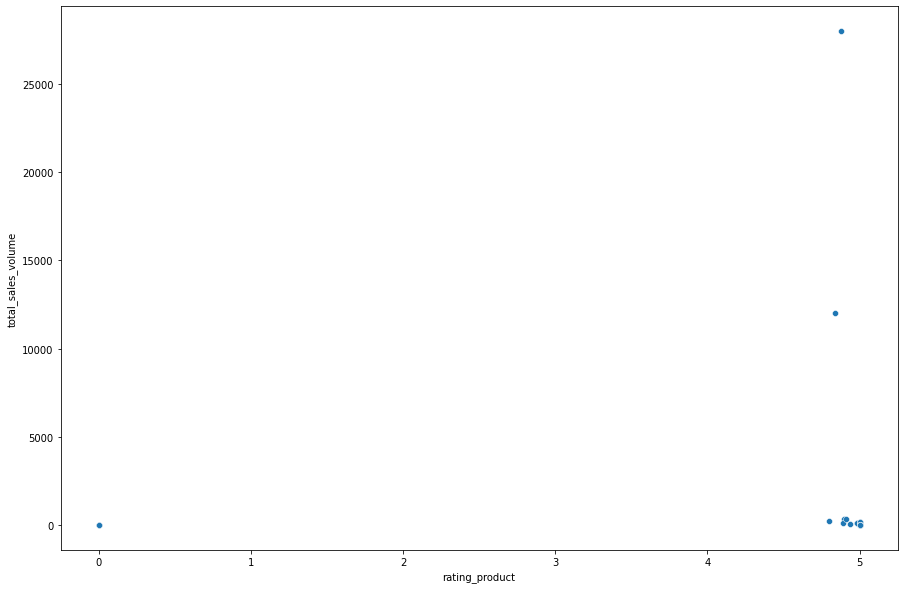

In [214]:
plot_rating_product(high_end)

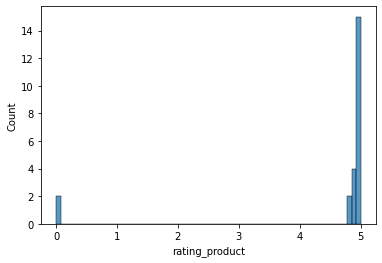

In [215]:
sns.histplot(high_end['rating_product'])

rating so high, becareful if you want to join

### Month

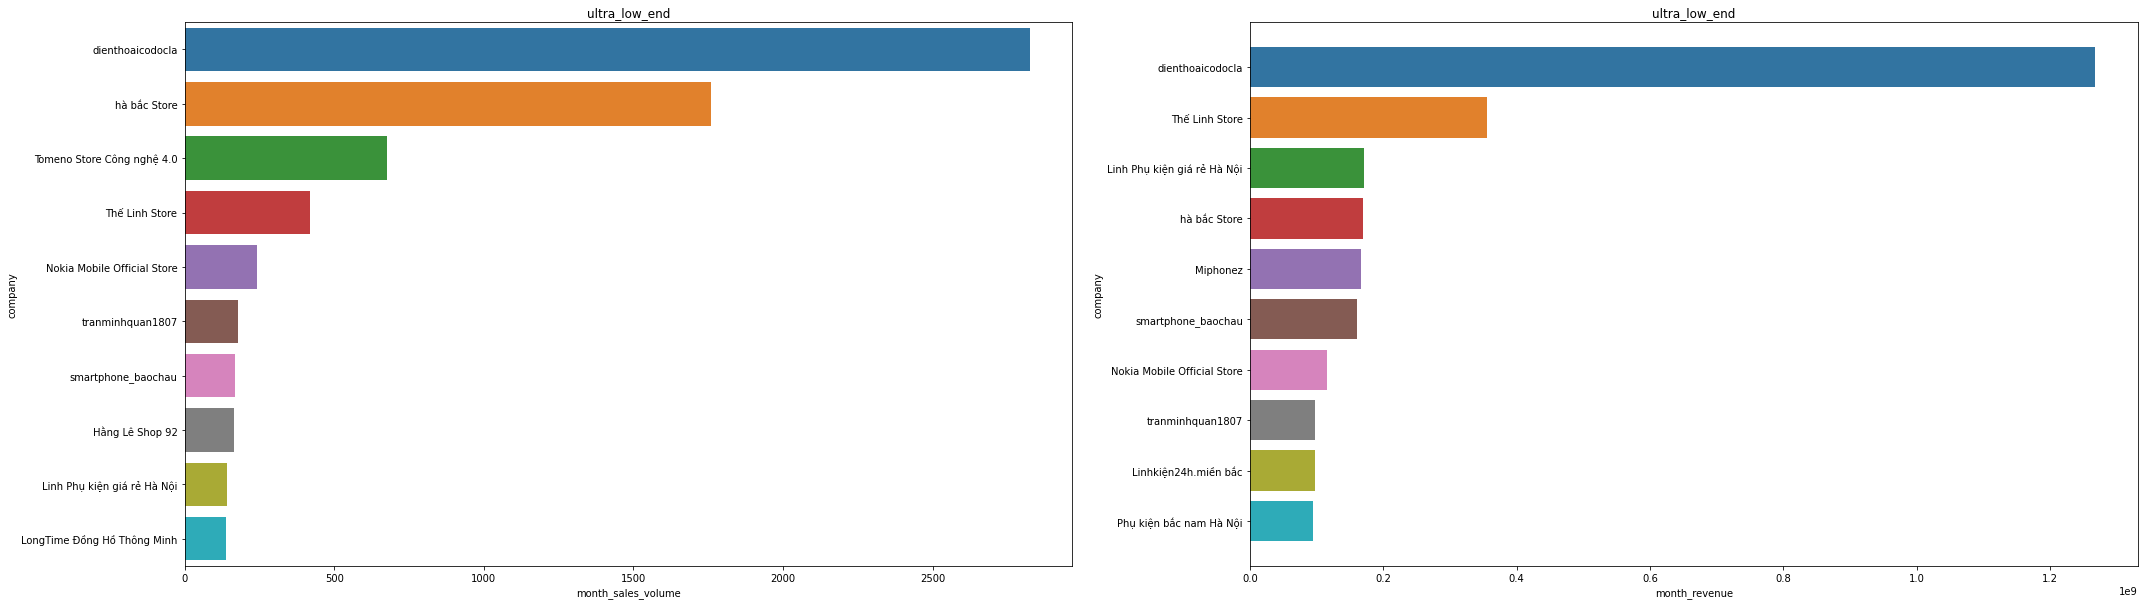

In [216]:
top_10_month(ultra_low_end)

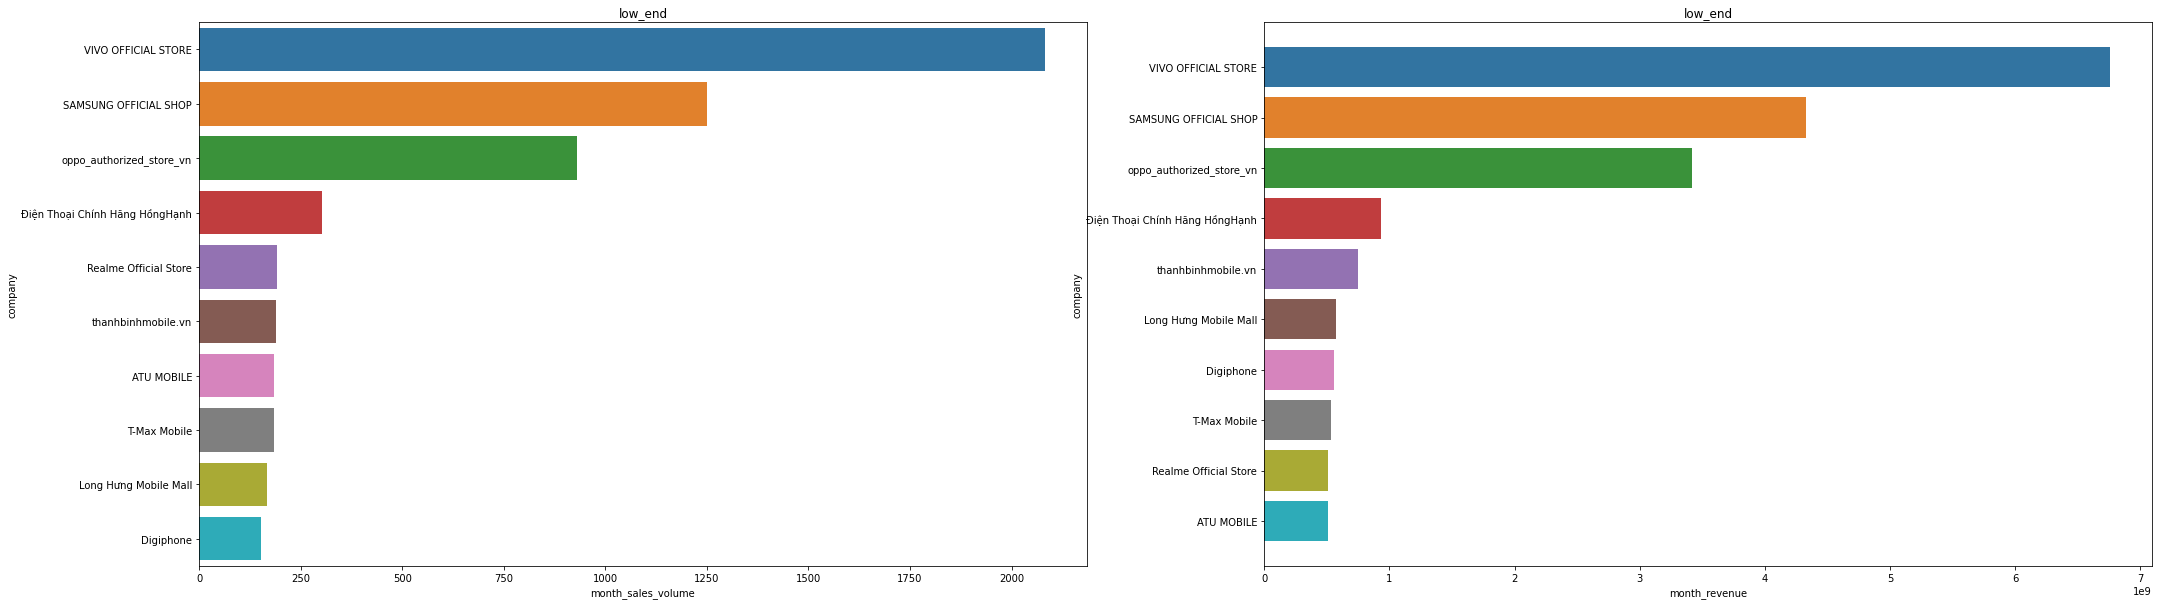

In [217]:
top_10_month(low_end)

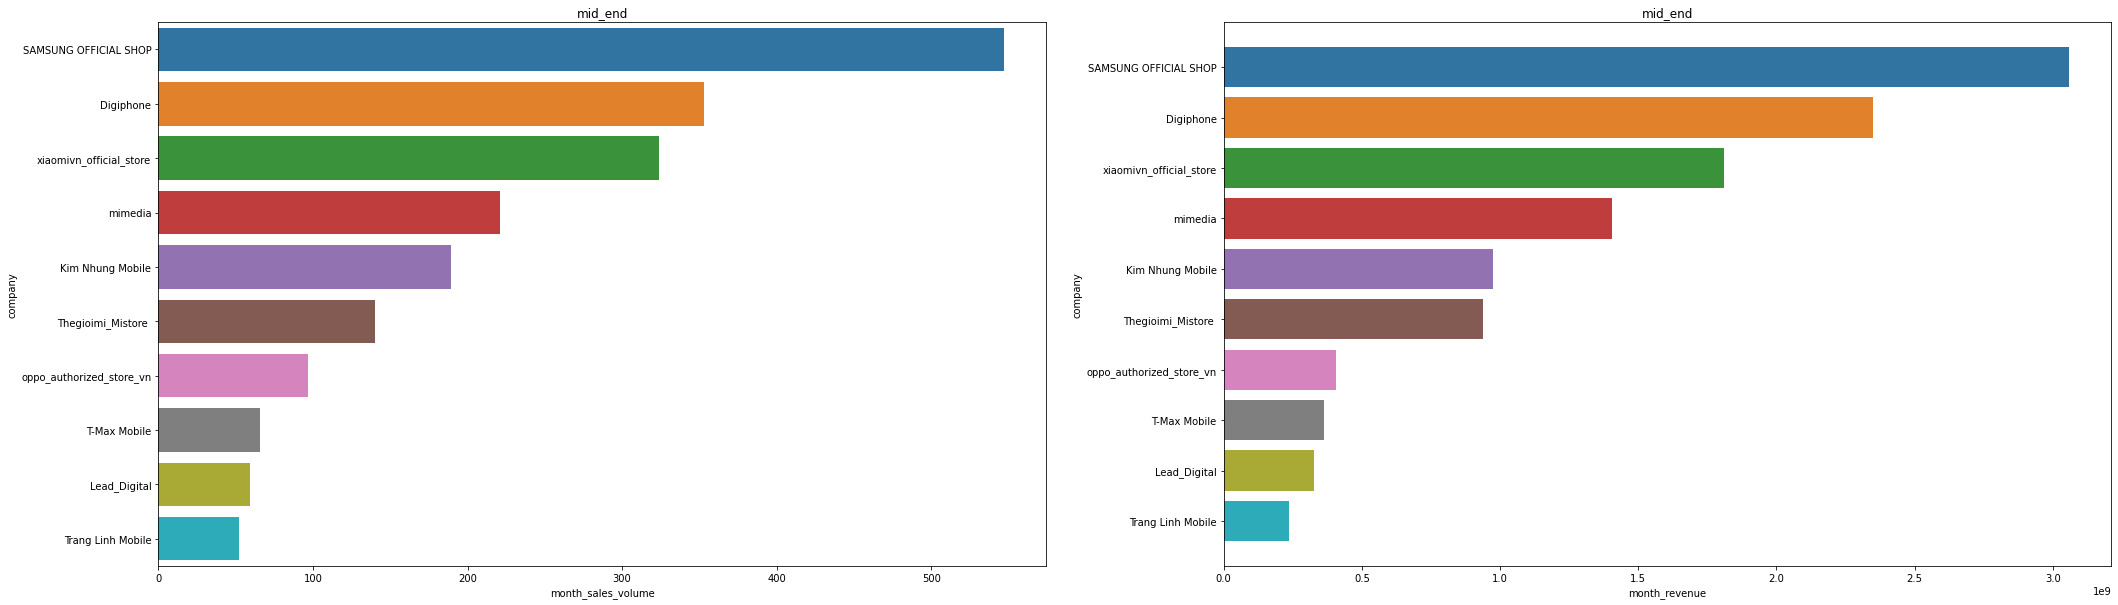

In [218]:
top_10_month(mid_end)

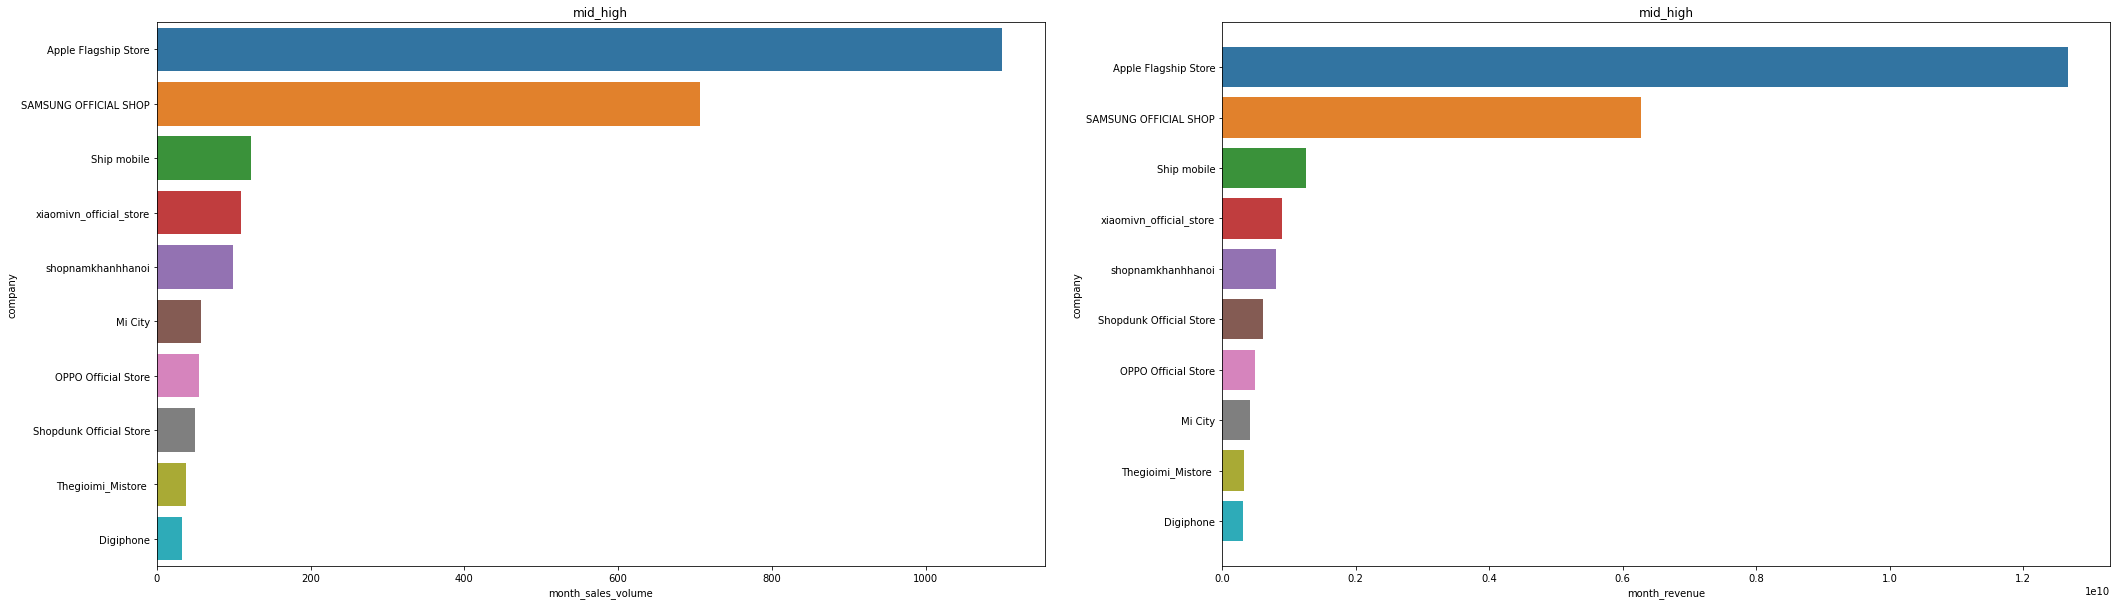

In [219]:
top_10_month(mid_high)

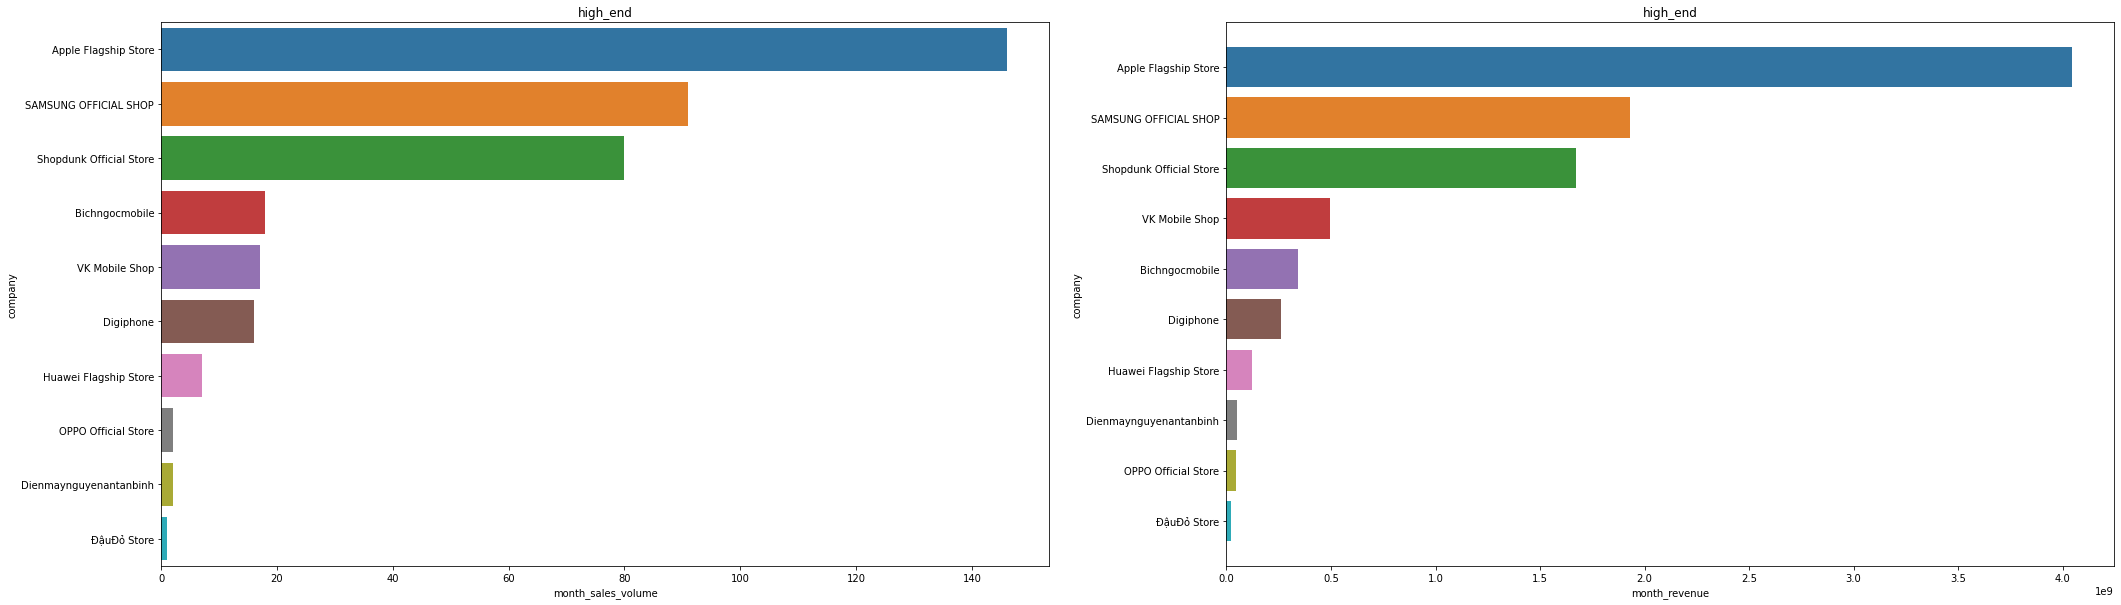

In [220]:
top_10_month(high_end)

In [221]:
df[df['company'] == 'smartphone_baochau']['month_sales_volume'].sum()

205.0

In [222]:
df['month_sales_volume'].sum()

23042.0

In [223]:
def pie_name(series):
  if series == 'apple_flagship_store':
    return series
  else:
    return 'others'


In [224]:
pie_mid_high = mid_high.groupby('shop_name')['total_revenue'].sum().reset_index()

In [225]:
pie_mid_high['shop_name'] = pie_mid_high['shop_name'].apply(pie_name)

In [226]:
pie_mid_high = pie_mid_high.groupby('shop_name').sum().reset_index()
pie_mid_high

,shop_name,total_revenue
0,apple_flagship_store,402976000000.00
1,others,41885713554.00


In [227]:
pie_high = high_end.groupby('shop_name')['total_revenue'].sum().reset_index()
pie_high['shop_name'] = pie_high['shop_name'].apply(pie_name)
pie_high = pie_high.groupby('shop_name').sum().reset_index()
pie_high

,shop_name,total_revenue
0,apple_flagship_store,1103247761100.00
1,others,35471333700.00


In [228]:
pie_mid_high.to_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/pie_mid_high.csv')
pie_high.to_csv('/content/drive/MyDrive/Colab Notebooks/Final_project/pie_high.csv')

In [229]:
mid_high[mid_high['shop_name'] != 'apple_flagship_store']

,Unnamed: 0,name,price,total_sales_volume,month_sales_volume,month_revenue,total_revenue,rating_product,total_rating_product,inventory,monthly_event,favorite_product,discount,company,shop_name,shopee_mall,shop_total_review,total_products,response_rate,time_response,experience(unit: month),follower,store_location,special_shop,product_url,rating_rate,segmentation
9,10,điện thoại samsung galaxy a32 (128gb/8gb) - hà...,7990000.00,781.00,490.00,3915100000.00,6240190000.00,4.87,332.00,30.00,1,0,0.00,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.43,Mid_to_High_end
22,28,điện thoại samsung galaxy s20 fe (8gb/256gb) -...,11290000.00,227.00,147.00,1659630000.00,2562830000.00,4.90,115.00,0.00,1,0,0.00,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.51,Mid_to_High_end
33,41,"điện thoại xiaomi redmi k40 gaming, enhanced e...",8202360.00,141.00,99.00,812033640.00,1156532760.00,4.96,86.00,96.00,1,1,0.13,shopnamkhanhhanoi,shopnamkhanhhanoi,0,69000.00,584.00,0.65,0,48.00,11300.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.61,Mid_to_High_end
37,45,điện thoại poco f3 (6gb+128gb),7948800.00,328.00,84.00,667699200.00,2607206400.00,4.89,177.00,393.00,1,0,0.08,xiaomivn_official_store,xiaomivn_official_store,1,198000.00,125.00,0.95,0,24.00,125600.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.54,Mid_to_High_end
44,54,điện thoại samsung galaxy a72 (8gb/128gb) - hà...,9996300.00,126.00,70.00,699741000.00,1259533800.00,4.93,56.00,23.00,1,0,0.13,SAMSUNG OFFICIAL SHOP,samsung_official_store,1,397000.00,367.00,0.99,0,36.00,342200.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.44,Mid_to_High_end
50,62,điện thoại xiaomi redmi k40 gaming edition ram...,7422600.00,133.00,56.00,415665600.00,987205800.00,4.78,67.00,134.00,1,1,0.11,Mi City,mi_city,0,2000.00,341.00,0.90,0,20.00,1600.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.50,Mid_to_High_end
75,89,điện thoại oppo reno6 z 5g (8gb/128gb) - hàng ...,8202600.00,99.00,43.00,352711800.00,812057400.00,4.95,39.00,119.00,1,0,0.07,OPPO Official Store,oppo_official_store_vn,1,56000.00,80.00,0.94,0,48.00,399400.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-Tho%E1%BA%...,0.39,Mid_to_High_end
84,98,apple iphone 12 64gb,12857300.00,411.00,38.00,488577400.00,5284350300.00,4.95,170.00,2.00,1,0,0.33,Shopdunk Official Store,shopdunk_official_store,1,15000.00,105.00,0.98,0,15.00,50000.00,TP. Hồ Chí Minh,0,https://shopee.vn/Apple-iPhone-12-64GB-i.28828...,0.41,Mid_to_High_end
123,145,điện thoại poco f3 (8gb+256gb),8965200.00,333.00,25.00,224130000.00,2985411600.00,4.92,166.00,234.00,1,0,0.07,xiaomivn_official_store,xiaomivn_official_store,1,198000.00,125.00,0.95,0,24.00,125600.00,TP. Hồ Chí Minh,0,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.50,Mid_to_High_end
129,153,điện thoại xiaomi mi 11 pro ram 8gb - hàng nhậ...,10601200.00,216.00,24.00,254428800.00,2289859200.00,4.89,113.00,72.00,1,1,0.32,Digiphone,digiphone_hn,0,35000.00,248.00,0.90,0,31.00,4500.00,Hà Nội,1,https://shopee.vn/%C4%90i%E1%BB%87n-tho%E1%BA%...,0.52,Mid_to_High_end


In [230]:
df.columns

Index(['Unnamed: 0', 'name', 'price', 'total_sales_volume',
       'month_sales_volume', 'month_revenue', 'total_revenue',
       'rating_product', 'total_rating_product', 'inventory', 'monthly_event',
       'favorite_product', 'discount', 'company', 'shop_name', 'shopee_mall',
       'shop_total_review', 'total_products', 'response_rate', 'time_response',
       'experience(unit: month)', 'follower', 'store_location', 'special_shop',
       'product_url', 'rating_rate', 'segmentation'],
      dtype='object')

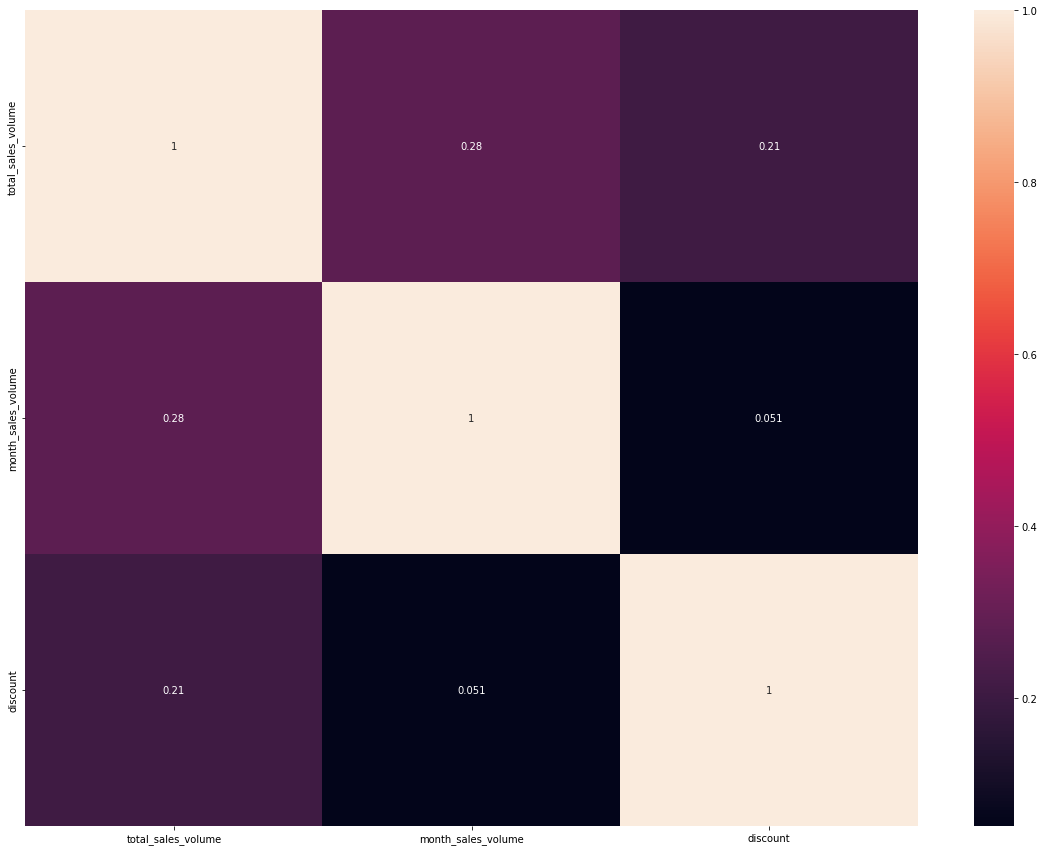

In [231]:
correlation(df[['total_sales_volume', 'month_sales_volume', 'discount']])

In [232]:
df['segmentation'].unique()

array(['Low_end', 'Mid_to_High_end', 'Ultra_Low_end', 'Mid_end',
       'High_end'], dtype=object)

In [233]:
def replace(series):
    if series == 0:
        return 'No'
    elif series == 1:
        return 'Yes'

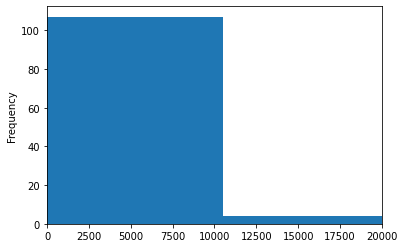

In [234]:

df[df['shopee_mall'] == 1]['total_sales_volume'].plot(kind='hist')
plt.xlim(0,20000)
plt.show()

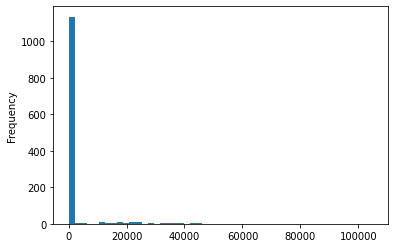

In [235]:
df[df['shopee_mall'] == 0]['total_sales_volume'].plot(kind='hist', bins=50)

In [236]:
len(df[df['total_sales_volume']<df['total_sales_volume'].median()])

660

In [237]:
len(df[df['total_sales_volume']>df['total_sales_volume'].median()])

664

In [238]:
df.groupby(['shopee_mall'])['name','total_sales_volume'].agg({'name': 'count',
                                                                 'total_sales_volume': 'median'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,name,total_sales_volume
shopee_mall,,
0,1224,21.00
1,118,90.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


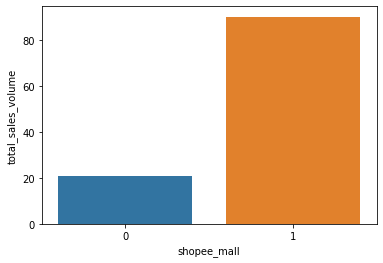

In [239]:
sns.barplot(data = df.groupby(['shopee_mall'])['name','total_sales_volume'].agg({'name': 'count',
                                                                 'total_sales_volume': 'median'}).reset_index(),
            x='shopee_mall',
            y = 'total_sales_volume')

In [240]:
len(low_end)

247

In [241]:
df[['total_sales_volume', 'total_rating_product']]

,total_sales_volume,total_rating_product
0,49000.00,978.00
1,35000.00,1184.00
2,767.00,6.00
3,26000.00,763.00
4,5000.00,700.00
...,...,...
1337,106.00,2.00
1338,59.00,1.00
1339,21.00,0.00
1340,9.00,3.00


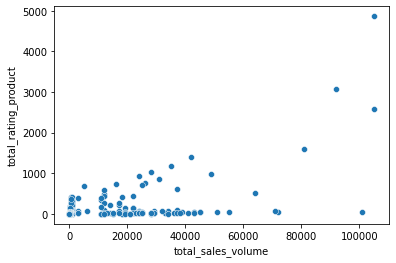

In [242]:
sns.scatterplot(data = df[['total_sales_volume', 'total_rating_product']],
                x = 'total_sales_volume', y='total_rating_product')

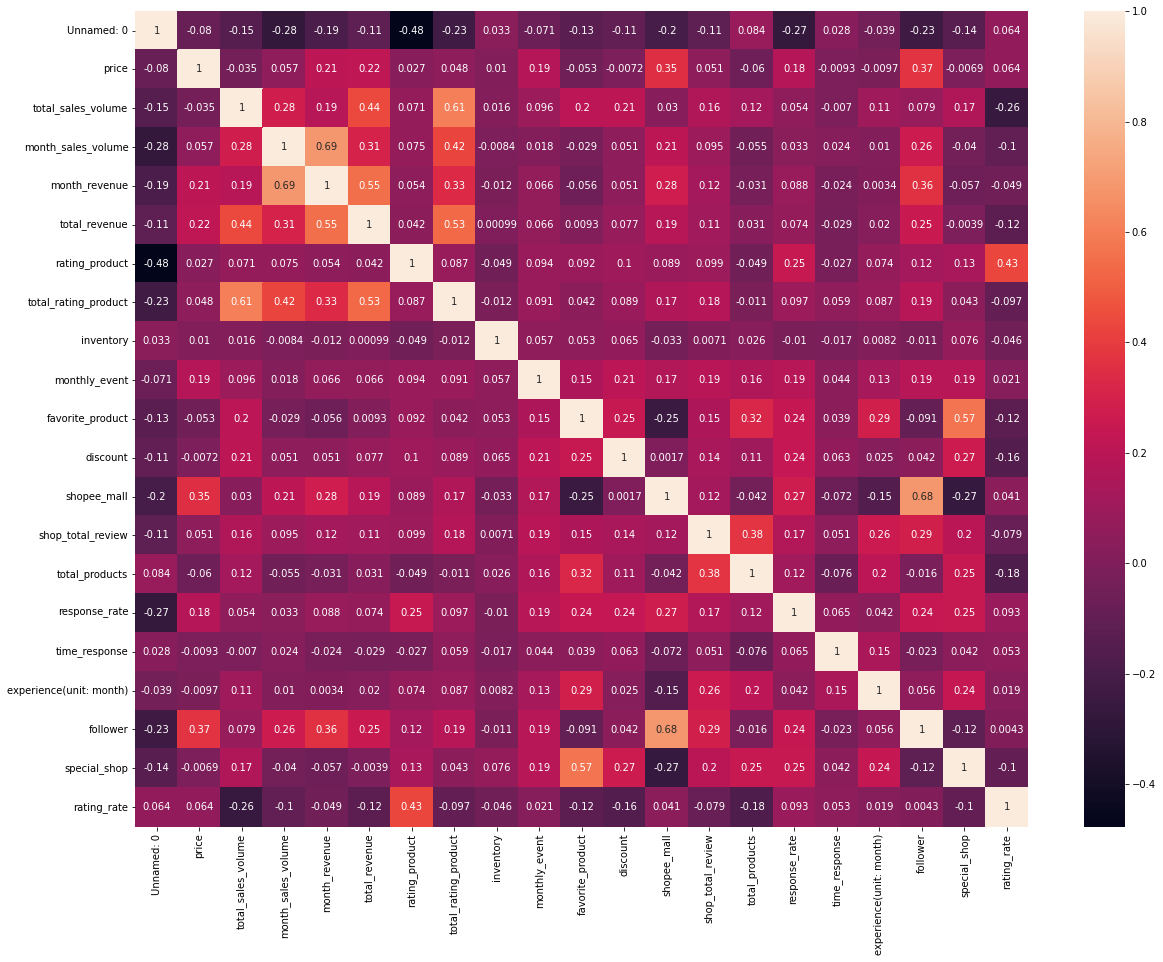

In [243]:
correlation(df)